___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

## ___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways. Also, you will calibrate your model outputs.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

After the ML Deployment Course, you will able to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The data comes from Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features. The dataset is **unbalanced**, the positive class (frauds) account for small amount of all transactions.

**Feature Information:**

1. Transaction Table
  * TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
  * TransactionAMT: transaction payment amount in USD
  * ProductCD: product code, the product for each transaction
  * card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
  * addr: address
  * dist: distance
  * P_ and (R__) emaildomain: purchaser and recipient email domain
  * C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
  * D1-D15: timedelta, such as days between previous transaction, etc.
  * M1-M9: match, such as names on card and address, etc.
  * Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

    Categorical Features:
      * ProductCD
      * card1 - card6
      * addr1, addr2
      * P_emaildomain
      * R_emaildomain
      * M1 - M9

2. Identity Table

  - Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions. They're collected by Vesta’s fraud protection system and digital security partners. (The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

    Categorical Features:
      * DeviceType
      * DeviceInfo
      * id_12 - id_38

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with.

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase.

In the final step, you will prapare your model for deployment.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Neural Network

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [20]:
## Import Libraies
## import all main libraries automatically with pyforest
# !pip install pyforest
# !pip install pycaret[full]
# import pyforest
## main libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
from datetime import datetime
# from pyclustertend import hopkins
## pre-processing
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.dummy import DummyClassifier
## feature Selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
## scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
## regression/prediction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
## ann
from sklearn.neural_network import MLPRegressor
## classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
## metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import auc
## model selection
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
## MLearning
from sklearn.pipeline import make_pipeline, Pipeline
import optuna
from sklearn.naive_bayes import GaussianNB
## clevers
# !pip install -U pandas-profiling --user
#import pandas_profiling
#from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets
import ipywidgets
from ipywidgets import interact
#import missingno as msno
# !pip install wordcloud
#from wordcloud import WordCloud
# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint
# grey red green yellow blue magenta cyan white (on_grey ..)
# bold dark underline blink reverse concealed
# cprint("Have a first look to:","blue","on_grey", attrs=['bold'])
## plotly and cufflinks
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
## Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [21]:
transaction_df = pd.read_csv('transaction.csv')
transaction_df.head() 

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400          68.500         W  13926   
1        2987001        0          86401          29.000         W   2755   
2        2987002        0          86469          59.000         W   4663   
3        2987003        0          86499          50.000         W  18132   
4        2987004        0          86506          50.000         H   4497   

    card2   card3       card4   card5   card6   addr1  addr2   dist1  dist2  \
0     NaN 150.000    discover 142.000  credit 315.000 87.000  19.000    NaN   
1 404.000 150.000  mastercard 102.000  credit 325.000 87.000     NaN    NaN   
2 490.000 150.000        visa 166.000   debit 330.000 87.000 287.000    NaN   
3 567.000 150.000  mastercard 117.000   debit 476.000 87.000     NaN    NaN   
4 514.000 150.000  mastercard 102.000  credit 420.000 87.000     NaN    NaN   

  P_emaildomain R_emaildomain    C1    C2    C3    C4    C5    C6    C7    C8  \
0           NaN           NaN 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000   
1     gmail.com           NaN 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000   
2   outlook.com           NaN 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000   
3     yahoo.com           NaN 2.000 5.000 0.000 0.000 0.000 4.000 0.000 0.000   
4     gmail.com           NaN 1.000 1.000 0.000 0.000 0.000 1.000 0.000 1.000   

     C9   C10   C11   C12    C13   C14      D1      D2     D3     D4    D5  \
0 1.000 0.000 2.000 0.000  1.000 1.000  14.000     NaN 13.000    NaN   NaN   
1 0.000 0.000 1.000 0.000  1.000 1.000   0.000     NaN    NaN  0.000   NaN   
2 1.000 0.000 1.000 0.000  1.000 1.000   0.000     NaN    NaN  0.000   NaN   
3 1.000 0.000 1.000 0.000 25.000 1.000 112.000 112.000  0.000 94.000 0.000   
4 0.000 1.000 1.000 0.000  1.000 1.000   0.000     NaN    NaN    NaN   NaN   

   D6  D7  D8  D9    D10     D11  D12  D13  D14     D15   M1   M2   M3   M4  \
0 NaN NaN NaN NaN 13.000  13.000  NaN  NaN  NaN   0.000    T    T    T   M2   
1 NaN NaN NaN NaN  0.000     NaN  NaN  NaN  NaN   0.000  NaN  NaN  NaN   M0   
2 NaN NaN NaN NaN  0.000 315.000  NaN  NaN  NaN 315.000    T    T    T   M0   
3 NaN NaN NaN NaN 84.000     NaN  NaN  NaN  NaN 111.000  NaN  NaN  NaN   M0   
4 NaN NaN NaN NaN    NaN     NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN   

    M5   M6   M7   M8   M9    V1    V2    V3    V4    V5    V6    V7    V8  \
0    F    T  NaN  NaN  NaN 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
1    T    T  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2    F    F    F    F    F 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3    T    F  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     V9   V10   V11   V12   V13   V14   V15   V16   V17   V18   V19   V20  \
0 1.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 1.000 1.000   
1   NaN   NaN   NaN 0.000 0.000 1.000 0.000 0.000 0.000 0.000 1.000 1.000   
2 1.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 1.000 1.000   
3   NaN   NaN   NaN 1.000 1.000 1.000 0.000 0.000 0.000 0.000 1.000 1.000   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

    V21   V22   V23   V24   V25   V26   V27   V28   V29   V30   V31   V32  \
0 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000   
1 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000   
2 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000   
3 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

    V33   V34   V35   V36   V37   V38   V39   V40   V41   V42   V43   V44  \
0 0.000 0.000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1 0.000 0.000 0.000 0.000 1.000 1.000 0.000 0.000 1.000 0.000 0.000 1.000   
2 0.000 

In [22]:
identity_df = pd.read_csv('identity.csv')
identity_df.head() 

TransactionID  id_01      id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004  0.000  70787.000    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008 -5.000  98945.000    NaN    NaN  0.000 -5.000    NaN    NaN   
2        2987010 -5.000 191631.000  0.000  0.000  0.000  0.000    NaN    NaN   
3        2987011 -5.000 221832.000    NaN    NaN  0.000 -6.000    NaN    NaN   
4        2987016  0.000   7460.000  0.000  0.000  1.000  0.000    NaN    NaN   

   id_09  id_10   id_11     id_12  id_13    id_14  id_15     id_16   id_17  \
0    NaN    NaN 100.000  NotFound    NaN -480.000    New  NotFound 166.000   
1    NaN    NaN 100.000  NotFound 49.000 -300.000    New  NotFound 166.000   
2  0.000  0.000 100.000  NotFound 52.000      NaN  Found     Found 121.000   
3    NaN    NaN 100.000  NotFound 52.000      NaN    New  NotFound 225.000   
4  0.000  0.000 100.000  NotFound    NaN -300.000  Found     Found 166.000   

   id_18   id_19   id_20  id_21  id_22 id_23  id_24  id_25  id_26 id_27  \
0    NaN 542.000 144.000    NaN    NaN   NaN    NaN    NaN    NaN   NaN   
1    NaN 621.000 500.000    NaN    NaN   NaN    NaN    NaN    NaN   NaN   
2    NaN 410.000 142.000    NaN    NaN   NaN    NaN    NaN    NaN   NaN   
3    NaN 176.000 507.000    NaN    NaN   NaN    NaN    NaN    NaN   NaN   
4 15.000 529.000 575.000    NaN    NaN   NaN    NaN    NaN    NaN   NaN   

   id_28     id_29             id_30                id_31  id_32      id_33  \
0    New  NotFound       Android 7.0  samsung browser 6.2 32.000  2220x1080   
1    New  NotFound        iOS 11.1.2   mobile safari 11.0 32.000   1334x750   
2  Found     Found               NaN          chrome 62.0    NaN        NaN   
3    New  NotFound               NaN          chrome 62.0    NaN        NaN   
4  Found     Found  Mac OS X 10_11_6          chrome 62.0 24.000   1280x800   

            id_34 id_35 id_36 id_37 id_38 DeviceType  \
0  match_status:2     T     F     T     T     mobile   
1  match_status:1     T     F     F     T     mobile   
2             NaN     F     F     T     T    desktop   
3             NaN     F     F     T     T    desktop   
4  match_status:2     T     F     T     T    desktop   

                      DeviceInfo  
0  SAMSUNG SM-G892A Build/NRD90M  
1                     iOS Device  
2                        Windows  
3                            NaN  
4                          MacOS

In [23]:
transaction_df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [24]:
identity_df.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [25]:
# Merge the two dataframes on the 'transactionid' column
# You can choose 'inner' or 'left' depending on your needs:
# 'inner' will only keep rows where 'transactionid' appears in both datasets
# 'left' will keep all rows from 'transaction_df' and fill missing values from 'identity_df'
merged_df = pd.merge(transaction_df, identity_df, on='TransactionID', how='left')

# Show the first few rows of the merged dataframe
print(merged_df.head())

# Optionally, save the merged dataframe to a new CSV file
merged_df.to_csv('merged_transactions.csv', index=False)

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400          68.500         W  13926   
1        2987001        0          86401          29.000         W   2755   
2        2987002        0          86469          59.000         W   4663   
3        2987003        0          86499          50.000         W  18132   
4        2987004        0          86506          50.000         H   4497   

    card2   card3       card4   card5   card6   addr1  addr2   dist1  dist2  \
0     NaN 150.000    discover 142.000  credit 315.000 87.000  19.000    NaN   
1 404.000 150.000  mastercard 102.000  credit 325.000 87.000     NaN    NaN   
2 490.000 150.000        visa 166.000   debit 330.000 87.000 287.000    NaN   
3 567.000 150.000  mastercard 117.000   debit 476.000 87.000     NaN    NaN   
4 514.000 150.000  mastercard 102.000  credit 420.000 87.000     NaN    NaN   

  P_emaildomain R_emaildomain    C1    C2    C3    C4    C5   

---
The choice between **left** and **inner** joins depends on how you want to handle missing data and what you want to achieve with the merged dataset.

### 1. **`left` join**:
- **Use this if**: You want to keep all transactions from the `transaction.csv` file, even if there is no corresponding data in the `identity.csv` file.
- In this case, transactions that don’t have matching identity information will still be present in the merged dataset, with missing (NaN) values for the identity-related columns.

**Use case**: If you want to ensure that you retain every transaction in your analysis, even if some transactions are missing identity information.

### 2. **`inner` join**:
- **Use this if**: You only want transactions that have matching identity information in the `identity.csv` file.
- With an inner join, rows that don't have a corresponding `transactionid` in both datasets will be excluded from the final merged dataset.

**Use case**: If the identity information is critical for your analysis, and you only want to work with transactions that have corresponding identity data.

### Recommendation:

- If **identity information is optional** for your analysis and you want to keep all transactions, go for a **`left` join**.
- If you only want transactions that have **both transaction and identity information**, use an **`inner` join**.

### Practical Example:

- If fraud detection is your goal and you want to analyze all available transactions, including those without identity data, then a **left join** would be more appropriate.
- If your analysis relies on having identity data for every transaction (e.g., user behavior analysis based on device info), an **inner join** is better suited.
---



In [26]:
merged_df = pd.read_csv('merged_transactions.csv')
df = merged_df.copy()
df.head() 

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400          68.500         W  13926   
1        2987001        0          86401          29.000         W   2755   
2        2987002        0          86469          59.000         W   4663   
3        2987003        0          86499          50.000         W  18132   
4        2987004        0          86506          50.000         H   4497   

    card2   card3       card4   card5   card6   addr1  addr2   dist1  dist2  \
0     NaN 150.000    discover 142.000  credit 315.000 87.000  19.000    NaN   
1 404.000 150.000  mastercard 102.000  credit 325.000 87.000     NaN    NaN   
2 490.000 150.000        visa 166.000   debit 330.000 87.000 287.000    NaN   
3 567.000 150.000  mastercard 117.000   debit 476.000 87.000     NaN    NaN   
4 514.000 150.000  mastercard 102.000  credit 420.000 87.000     NaN    NaN   

  P_emaildomain R_emaildomain    C1    C2    C3    C4    C5    C6    C7    C8  \
0           NaN           NaN 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000   
1     gmail.com           NaN 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000   
2   outlook.com           NaN 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000   
3     yahoo.com           NaN 2.000 5.000 0.000 0.000 0.000 4.000 0.000 0.000   
4     gmail.com           NaN 1.000 1.000 0.000 0.000 0.000 1.000 0.000 1.000   

     C9   C10   C11   C12    C13   C14      D1      D2     D3     D4    D5  \
0 1.000 0.000 2.000 0.000  1.000 1.000  14.000     NaN 13.000    NaN   NaN   
1 0.000 0.000 1.000 0.000  1.000 1.000   0.000     NaN    NaN  0.000   NaN   
2 1.000 0.000 1.000 0.000  1.000 1.000   0.000     NaN    NaN  0.000   NaN   
3 1.000 0.000 1.000 0.000 25.000 1.000 112.000 112.000  0.000 94.000 0.000   
4 0.000 1.000 1.000 0.000  1.000 1.000   0.000     NaN    NaN    NaN   NaN   

   D6  D7  D8  D9    D10     D11  D12  D13  D14     D15   M1   M2   M3   M4  \
0 NaN NaN NaN NaN 13.000  13.000  NaN  NaN  NaN   0.000    T    T    T   M2   
1 NaN NaN NaN NaN  0.000     NaN  NaN  NaN  NaN   0.000  NaN  NaN  NaN   M0   
2 NaN NaN NaN NaN  0.000 315.000  NaN  NaN  NaN 315.000    T    T    T   M0   
3 NaN NaN NaN NaN 84.000     NaN  NaN  NaN  NaN 111.000  NaN  NaN  NaN   M0   
4 NaN NaN NaN NaN    NaN     NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN   

    M5   M6   M7   M8   M9    V1    V2    V3    V4    V5    V6    V7    V8  \
0    F    T  NaN  NaN  NaN 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
1    T    T  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2    F    F    F    F    F 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   
3    T    F  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     V9   V10   V11   V12   V13   V14   V15   V16   V17   V18   V19   V20  \
0 1.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 1.000 1.000   
1   NaN   NaN   NaN 0.000 0.000 1.000 0.000 0.000 0.000 0.000 1.000 1.000   
2 1.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 1.000 1.000   
3   NaN   NaN   NaN 1.000 1.000 1.000 0.000 0.000 0.000 0.000 1.000 1.000   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

    V21   V22   V23   V24   V25   V26   V27   V28   V29   V30   V31   V32  \
0 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000   
1 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000   
2 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000   
3 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

    V33   V34   V35   V36   V37   V38   V39   V40   V41   V42   V43   V44  \
0 0.000 0.000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1 0.000 0.000 0.000 0.000 1.000 1.000 0.000 0.000 1.000 0.000 0.000 1.000   
2 0.000 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [28]:
# Get descriptive statistics and transpose
desc_stats = df.describe().T

# Show the first 10 rows (i.e., statistics for the first 10 columns)
desc_stats.head(10)

count        mean         std         min         25%  \
TransactionID  590540.000 3282269.500  170474.358 2987000.000 3134634.750   
isFraud        590540.000       0.035       0.184       0.000       0.000   
TransactionDT  590540.000 7372311.310 4617223.647   86400.000 3027057.750   
TransactionAmt 590540.000     135.027     239.163       0.251      43.321   
card1          590540.000    9898.735    4901.170    1000.000    6019.000   
card2          581607.000     362.555     157.793     100.000     214.000   
card3          588975.000     153.195      11.336     100.000     150.000   
card5          586281.000     199.279      41.244     100.000     166.000   
addr1          524834.000     290.734     101.741     100.000     204.000   
addr2          524834.000      86.801       2.691      10.000      87.000   

                       50%          75%          max  
TransactionID  3282269.500  3429904.250  3577539.000  
isFraud              0.000        0.000        1.000  
TransactionDT  7306527.500 11246620.000 15811131.000  
TransactionAmt      68.769      125.000    31937.391  
card1             9678.000    14184.000    18396.000  
card2              361.000      512.000      600.000  
card3              150.000      150.000      231.000  
card5              226.000      226.000      237.000  
addr1              299.000      330.000      540.000  
addr2               87.000       87.000      102.000

In [29]:
from skimpy import clean_columns

df = clean_columns(df)
df.head()

transaction_id  is_fraud  transaction_dt  transaction_amt product_cd  \
0         2987000         0           86400           68.500          W   
1         2987001         0           86401           29.000          W   
2         2987002         0           86469           59.000          W   
3         2987003         0           86499           50.000          W   
4         2987004         0           86506           50.000          H   

   card_1  card_2  card_3      card_4  card_5  card_6  addr_1  addr_2  dist_1  \
0   13926     NaN 150.000    discover 142.000  credit 315.000  87.000  19.000   
1    2755 404.000 150.000  mastercard 102.000  credit 325.000  87.000     NaN   
2    4663 490.000 150.000        visa 166.000   debit 330.000  87.000 287.000   
3   18132 567.000 150.000  mastercard 117.000   debit 476.000  87.000     NaN   
4    4497 514.000 150.000  mastercard 102.000  credit 420.000  87.000     NaN   

   dist_2 p_emaildomain r_emaildomain   c_1   c_2   c_3   c_4   c_5   c_6  \
0     NaN           NaN           NaN 1.000 1.000 0.000 0.000 0.000 1.000   
1     NaN     gmail.com           NaN 1.000 1.000 0.000 0.000 0.000 1.000   
2     NaN   outlook.com           NaN 1.000 1.000 0.000 0.000 0.000 1.000   
3     NaN     yahoo.com           NaN 2.000 5.000 0.000 0.000 0.000 4.000   
4     NaN     gmail.com           NaN 1.000 1.000 0.000 0.000 0.000 1.000   

    c_7   c_8   c_9  c_10  c_11  c_12   c_13  c_14     d_1     d_2    d_3  \
0 0.000 0.000 1.000 0.000 2.000 0.000  1.000 1.000  14.000     NaN 13.000   
1 0.000 0.000 0.000 0.000 1.000 0.000  1.000 1.000   0.000     NaN    NaN   
2 0.000 0.000 1.000 0.000 1.000 0.000  1.000 1.000   0.000     NaN    NaN   
3 0.000 0.000 1.000 0.000 1.000 0.000 25.000 1.000 112.000 112.000  0.000   
4 0.000 1.000 0.000 1.000 1.000 0.000  1.000 1.000   0.000     NaN    NaN   

     d_4   d_5  d_6  d_7  d_8  d_9   d_10    d_11  d_12  d_13  d_14    d_15  \
0    NaN   NaN  NaN  NaN  NaN  NaN 13.000  13.000   NaN   NaN   NaN   0.000   
1  0.000   NaN  NaN  NaN  NaN  NaN  0.000     NaN   NaN   NaN   NaN   0.000   
2  0.000   NaN  NaN  NaN  NaN  NaN  0.000 315.000   NaN   NaN   NaN 315.000   
3 94.000 0.000  NaN  NaN  NaN  NaN 84.000     NaN   NaN   NaN   NaN 111.000   
4    NaN   NaN  NaN  NaN  NaN  NaN    NaN     NaN   NaN   NaN   NaN     NaN   

   m_1  m_2  m_3  m_4  m_5  m_6  m_7  m_8  m_9   v_1   v_2   v_3   v_4   v_5  \
0    T    T    T   M2    F    T  NaN  NaN  NaN 1.000 1.000 1.000 1.000 1.000   
1  NaN  NaN  NaN   M0    T    T  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
2    T    T    T   M0    F    F    F    F    F 1.000 1.000 1.000 1.000 1.000   
3  NaN  NaN  NaN   M0    T    F  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   

    v_6   v_7   v_8   v_9  v_10  v_11  v_12  v_13  v_14  v_15  v_16  v_17  \
0 1.000 1.000 1.000 1.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000   
1   NaN   NaN   NaN   NaN   NaN   NaN 0.000 0.000 1.000 0.000 0.000 0.000   
2 1.000 1.000 1.000 1.000 0.000 0.000 1.000 1.000 1.000 0.000 0.000 0.000   
3   NaN   NaN   NaN   NaN   NaN   NaN 1.000 1.000 1.000 0.000 0.000 0.000   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   v_18  v_19  v_20  v_21  v_22  v_23  v_24  v_25  v_26  v_27  v_28  v_29  \
0 0.000 1.000 1.000 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000   
1 0.000 1.000 1.000 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000   
2 0.000 1.000 1.000 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000   
3 0.000 1.000 1.000 0.000 0.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   v_30  v_31  v_32  v_33  v_34  v_35  v_36  v_37  v_38  v_39  v_40  v_41  \
0 0.000 0.000 0.000 0.000 0.000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 1.000 0.000 0.000 1.000   
2 0.000 0.000 0.000 0.000 

In [30]:
df.rename(columns={'is_fraud': 'fraud'}, inplace=True)

In [31]:
# Assume df is your DataFrame
threshold = 0.90 * len(df)  # Calculate the threshold for missing values

# Drop columns where the number of missing values exceeds the threshold
df = df.dropna(axis=1, thresh=threshold)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 112 entries, transaction_id to v_321
dtypes: float64(105), int64(4), object(3)
memory usage: 504.6+ MB


In [33]:
# Float64'ü Float32'ye dönüştürme
float64_columns = df.select_dtypes(include=[np.float64]).columns
df[float64_columns] = df[float64_columns].astype(np.float32)

# Int64'ü Int32'ye dönüştürme
int64_columns = df.select_dtypes(include=[np.int64]).columns
df[int64_columns] = df[int64_columns].astype(np.int32)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 112 entries, transaction_id to v_321
dtypes: float32(105), int32(4), object(3)
memory usage: 259.1+ MB


In [35]:
df.columns

Index(['transaction_id', 'fraud', 'transaction_dt', 'transaction_amt',
       'product_cd', 'card_1', 'card_2', 'card_3', 'card_4', 'card_5',
       ...
       'v_312', 'v_313', 'v_314', 'v_315', 'v_316', 'v_317', 'v_318', 'v_319',
       'v_320', 'v_321'],
      dtype='object', length=112)

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [36]:
import deepchecks
from deepchecks.tabular.checks import IsSingleValue, DataDuplicates

In [37]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

ds = Dataset(df, cat_features= ['product_cd', 'card_4', 'card_6'], label= 'fraud')

In [38]:
from deepchecks.tabular.suites import data_integrity

# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_M73Z44A0EABZIU47KQXAV3JSI">Data Integrity Sui…

In [39]:
df[['c_4', 'c_8']]

c_4   c_8
0      0.000 0.000
1      0.000 0.000
2      0.000 0.000
3      0.000 0.000
4      0.000 1.000
...      ...   ...
590535 0.000 0.000
590536 0.000 0.000
590537 0.000 0.000
590538 0.000 0.000
590539 0.000 0.000

[590540 rows x 2 columns]

In [40]:
# we can also add a condition:
single_value_with_condition = IsSingleValue().add_condition_not_single_value()
result = single_value_with_condition.run(ds)
result.show()

In [41]:
# We can also inspect and use the result's value:
result.value

{'transaction_id': 590540,
 'fraud': 2,
 'transaction_dt': 573349,
 'transaction_amt': 20902,
 'product_cd': 5,
 'card_1': 13553,
 'card_2': 500,
 'card_3': 114,
 'card_4': 4,
 'card_5': 119,
 'card_6': 4,
 'c_1': 1657,
 'c_2': 1216,
 'c_3': 27,
 'c_4': 1260,
 'c_5': 319,
 'c_6': 1328,
 'c_7': 1103,
 'c_8': 1253,
 'c_9': 205,
 'c_10': 1231,
 'c_11': 1476,
 'c_12': 1199,
 'c_13': 1597,
 'c_14': 1108,
 'd_1': 641,
 'v_95': 881,
 'v_96': 1410,
 'v_97': 976,
 'v_98': 13,
 'v_99': 89,
 'v_100': 29,
 'v_101': 870,
 'v_102': 1285,
 'v_103': 928,
 'v_104': 16,
 'v_105': 100,
 'v_106': 56,
 'v_107': 2,
 'v_108': 8,
 'v_109': 8,
 'v_110': 8,
 'v_111': 10,
 'v_112': 10,
 'v_113': 10,
 'v_114': 7,
 'v_115': 7,
 'v_116': 7,
 'v_117': 4,
 'v_118': 4,
 'v_119': 4,
 'v_120': 4,
 'v_121': 4,
 'v_122': 4,
 'v_123': 14,
 'v_124': 14,
 'v_125': 14,
 'v_126': 10299,
 'v_127': 24414,
 'v_128': 14507,
 'v_129': 1968,
 'v_130': 12332,
 'v_131': 4444,
 'v_132': 6560,
 'v_133': 9949,
 'v_134': 8178,
 'v_135': 3

### Exploratory Data Analysis

In [42]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 590540 │ │ float64     │ 105   │                                                          │
│ │ Number of columns │ 112    │ │ int32       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃      ┃      ┃          ┃          ┃         ┃         ┃         ┃          ┃          ┃        ┃  │
│ ┃ me        ┃ NA   ┃ NA % ┃ mean     ┃ sd       ┃ p0      ┃ p25     ┃ p50     ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ transacti │    0 │    0 │  3282000 │   170500 │ 2987000 │ 3135000 │ 3282000 │  3430000 │  3578000 │ ▇▇▇▇▇▇ │  │
│ │ on_id     │      │      │          │          │         │         │         │          │          │        │  │
│ │ fraud     │    0 │    0 │  0.03499 │   0.1838 │       0 │       0 │       0 │        0 │        1 │   ▇    │  │
│ │ transacti │    0 │    0 │  7372000 │  4617000 │   86400 │ 3027000 │ 7307000 │ 11250000 │ 15810000 │ ▇▅▆▆▅▅ │  │
│ │ on_dt     │      │      │          │          │         │         │         │          │          │        │  │
│ │ transacti │    0 │    0 │      135 │    239.2 │   0.251 │   43.32 │   68.77 │      125 │    31940 │   ▇    │  │
│ │ on_amt    │      │      │          │          │         │         │         │          │          │        │  │
│ │ card_1    │    0 │    0 │     9899 │     4901 │    1000 │    6019 │    9678 │    14180 │    18400 │ ▆▅▇▆▆▇ │  │
│ │ card_2    │ 8933 │ 1.51 │    362.6 │    157.8 │     100 │     214 │     361 │      512 │      600 │ ▇▅▆▅▇▇ │  │
│ │ card_3    │ 1565 │ 0.27 │    153.2 │    11.34 │     100 │     150 │     150 │      150 │      231 │    ▇▁  │  │
│ │ card_5    │ 4259 │ 0.72 │    199.3 │    41.24 │     100 │     166 │     226 │      226 │      237 │ ▁▁▁ ▁▇ │  │
│ │ c_1       │    0 │    0 │    14.09 │    133.6 │       0 │       1 │       1 │        3 │     4685 │   ▇    │  │
│ │ c_2       │    0 │    0 │    15.27 │    154.7 │       0 │       1 │       1 │        3 │     5691 │   ▇    │  │
│ │ c_3       │    0 │    0 │ 0.005644 │   0.1505 │       0 │       0 │       0 │        0 │       26 │   ▇    │  │
│ │ c_4       │    0 │    0 │    4.092 │    68.85 │       0 │       0 │       0 │        0 │     2253 │   ▇    │  │
│ │ c_5       │    0 │    0 │    5.572 │    25.79 │       0 │       0 │       0 │        1 │      349 │   ▇    │  │
│ │ c_6       │    0 │    0 │    9.071 │    71.51 │       0 │       1 │       1 │        2 │     2253 │   ▇    │  │
│ │ c_7       │    0 │    0 │    2.848 │    61.73 │       0 │       0 │       0 │        0 │     2255 │   ▇    │  │
│ │ c_8       │    0 │    0 │    5.145 │    95.38 │       0 │       0 │       0 │        0 │     3331 │   ▇    │  │
│ │ c_9       │    0 │    0 │     4.48 │    16.67 │       0 │       0 │       1 │        2 │      210 │   ▇    │  │
│ │ c_10      │    0 │    0 │     5.24 │    95.58 │     

In [43]:
df.shape

(590540, 112)

In [44]:
df.groupby('fraud').describe().T

fraud                            0            1
transaction_id  count   569877.000    20663.000
                mean   3281809.662  3294951.649
                std     170754.781   162040.328
                min    2987000.000  2987203.000
                25%    3133317.000  3167366.500
                50%    3281808.000  3291934.000
                75%    3429974.000  3428646.000
                max    3577539.000  3577526.000
transaction_dt  count   569877.000    20663.000
                mean   7360791.131  7690033.088
                std    4623929.781  4416550.707
                min      86400.000    89760.000
                25%    3010651.000  3965858.000
                50%    7271678.000  7575230.000
                75%   11253338.000 11217428.000
                max   15811131.000 15810876.000
transaction_amt count   569877.000    20663.000
                mean       134.512      149.245
                std        239.395      232.212
                min          0.251        0.292
                25%         43.970       35.044
                50%         68.500       75.000
                75%        120.000      161.000
                max      31937.391     5191.000
card_1          count   569877.000    20663.000
                mean      9911.464     9547.654
                std       4905.672     4762.051
                min       1000.000     1015.000
                25%       6019.000     5732.500
                50%       9711.000     9633.000
                75%      14229.000    13623.000
                max      18396.000    18375.000
card_2          count   561367.000    20240.000
                mean       362.454      365.371
                std        157.726      159.624
                min        100.000      100.000
                25%        215.000      204.000
                50%        361.000      375.000
                75%        512.000      514.000
                max        600.000      600.000
card_3          count   568351.000    20624.000
                mean       152.862      162.369
                std         10.904       17.496
                min        100.000      100.000
                25%        150.000      150.000
                50%        150.000      150.000
                75%        150.000      185.000
                max        231.000      231.000
card_5          count   565828.000    20453.000
                mean       199.542      191.994
                std         41.047       45.780
                min        100.000      100.000
                25%        166.000      138.000
                50%        226.000      224.000
                75%        226.000      226.000
                max        237.000      237.000
c_1             count   569877.000    20663.000
                mean        13.315       35.536
                std        127.788      242.976
                min          0.000        0.000
                25%          1.000        1.000
                50%          1.000        2.000
                75%          3.000        6.000
                max       4685.000     4682.000
c_2             count   569877.000    20663.000
                mean        14.173       45.509
                std        147.486      287.814
                min          0.000        0.000
                25%          1.000        1.000
                50%          1.000        2.000
                75%          3.000        7.000
                max       5691.000     5690.000
c_3             count   569877.000    20663.000
                mean         0.006        0.000
                std          0.153        0.016
                min          0.000        0.000
                25%          0.000        0.000
                50%          0.000        0.000
                75%          0.000        0.000
                max         26.000        1.000
c_4             count   569877.000    20663.000
                mean         3.694       15.077
                

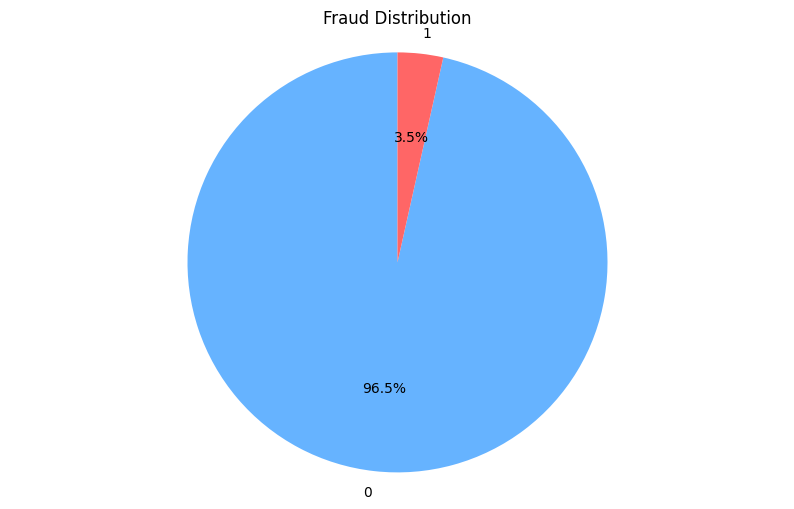

In [45]:
# Calculate the counts of each category in "is_fraud"
fraud_counts = df["fraud"].value_counts()

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'])

# Set the title
ax.set_title('Fraud Distribution')

# Equal aspect ratio ensures the pie is drawn as a circle.
ax.axis('equal')  

# Display the chart
plt.show()

In [46]:
df.groupby(['card_4', 'fraud']).size().unstack()

fraud                  0      1
card_4                         
american express    8089    239
discover            6137    514
mastercard        182721   6496
visa              371394  13373

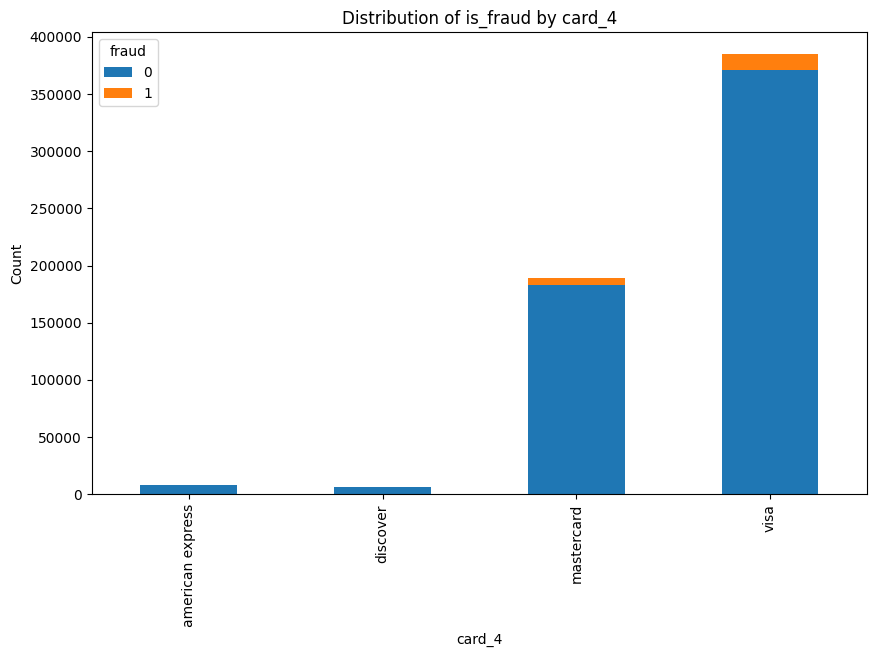

In [47]:
# card_4'e göre fraud dağılımını grup bazında inceleme
card_fraud_distribution = df.groupby(['card_4', 'fraud']).size().unstack()

card_fraud_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of is_fraud by card_4')
plt.xlabel('card_4')
plt.ylabel('Count')
plt.legend(title='fraud')
plt.show()

In [48]:
df.groupby(['card_6', 'fraud']).size().unstack()

fraud                    0         1
card_6                              
charge card         15.000       NaN
credit          139036.000  9950.000
debit           429264.000 10674.000
debit or credit     30.000       NaN

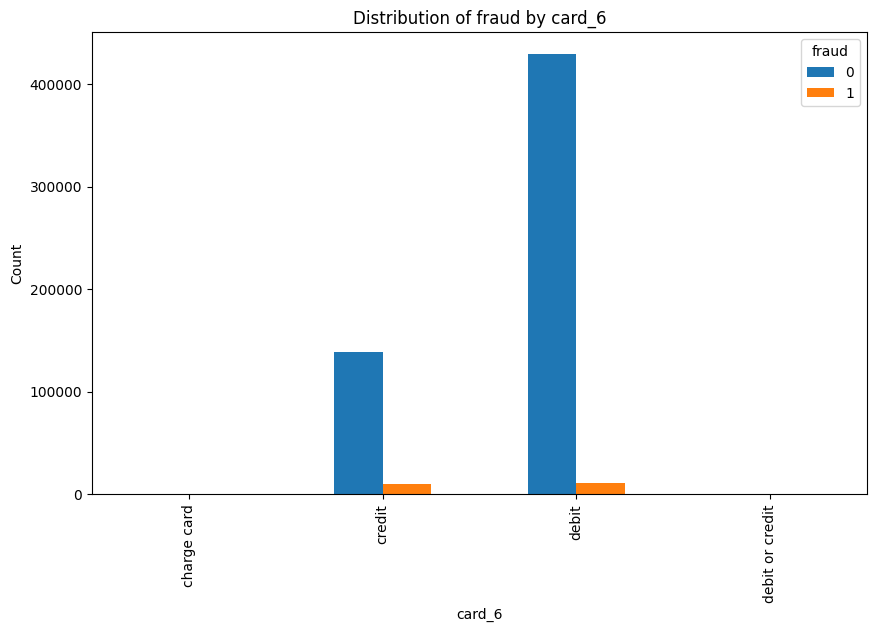

In [49]:
# card_6'ya göre fraud dağılımını grup bazında inceleme
card_fraud_distribution = df.groupby(['card_6', 'fraud']).size().unstack()

card_fraud_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of fraud by card_6')
plt.xlabel('card_6')
plt.ylabel('Count')
plt.legend(title='fraud')
plt.show()

### Data Cleaning


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 112 entries, transaction_id to v_321
dtypes: float32(105), int32(4), object(3)
memory usage: 259.1+ MB


In [51]:
df.duplicated().sum()

0

In [52]:
df.columns

Index(['transaction_id', 'fraud', 'transaction_dt', 'transaction_amt',
       'product_cd', 'card_1', 'card_2', 'card_3', 'card_4', 'card_5',
       ...
       'v_312', 'v_313', 'v_314', 'v_315', 'v_316', 'v_317', 'v_318', 'v_319',
       'v_320', 'v_321'],
      dtype='object', length=112)

In [53]:
df.transaction_dt.dtype

dtype('int32')

In [54]:
df.v_312.dtype

dtype('float32')

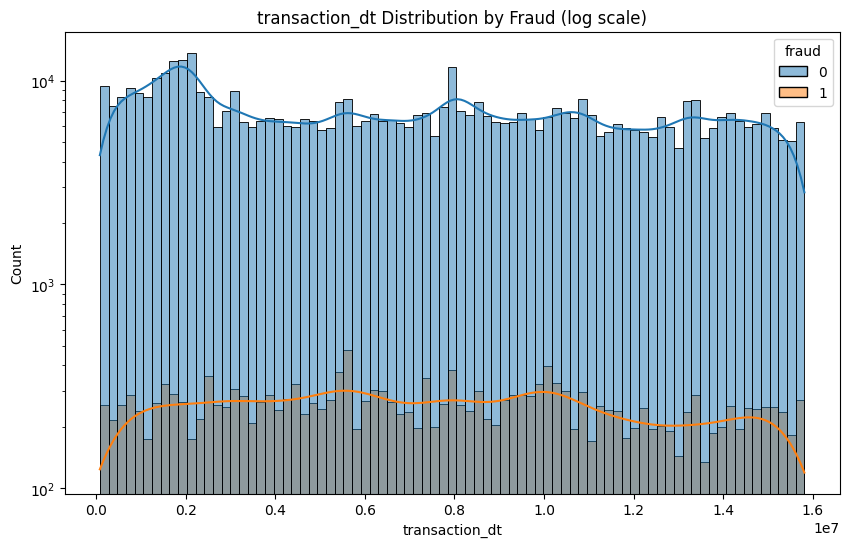

In [55]:
# Plot the distribution using TransactionDT instead of Time
ax = sns.histplot(x='transaction_dt', data=df, hue='fraud', kde=True)

# Set y-axis to log scale
plt.yscale('log')

# Set the title
ax.set_title("transaction_dt Distribution by Fraud (log scale)")

# Show the plot
plt.show()

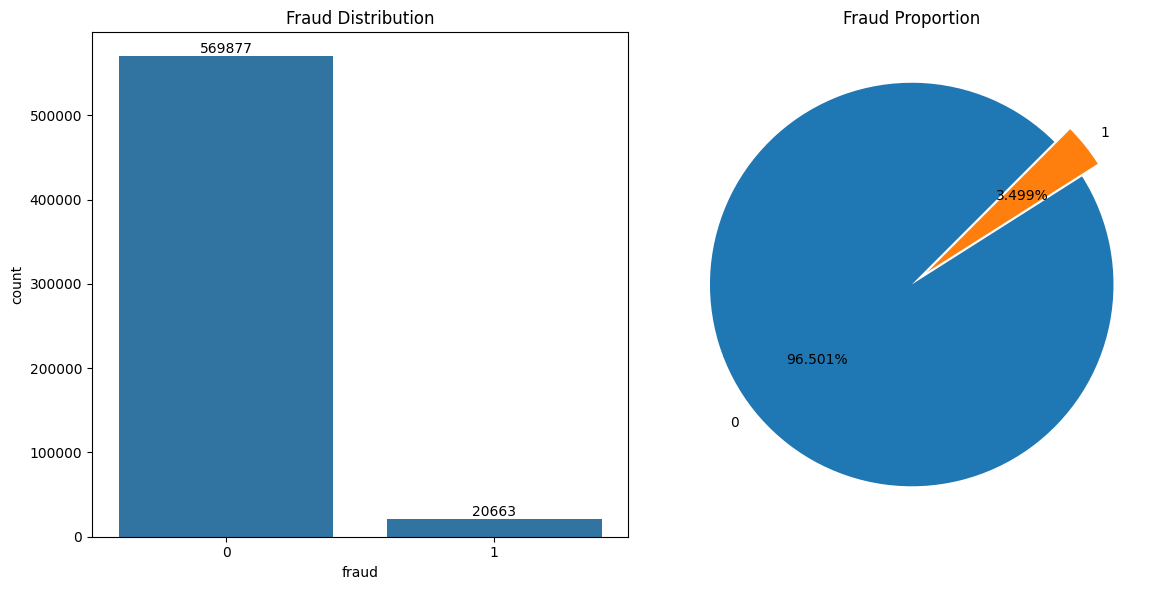

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(x='fraud', data=df, ax=ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_title('Fraud Distribution')

# Pie plot
class_counts = df['fraud'].value_counts()
ax2.pie(class_counts, labels=class_counts.index, autopct='%1.3f%%', startangle=45,explode=[0,0.1])
ax2.set_title('Fraud Proportion')

plt.tight_layout()

plt.show()

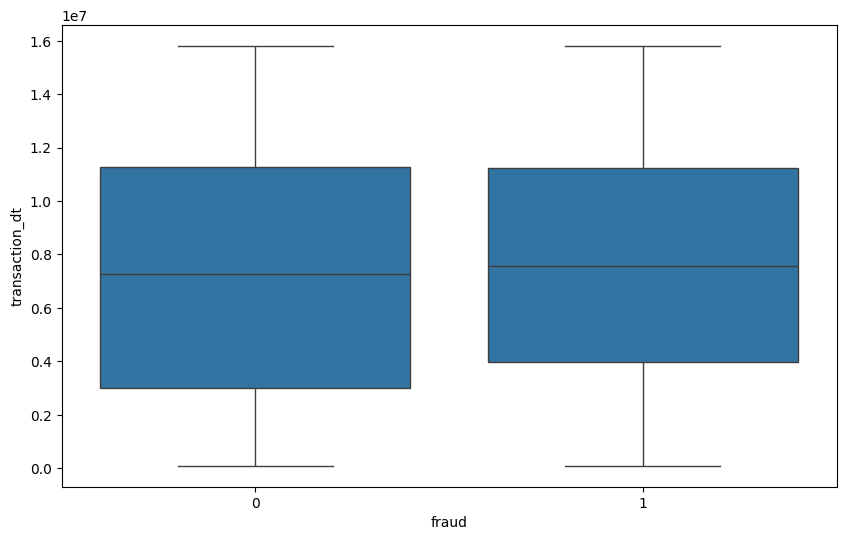

In [57]:
sns.boxplot(x='fraud', y='transaction_dt', data=df);

In [58]:
df.isna().sum()

transaction_id        0
fraud                 0
transaction_dt        0
transaction_amt       0
product_cd            0
card_1                0
card_2             8933
card_3             1565
card_4             1577
card_5             4259
card_6             1571
c_1                   0
c_2                   0
c_3                   0
c_4                   0
c_5                   0
c_6                   0
c_7                   0
c_8                   0
c_9                   0
c_10                  0
c_11                  0
c_12                  0
c_13                  0
c_14                  0
d_1                1269
v_95                314
v_96                314
v_97                314
v_98                314
v_99                314
v_100               314
v_101               314
v_102               314
v_103               314
v_104               314
v_105               314
v_106               314
v_107               314
v_108               314
v_109               314
v_110           

In [59]:
df[['card_1', 'card_2', 'card_3', 'card_4', 'card_5', 'card_6']]

card_1  card_2  card_3      card_4  card_5  card_6
0        13926     NaN 150.000    discover 142.000  credit
1         2755 404.000 150.000  mastercard 102.000  credit
2         4663 490.000 150.000        visa 166.000   debit
3        18132 567.000 150.000  mastercard 117.000   debit
4         4497 514.000 150.000  mastercard 102.000  credit
...        ...     ...     ...         ...     ...     ...
590535    6550     NaN 150.000        visa 226.000   debit
590536   10444 225.000 150.000  mastercard 224.000   debit
590537   12037 595.000 150.000  mastercard 224.000   debit
590538    7826 481.000 150.000  mastercard 224.000   debit
590539   15066 170.000 150.000  mastercard 102.000  credit

[590540 rows x 6 columns]

In [60]:
missing_values = df.isna().sum().sum()
missing_values

47019

In [61]:
# fraud == 1 olan satırları filtreleme
fraud_df = df[df['fraud'] == 1]

# Bu satırlardaki eksik değerleri sayma
missing_values_fraud = fraud_df.isna().sum().sum()
missing_values_fraud

2099

In [62]:
nan_columns = df.columns[df.isna().any()].tolist()

nan_columns

['card_2',
 'card_3',
 'card_4',
 'card_5',
 'card_6',
 'd_1',
 'v_95',
 'v_96',
 'v_97',
 'v_98',
 'v_99',
 'v_100',
 'v_101',
 'v_102',
 'v_103',
 'v_104',
 'v_105',
 'v_106',
 'v_107',
 'v_108',
 'v_109',
 'v_110',
 'v_111',
 'v_112',
 'v_113',
 'v_114',
 'v_115',
 'v_116',
 'v_117',
 'v_118',
 'v_119',
 'v_120',
 'v_121',
 'v_122',
 'v_123',
 'v_124',
 'v_125',
 'v_126',
 'v_127',
 'v_128',
 'v_129',
 'v_130',
 'v_131',
 'v_132',
 'v_133',
 'v_134',
 'v_135',
 'v_136',
 'v_137',
 'v_279',
 'v_280',
 'v_281',
 'v_282',
 'v_283',
 'v_284',
 'v_285',
 'v_286',
 'v_287',
 'v_288',
 'v_289',
 'v_290',
 'v_291',
 'v_292',
 'v_293',
 'v_294',
 'v_295',
 'v_296',
 'v_297',
 'v_298',
 'v_299',
 'v_300',
 'v_301',
 'v_302',
 'v_303',
 'v_304',
 'v_305',
 'v_306',
 'v_307',
 'v_308',
 'v_309',
 'v_310',
 'v_311',
 'v_312',
 'v_313',
 'v_314',
 'v_315',
 'v_316',
 'v_317',
 'v_318',
 'v_319',
 'v_320',
 'v_321']

In [63]:
df = df.dropna(subset=nan_columns)


In [64]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 578081 │ │ float64     │ 105   │                                                          │
│ │ Number of columns │ 112    │ │ int32       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean     ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ transaction_ │  0 │    0 │  3282000 │  170600 │ 2987000 │ 3134000 │ 3282000 │  3429000 │  3578000 │ ▇▇▇▇▇▇ │  │
│ │ id           │    │      │          │         │         │         │         │          │          │        │  │
│ │ fraud        │  0 │    0 │  0.03462 │  0.1828 │       0 │       0 │       0 │        0 │        1 │   ▇    │  │
│ │ transaction_ │  0 │    0 │  7369000 │ 4620000 │   86400 │ 3021000 │ 7282000 │ 11230000 │ 15810000 │ ▇▅▆▆▅▅ │  │
│ │ dt           │    │      │          │         │         │         │         │          │          │        │  │
│ │ transaction_ │  0 │    0 │    134.2 │   237.4 │   0.251 │   43.02 │    68.5 │    124.9 │    31940 │   ▇    │  │
│ │ amt          │    │      │          │         │         │         │         │          │          │        │  │
│ │ card_1       │  0 │    0 │     9921 │    4899 │    1000 │    6019 │    9749 │    14220 │    18400 │ ▆▅▇▆▆▇ │  │
│ │ card_2       │  0 │    0 │    362.5 │   157.9 │     100 │     212 │     361 │      512 │      600 │ ▇▅▆▅▇▇ │  │
│ │ card_3       │  0 │    0 │    153.2 │   11.39 │     100 │     150 │     150 │      150 │      231 │    ▇▁  │  │
│ │ card_5       │  0 │    0 │    199.5 │   41.11 │     100 │     166 │     226 │      226 │      237 │ ▁▁▁ ▁▇ │  │
│ │ c_1          │  0 │    0 │    14.14 │   134.3 │       0 │       1 │       1 │        3 │     4685 │   ▇    │  │
│ │ c_2          │  0 │    0 │    15.33 │   155.6 │       0 │       1 │       1 │        3 │     5691 │   ▇    │  │
│ │ c_3          │  0 │    0 │ 0.005721 │   0.152 │       0 │       0 │       0 │        0 │       26 │   ▇    │  │
│ │ c_4          │  0 │    0 │    4.125 │   69.22 │       0 │       0 │       0 │        0 │     2253 │   ▇    │  │
│ │ c_5          │  0 │    0 │     5.56 │   25.76 │       0 │       0 │       0 │        1 │      349 │   ▇    │  │
│ │ c_6          │  0 │    0 │    9.095 │   71.86 │       0 │       1 │       1 │        2 │     2253 │   ▇    │  │
│ │ c_7          │  0 │    0 │    2.876 │   62.13 │       0 │       0 │       0 │        0 │     2255 │   ▇    │  │
│ │ c_8          │  0 │    0 │    5.193 │   95.97 │       0 │       0 │       0 │        0 │     3331 │   ▇    │  │
│ │ c_9          │  0 │    0 │    4.473 │   16.66 │       0 │       0 │       1 │        2 │      210 │   ▇    │  │
│ │ c_10         │  0 │    0 │     5.29 │   96.16 │       0 │       0 │       0 │        0 │     3257 │   ▇    │  │
│ │ c_11         │  0 │    0 │    10.28 │   94.86 │     

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578081 entries, 1 to 590539
Columns: 112 entries, transaction_id to v_321
dtypes: float32(105), int32(4), object(3)
memory usage: 258.0+ MB


In [66]:
df.fraud.value_counts()

fraud
0    558065
1     20016
Name: count, dtype: int64

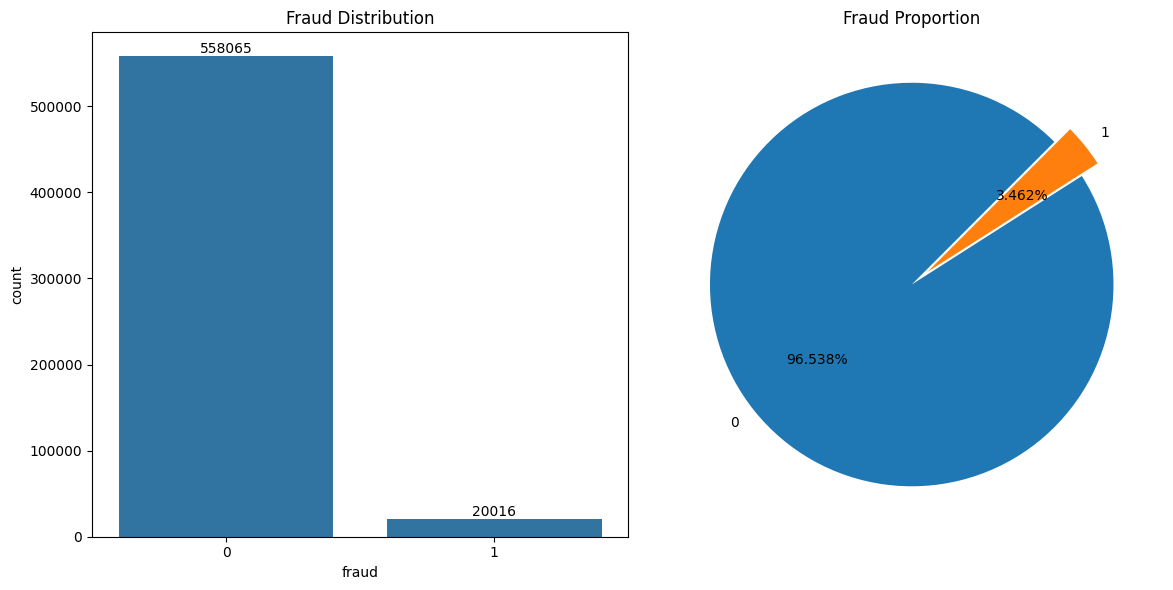

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(x='fraud', data=df, ax=ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_title('Fraud Distribution')

# Pie plot
class_counts = df['fraud'].value_counts()
ax2.pie(class_counts, labels=class_counts.index, autopct='%1.3f%%', startangle=45,explode=[0,0.1])
ax2.set_title('Fraud Proportion')

plt.tight_layout()

plt.show()

In [68]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

ds1 = Dataset(df, cat_features= ['product_cd', 'card_4', 'card_6'], label= 'fraud')

In [69]:
from deepchecks.tabular.suites import data_integrity

# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds1)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_000FM5BO7TU1FK0T6SG8JBPTO">Data Integrity Sui…

In [70]:
# Saniye cinsinden gün cinsine dönüştürme (1 gün = 86400 saniye)
df['time'] = df['transaction_dt'] / 86400

# Virgülden sonraki son iki rakamı almak için
df['time'] = df['time'].round(2)


# İlk 5 satırı kontrol edelim
print(df[['transaction_dt', 'time']].head())

   transaction_dt  time
1           86401 1.000
2           86469 1.000
3           86499 1.000
4           86506 1.000
5           86510 1.000


In [71]:
df.time.max()

183.0

In [72]:
df.time.min()

1.0

In [73]:
df.time.value_counts()

time
92.810     195
92.790     186
92.830     184
92.780     177
92.850     174
          ... 
178.370      1
157.370      1
178.390      1
178.400      1
168.320      1
Name: count, Length: 18012, dtype: int64

In [74]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 578081 │ │ float64     │ 106   │                                                          │
│ │ Number of columns │ 113    │ │ int32       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean     ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ transaction_ │  0 │    0 │  3282000 │  170600 │ 2987000 │ 3134000 │ 3282000 │  3429000 │  3578000 │ ▇▇▇▇▇▇ │  │
│ │ id           │    │      │          │         │         │         │         │          │          │        │  │
│ │ fraud        │  0 │    0 │  0.03462 │  0.1828 │       0 │       0 │       0 │        0 │        1 │   ▇    │  │
│ │ transaction_ │  0 │    0 │  7369000 │ 4620000 │   86400 │ 3021000 │ 7282000 │ 11230000 │ 15810000 │ ▇▅▆▆▅▅ │  │
│ │ dt           │    │      │          │         │         │         │         │          │          │        │  │
│ │ transaction_ │  0 │    0 │    134.2 │   237.4 │   0.251 │   43.02 │    68.5 │    124.9 │    31940 │   ▇    │  │
│ │ amt          │    │      │          │         │         │         │         │          │          │        │  │
│ │ card_1       │  0 │    0 │     9921 │    4899 │    1000 │    6019 │    9749 │    14220 │    18400 │ ▆▅▇▆▆▇ │  │
│ │ card_2       │  0 │    0 │    362.5 │   157.9 │     100 │     212 │     361 │      512 │      600 │ ▇▅▆▅▇▇ │  │
│ │ card_3       │  0 │    0 │    153.2 │   11.39 │     100 │     150 │     150 │      150 │      231 │    ▇▁  │  │
│ │ card_5       │  0 │    0 │    199.5 │   41.11 │     100 │     166 │     226 │      226 │      237 │ ▁▁▁ ▁▇ │  │
│ │ c_1          │  0 │    0 │    14.14 │   134.3 │       0 │       1 │       1 │        3 │     4685 │   ▇    │  │
│ │ c_2          │  0 │    0 │    15.33 │   155.6 │       0 │       1 │       1 │        3 │     5691 │   ▇    │  │
│ │ c_3          │  0 │    0 │ 0.005721 │   0.152 │       0 │       0 │       0 │        0 │       26 │   ▇    │  │
│ │ c_4          │  0 │    0 │    4.125 │   69.22 │       0 │       0 │       0 │        0 │     2253 │   ▇    │  │
│ │ c_5          │  0 │    0 │     5.56 │   25.76 │       0 │       0 │       0 │        1 │      349 │   ▇    │  │
│ │ c_6          │  0 │    0 │    9.095 │   71.86 │       0 │       1 │       1 │        2 │     2253 │   ▇    │  │
│ │ c_7          │  0 │    0 │    2.876 │   62.13 │       0 │       0 │       0 │        0 │     2255 │   ▇    │  │
│ │ c_8          │  0 │    0 │    5.193 │   95.97 │       0 │       0 │       0 │        0 │     3331 │   ▇    │  │
│ │ c_9          │  0 │    0 │    4.473 │   16.66 │       0 │       0 │       1 │        2 │      210 │   ▇    │  │
│ │ c_10         │  0 │    0 │     5.29 │   96.16 │       0 │       0 │       0 │        0 │     3257 │   ▇    │  │
│ │ c_11         │  0 │    0 │    10.28 │   94.86 │     

In [75]:
df.groupby('time')['fraud'].value_counts()

time     fraud
1.000    0        24
1.010    0        44
1.020    0        56
1.030    0        54
1.040    0        58
                  ..
182.960  1         3
182.970  0        27
182.980  0        49
182.990  0        40
183.000  0        18
Name: count, Length: 26894, dtype: int64

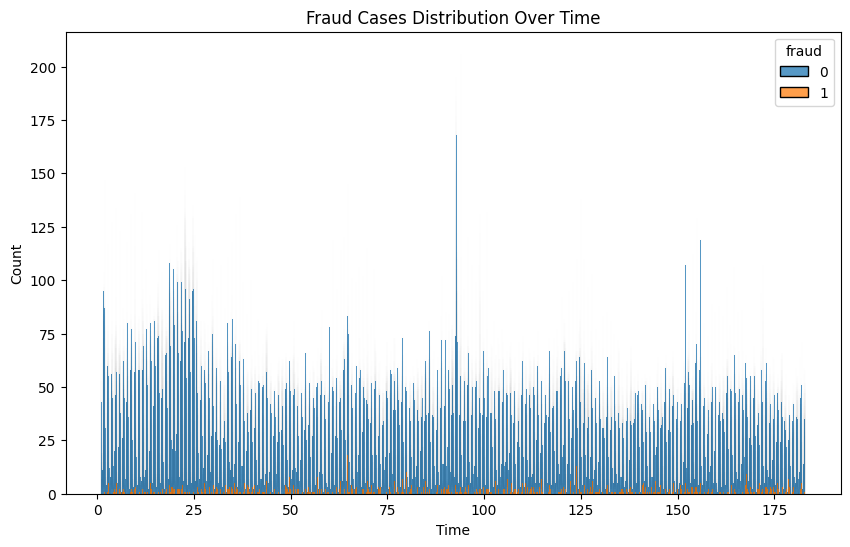

In [76]:
# Grouping and counting fraud cases by time
grouped_fraud = df.groupby('time')['fraud'].value_counts().unstack().fillna(0)

# Creating a histogram plot for fraud cases over time
sns.histplot(data=df, x='time', hue='fraud', multiple='stack', bins=len(df['time'].unique()))

# Display the plot
plt.title("Fraud Cases Distribution Over Time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

In [77]:
# Korelasyon matrisini hesaplayın
#corr_matrix = df.corr(numeric_only = True)



In [78]:
#threshold = 0.9
# Korelasyon matrisindeki yüksek korelasyonlu çiftleri bulun
#high_corr_var = np.where(corr_matrix.abs() > threshold)
#high_corr_pairs = [(corr_matrix.columns[x], corr_matrix.columns[y]) 
#                    for x, y in zip(*high_corr_var) 
#                    if x != y and x < y]

#print("High correlation pairs:", high_corr_pairs)

In [79]:
# Yüksek korelasyonlu sütunları gruplama
#correlated_features = set()
#for pair in high_corr_pairs:
#    correlated_features.update(pair)

# Sütunları gruplandırın
#groups = []
#visited = set()
#for feature in correlated_features:
#    if feature not in visited:
#        group = {feature}
#        stack = [feature]
#        while stack:
#            current_feature = stack.pop()
#            visited.add(current_feature)
#            for pair in high_corr_pairs:
#                if current_feature in pair:
#                    for f in pair:
#                        if f != current_feature and f not in visited:
#                            group.add(f)
#                            stack.append(f)
#        groups.append(group)

# Her gruptan yalnızca bir sütunu koruyun
#features_to_keep = set()
#for group in groups:
#    features_to_keep.add(next(iter(group)))
    
#print(f"Features to keep: {features_to_keep}")    


In [80]:
# Sütunları veri çerçevesinden kaldırın
#features_to_drop = set(corr_matrix.columns) - features_to_keep
#df = df.drop(columns=features_to_drop)

#print(f"Features to drop: {features_to_drop}")

In [81]:
#skim(df)

In [82]:
df.product_cd.unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

'W': May represent "Wholesale"
'H': May represent "Household"
'C': May represent "Consumer goods"
'S': May represent "Services"
'R': May represent "Retail"

In [83]:
def first_looking(df, col):
    """
    Prints basic information about a column in a Pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze.
    col : str
        The name of the column to analyze.

    Returns:
    --------
    None.

    Prints:
    -------
    column name    : str
        The name of the column being analyzed.
    per_of_nulls   : float
        The percentage of null values in the column.
    num_of_nulls   : int
        The number of null values in the column.
    num_of_uniques : int
        The number of unique values in the column.
    shape_of_df    : tuple
        The shape of the DataFrame.
    The unique values in the column and their frequency of occurrence.
    """
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("shape_of_df    : ", df.shape)
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))

In [84]:
for col in df.columns:
    print(first_looking(df, col))
    print()

column name    :  transaction_id
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  578081
shape_of_df    :  (578081, 113)
--------------------------------
transaction_id
2987001    1
3380651    1
3380645    1
3380646    1
3380647    1
          ..
3183484    1
3183483    1
3183482    1
3183481    1
3577539    1
Name: count, Length: 578081, dtype: int64
None

column name    :  fraud
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
shape_of_df    :  (578081, 113)
--------------------------------
fraud
0    558065
1     20016
Name: count, dtype: int64
None

column name    :  transaction_dt
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  561562
shape_of_df    :  (578081, 113)
--------------------------------
transaction_dt
9474817     8
11576951    5
4397066     5
7236588     5
8468062     4
           ..
4590692     1
4590683     1
4590655     1
45906

In [85]:
def unique_count(df, col):
    """
    Prints basic information about a column in a Pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze.
    col : str
        The name of the column to analyze.

    Returns:
    --------
    

    Prints:
    -------
    
    num_of_uniques : int
        The number of unique values in the column.
    The unique values in the column and their frequency of occurrence.
    """
    print("column name    : ", col)
    print("num_of_uniques : ", df[col].astype(str).nunique())
    

In [86]:
for col in df.columns:
    print(unique_count(df, col))
    print()

column name    :  transaction_id
num_of_uniques :  578081
None

column name    :  fraud
num_of_uniques :  2
None

column name    :  transaction_dt
num_of_uniques :  561562
None

column name    :  transaction_amt
num_of_uniques :  20402
None

column name    :  product_cd
num_of_uniques :  5
None

column name    :  card_1
num_of_uniques :  13152
None

column name    :  card_2
num_of_uniques :  499
None

column name    :  card_3
num_of_uniques :  107
None

column name    :  card_4
num_of_uniques :  4
None

column name    :  card_5
num_of_uniques :  117
None

column name    :  card_6
num_of_uniques :  4
None

column name    :  c_1
num_of_uniques :  1648
None

column name    :  c_2
num_of_uniques :  1208
None

column name    :  c_3
num_of_uniques :  27
None

column name    :  c_4
num_of_uniques :  1254
None

column name    :  c_5
num_of_uniques :  316
None

column name    :  c_6
num_of_uniques :  1321
None

column name    :  c_7
num_of_uniques :  1093
None

column name    :  c_8
num_of_uniq

In [87]:
df.drop(columns= ['transaction_dt', 'transaction_id'], inplace = True)

In [88]:
df.duplicated().sum()

244

In [89]:
df.drop_duplicates()

fraud  transaction_amt product_cd  card_1  card_2  card_3      card_4  \
1           0           29.000          W    2755 404.000 150.000  mastercard   
2           0           59.000          W    4663 490.000 150.000        visa   
3           0           50.000          W   18132 567.000 150.000  mastercard   
4           0           50.000          H    4497 514.000 150.000  mastercard   
5           0           49.000          W    5937 555.000 150.000        visa   
...       ...              ...        ...     ...     ...     ...         ...   
590534      0           67.505          C    5812 408.000 185.000  mastercard   
590536      0           39.500          W   10444 225.000 150.000  mastercard   
590537      0           30.950          W   12037 595.000 150.000  mastercard   
590538      0          117.000          W    7826 481.000 150.000  mastercard   
590539      0          279.950          W   15066 170.000 150.000  mastercard   

        card_5  card_6   c_1   c_2   c_3   c_4   c_5   c_6   c_7   c_8   c_9  \
1      102.000  credit 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000   
2      166.000   debit 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 1.000   
3      117.000   debit 2.000 5.000 0.000 0.000 0.000 4.000 0.000 0.000 1.000   
4      102.000  credit 1.000 1.000 0.000 0.000 0.000 1.000 0.000 1.000 0.000   
5      226.000   debit 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 1.000   
...        ...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
590534 224.000   debit 1.000 1.000 0.000 1.000 0.000 1.000 1.000 1.000 0.000   
590536 224.000   debit 1.000 1.000 0.000 0.000 0.000 1.000 0.000 0.000 1.000   
590537 224.000   debit 1.000 1.000 0.000 0.000 1.000 1.000 0.000 0.000 1.000   
590538 224.000   debit 1.000 1.000 0.000 0.000 0.000 3.000 0.000 0.000 2.000   
590539 102.000  credit 2.000 1.000 0.000 0.000 1.000 1.000 0.000 0.000 2.000   

        c_10  c_11  c_12   c_13  c_14     d_1  v_95   v_96   v_97  v_98  \
1      0.000 1.000 0.000  1.000 1.000   0.000 0.000  0.000  0.000 0.000   
2      0.000 1.000 0.000  1.000 1.000   0.000 0.000  0.000  0.000 0.000   
3      0.000 1.000 0.000 25.000 1.000 112.000 1.000 48.000 28.000 0.000   
4      1.000 1.000 0.000  1.000 1.000   0.000 0.000  0.000  0.000 0.000   
5      0.000 1.000 0.000  1.000 1.000   0.000 0.000  0.000  0.000 0.000   
...      ...   ...   ...    ...   ...     ...   ...    ...    ...   ...   
590534 0.000 1.000 1.000  1.000 1.000   0.000 0.000  0.000  0.000 0.000   
590536 0.000 1.000 0.000  1.000 1.000   0.000 0.000  0.000  0.000 0.000   
590537 0.000 1.000 0.000  1.000 1.000   0.000 0.000  0.000  0.000 0.000   
590538 0.000 1.000 1.000  5.000 1.000  22.000 1.000  4.000  1.000 1.000   
590539 0.000 1.000 0.000  1.000 1.000   0.000 1.000  1.000  1.000 0.000   

         v_99  v_100  v_101  v_102  v_103  v_104  v_105  v_106  v_107  v_108  \
1       0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  1.000   
2       0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  1.000   
3      10.000  4.000  1.000 38.000 24.000  0.000  0.000  0.000  1.000  1.000   
4       0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  1.000   
5       0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  1.000   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
590534  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  1.000   
590536  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  1.000   
590537  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  1.000   
590538  1.000  1.000  0.000  3.000  0.000  0.000  0.000  0.000  1.000  1.000   
590539  0.000  0.000  0.000  0.000  0.000  1.000  1.000  1.000  1.000  1.000   

        v_109  v_110  v_111  v_112  v_113  v_114  v_115  v_116  v_117  v_118  \
1       1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
2       1.000  1.000  1.000  1.000  1.000  1.000  1.

In [90]:
df.fraud.value_counts()

fraud
0    558065
1     20016
Name: count, dtype: int64

## 2. Cluster Analysis
- Try to find hidden patterns in data with the help of unsupervised learning algorithms.

In [91]:
cat_columns = df.select_dtypes(include = 'object' ).columns
cat_columns


Index(['product_cd', 'card_4', 'card_6'], dtype='object')

In [92]:
X_pca = df.select_dtypes(include=[np.number])
X_pca

fraud  transaction_amt  card_1  card_2  card_3  card_5   c_1   c_2  \
1           0           29.000    2755 404.000 150.000 102.000 1.000 1.000   
2           0           59.000    4663 490.000 150.000 166.000 1.000 1.000   
3           0           50.000   18132 567.000 150.000 117.000 2.000 5.000   
4           0           50.000    4497 514.000 150.000 102.000 1.000 1.000   
5           0           49.000    5937 555.000 150.000 226.000 1.000 1.000   
...       ...              ...     ...     ...     ...     ...   ...   ...   
590534      0           67.505    5812 408.000 185.000 224.000 1.000 1.000   
590536      0           39.500   10444 225.000 150.000 224.000 1.000 1.000   
590537      0           30.950   12037 595.000 150.000 224.000 1.000 1.000   
590538      0          117.000    7826 481.000 150.000 224.000 1.000 1.000   
590539      0          279.950   15066 170.000 150.000 102.000 2.000 1.000   

         c_3   c_4   c_5   c_6   c_7   c_8   c_9  c_10  c_11  c_12   c_13  \
1      0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 1.000 0.000  1.000   
2      0.000 0.000 0.000 1.000 0.000 0.000 1.000 0.000 1.000 0.000  1.000   
3      0.000 0.000 0.000 4.000 0.000 0.000 1.000 0.000 1.000 0.000 25.000   
4      0.000 0.000 0.000 1.000 0.000 1.000 0.000 1.000 1.000 0.000  1.000   
5      0.000 0.000 0.000 1.000 0.000 0.000 1.000 0.000 1.000 0.000  1.000   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
590534 0.000 1.000 0.000 1.000 1.000 1.000 0.000 0.000 1.000 1.000  1.000   
590536 0.000 0.000 0.000 1.000 0.000 0.000 1.000 0.000 1.000 0.000  1.000   
590537 0.000 0.000 1.000 1.000 0.000 0.000 1.000 0.000 1.000 0.000  1.000   
590538 0.000 0.000 0.000 3.000 0.000 0.000 2.000 0.000 1.000 1.000  5.000   
590539 0.000 0.000 1.000 1.000 0.000 0.000 2.000 0.000 1.000 0.000  1.000   

        c_14     d_1  v_95   v_96   v_97  v_98   v_99  v_100  v_101  v_102  \
1      1.000   0.000 0.000  0.000  0.000 0.000  0.000  0.000  0.000  0.000   
2      1.000   0.000 0.000  0.000  0.000 0.000  0.000  0.000  0.000  0.000   
3      1.000 112.000 1.000 48.000 28.000 0.000 10.000  4.000  1.000 38.000   
4      1.000   0.000 0.000  0.000  0.000 0.000  0.000  0.000  0.000  0.000   
5      1.000   0.000 0.000  0.000  0.000 0.000  0.000  0.000  0.000  0.000   
...      ...     ...   ...    ...    ...   ...    ...    ...    ...    ...   
590534 1.000   0.000 0.000  0.000  0.000 0.000  0.000  0.000  0.000  0.000   
590536 1.000   0.000 0.000  0.000  0.000 0.000  0.000  0.000  0.000  0.000   
590537 1.000   0.000 0.000  0.000  0.000 0.000  0.000  0.000  0.000  0.000   
590538 1.000  22.000 1.000  4.000  1.000 1.000  1.000  1.000  0.000  3.000   
590539 1.000   0.000 1.000  1.000  1.000 0.000  0.000  0.000  0.000  0.000   

        v_103  v_104  v_105  v_106  v_107  v_108  v_109  v_110  v_111  v_112  \
1       0.000  0.000  0.000  0.000  1.000  1.000  1.000  1.000  1.000  1.000   
2       0.000  0.000  0.000  0.000  1.000  1.000  1.000  1.000  1.000  1.000   
3      24.000  0.000  0.000  0.000  1.000  1.000  1.000  1.000  1.000  1.000   
4       0.000  0.000  0.000  0.000  1.000  1.000  1.000  1.000  1.000  1.000   
5       0.000  0.000  0.000  0.000  1.000  1.000  1.000  1.000  1.000  1.000   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
590534  0.000  0.000  0.000  0.000  1.000  1.000  1.000  1.000  1.000  1.000   
590536  0.000  0.000  0.000  0.000  1.000  1.000  1.000  1.000  1.000  1.000   
590537  0.000  0.000  0.000  0.000  1.000  1.000  1.000  1.000  1.000  1.000   
590538  0.000  0.000  0.000  0.000  1.000  1.000  1.000  1.000  1.000  1.000   
590539  0.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   

        v_113  v_114  v_115  v_116  v_117  v_118  v_119  v_120  v_121  v_122  \
1       1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
2       1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
3       

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [94]:
scaler = StandardScaler().set_output(transform="pandas")
pca = PCA(n_components=15).set_output(transform="pandas")

In [95]:
X_pca = scaler.fit_transform(X_pca)
X_pca

fraud  transaction_amt  card_1  card_2  card_3  card_5    c_1    c_2  \
1      -0.189           -0.443  -1.463   0.263  -0.285  -2.371 -0.098 -0.092   
2      -0.189           -0.317  -1.073   0.808  -0.285  -0.814 -0.098 -0.092   
3      -0.189           -0.355   1.676   1.295  -0.285  -2.006 -0.090 -0.066   
4      -0.189           -0.355  -1.107   0.960  -0.285  -2.371 -0.098 -0.092   
5      -0.189           -0.359  -0.813   1.219  -0.285   0.645 -0.098 -0.092   
...       ...              ...     ...     ...     ...     ...    ...    ...   
590534 -0.189           -0.281  -0.839   0.288   2.788   0.597 -0.098 -0.092   
590536 -0.189           -0.399   0.107  -0.871  -0.285   0.597 -0.098 -0.092   
590537 -0.189           -0.435   0.432   1.473  -0.285   0.597 -0.098 -0.092   
590538 -0.189           -0.072  -0.428   0.751  -0.285   0.597 -0.098 -0.092   
590539 -0.189            0.614   1.050  -1.219  -0.285  -2.371 -0.090 -0.092   

          c_3    c_4    c_5    c_6    c_7    c_8    c_9   c_10   c_11   c_12  \
1      -0.038 -0.060 -0.216 -0.113 -0.046 -0.054 -0.268 -0.055 -0.098 -0.047   
2      -0.038 -0.060 -0.216 -0.113 -0.046 -0.054 -0.208 -0.055 -0.098 -0.047   
3      -0.038 -0.060 -0.216 -0.071 -0.046 -0.054 -0.208 -0.055 -0.098 -0.047   
4      -0.038 -0.060 -0.216 -0.113 -0.046 -0.044 -0.268 -0.045 -0.098 -0.047   
5      -0.038 -0.060 -0.216 -0.113 -0.046 -0.054 -0.208 -0.055 -0.098 -0.047   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
590534 -0.038 -0.045 -0.216 -0.113 -0.030 -0.044 -0.268 -0.055 -0.098 -0.036   
590536 -0.038 -0.060 -0.216 -0.113 -0.046 -0.054 -0.208 -0.055 -0.098 -0.047   
590537 -0.038 -0.060 -0.177 -0.113 -0.046 -0.054 -0.208 -0.055 -0.098 -0.047   
590538 -0.038 -0.060 -0.216 -0.085 -0.046 -0.054 -0.148 -0.055 -0.098 -0.036   
590539 -0.038 -0.060 -0.177 -0.113 -0.046 -0.054 -0.148 -0.055 -0.098 -0.047   

         c_13   c_14    d_1   v_95   v_96   v_97   v_98   v_99  v_100  v_101  \
1      -0.244 -0.147 -0.600 -0.050 -0.075 -0.062 -0.218 -0.328 -0.289 -0.044   
2      -0.244 -0.147 -0.600 -0.050 -0.075 -0.062 -0.218 -0.328 -0.289 -0.044   
3      -0.058 -0.147  0.109 -0.003  1.106  0.938 -0.218  3.318  3.907  0.005   
4      -0.244 -0.147 -0.600 -0.050 -0.075 -0.062 -0.218 -0.328 -0.289 -0.044   
5      -0.244 -0.147 -0.600 -0.050 -0.075 -0.062 -0.218 -0.328 -0.289 -0.044   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
590534 -0.244 -0.147 -0.600 -0.050 -0.075 -0.062 -0.218 -0.328 -0.289 -0.044   
590536 -0.244 -0.147 -0.600 -0.050 -0.075 -0.062 -0.218 -0.328 -0.289 -0.044   
590537 -0.244 -0.147 -0.600 -0.050 -0.075 -0.062 -0.218 -0.328 -0.289 -0.044   
590538 -0.213 -0.147 -0.461 -0.003  0.023 -0.027  3.283  0.036  0.760 -0.044   
590539 -0.244 -0.147 -0.600 -0.003 -0.050 -0.027 -0.218 -0.328 -0.289 -0.044   

        v_102  v_103  v_104  v_105  v_106  v_107  v_108  v_109  v_110  v_111  \
1      -0.051 -0.050 -0.132 -0.083 -0.090  0.020 -0.057 -0.116 -0.080 -0.037   
2      -0.051 -0.050 -0.132 -0.083 -0.090  0.020 -0.057 -0.116 -0.080 -0.037   
3       0.996  0.875 -0.132 -0.083 -0.090  0.020 -0.057 -0.116 -0.080 -0.037   
4      -0.051 -0.050 -0.132 -0.083 -0.090  0.020 -0.057 -0.116 -0.080 -0.037   
5      -0.051 -0.050 -0.132 -0.083 -0.090  0.020 -0.057 -0.116 -0.080 -0.037   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
590534 -0.051 -0.050 -0.132 -0.083 -0.090  0.020 -0.057 -0.116 -0.080 -0.037   
590536 -0.051 -0.050 -0.132 -0.083 -0.090  0.020 -0.057 -0.116 -0.080 -0.037   
590537 -0.051 -0.050 -0.132 -0.083 -0.090  0.020 -0.057 -0.116 -0.080 -0.037   
590538  0.031 -0.050 -0.132 -0.083 -0.090  0.020 -0.057 -0.116 -0.080 -0.037   
590539 -0.051 -0.050  1.399  0.210  0.452  0.020 -0.057 -0.116 -0.080 -0.037   

        v_112  v_113  v_114  v_115  v_116  v_117  v_118  v_119  v_120  v_121  \
1      -0.064 -0.046 -0.084 -0.171 -0.115 -0.011 -0.036 -0.020 -0.021 -0.064   
2   

In [96]:
pca_comps = pca.fit_transform(X_pca)
pca_comps

pca0   pca1   pca2   pca3   pca4   pca5   pca6   pca7   pca8   pca9  \
1      -0.719 -0.373 -0.575 -0.938  0.056  0.034  0.069  0.639  0.098 -0.307   
2      -0.741 -0.380 -0.587 -0.915  0.135  0.068 -0.015  0.639  0.074 -0.285   
3       2.524 -0.319  0.027  1.874  3.269 -0.869  0.391 -3.078 -1.121 -2.036   
4      -0.458 -0.198 -0.519 -1.155 -1.320 -0.232  1.870  0.153 -0.092 -0.192   
5      -0.764 -0.389 -0.599 -0.900  0.207  0.083 -0.078  0.625  0.047 -0.288   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
590534 -0.478 -0.168 -0.448 -1.163 -1.426 -0.305  2.059 -0.052 -0.121 -0.062   
590536 -0.721 -0.455 -0.559 -0.846  0.382  0.095 -0.393  0.556  0.099 -0.195   
590537 -0.703 -0.444 -0.565 -0.858  0.307  0.100 -0.301  0.541  0.085 -0.185   
590538  0.868 -0.417  1.122  6.024 -1.316 -1.333 -2.763  1.104  0.391 -1.432   
590539  0.733 -0.399 -0.321 -0.397 -1.932  3.119 -0.847  0.339  0.051  0.203   

        pca10  pca11  pca12  pca13  pca14  
1      -0.156  0.253 -0.377  0.123 -0.262  
2      -0.175  0.358 -0.285  0.181 -0.017  
3       0.107 -0.564  0.736  1.055  0.602  
4       0.183 -1.416 -0.455  0.141  0.348  
5      -0.192  0.467 -0.208  0.233  0.213  
...       ...    ...    ...    ...    ...  
590534  0.415 -1.349 -0.261 -0.046  0.777  
590536 -0.236  0.776 -0.107 -0.080 -0.072  
590537 -0.248  0.669 -0.126 -0.063  0.085  
590538  0.029 -0.775 -1.270  0.567  0.237  
590539 -3.553  0.962  1.131  1.086 -0.033  

[578081 rows x 15 columns]

In [97]:
pca.explained_variance_ratio_.cumsum()
# The cumulative sum of the explained variance ratio provides a way to visualize
# how much variance is explained by each principal component, and how much variance is left unexplained.

array([0.28366081, 0.37784635, 0.45006518, 0.51372294, 0.55910396,
       0.59616512, 0.62555608, 0.65417052, 0.68098018, 0.70310393,
       0.72190134, 0.7397475 , 0.75664173, 0.77241346, 0.78496366])

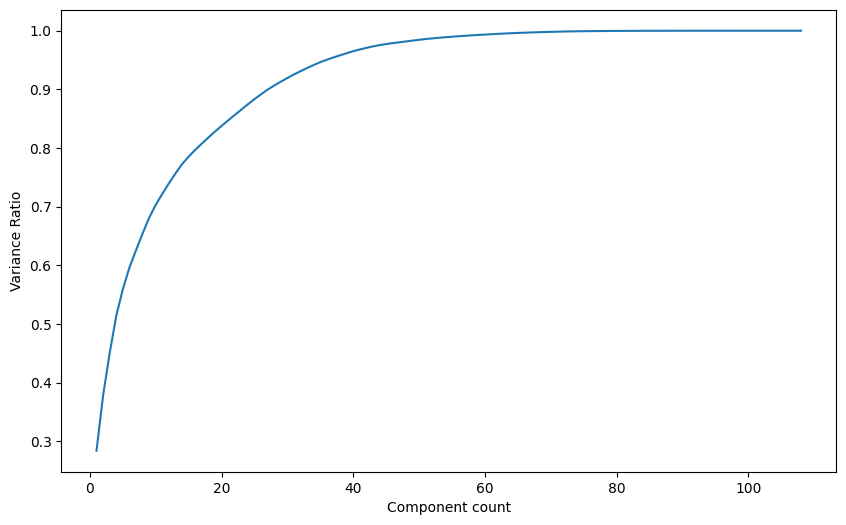

In [98]:
pca = PCA().fit(X_pca)
x = range(1,109)
plt.plot(x, pca.explained_variance_ratio_.cumsum())
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [99]:
pca = PCA(n_components=108).fit(X_pca)

In [100]:
my_dict = {"explained_variance": pca.explained_variance_,
           "explained_variance_ratio": pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio": pca.explained_variance_ratio_.cumsum()}

In [101]:
df_ev = pd.DataFrame(my_dict, index=range(1,109))
df_ev

explained_variance  explained_variance_ratio  \
1                30.635                     0.284   
2                10.172                     0.094   
3                 7.800                     0.072   
4                 6.875                     0.064   
5                 4.901                     0.045   
6                 4.003                     0.037   
7                 3.174                     0.029   
8                 3.090                     0.029   
9                 2.896                     0.027   
10                2.390                     0.022   
11                2.031                     0.019   
12                1.928                     0.018   
13                1.826                     0.017   
14                1.705                     0.016   
15                1.386                     0.013   
16                1.247                     0.012   
17                1.154                     0.011   
18                1.128                     0.010   
19                1.099                     0.010   
20                1.033                     0.010   
21                1.010                     0.009   
22                1.000                     0.009   
23                1.000                     0.009   
24                0.978                     0.009   
25                0.945                     0.009   
26                0.891                     0.008   
27                0.865                     0.008   
28                0.749                     0.007   
29                0.700                     0.006   
30                0.690                     0.006   
31                0.655                     0.006   
32                0.597                     0.006   
33                0.593                     0.005   
34                0.548                     0.005   
35                0.527                     0.005   
36                0.443                     0.004   
37                0.417                     0.004   
38                0.396                     0.004   
39                0.381                     0.004   
40                0.372                     0.003   
41                0.321                     0.003   
42                0.291                     0.003   
43                0.280                     0.003   
44                0.221                     0.002   
45                0.199                     0.002   
46                0.172                     0.002   
47                0.156                     0.001   
48                0.155                     0.001   
49                0.153                     0.001   
50                0.150                     0.001   
51                0.146                     0.001   
52                0.114                     0.001   
53                0.112                     0.001   
54                0.101                     0.001   
55                0.093                     0.001   
56                0.088                     0.001   
57                0.085                     0.001   
58                0.078                     0.001   
59                0.074                     0.001   
60                0.071                     0.001   
61                0.067                     0.001   
62                0.066                     0.001   
63                0.061                     0.001   
64                0.058                     0.001   
65                0.047                     0.000   
66                0.047                     0.000   
67                0.045                     0.000   
68                0.041                     0.000   
69                0.036                     0.000   
70                0.034                     0.000   
71                0.032                     0.000   
72                0.029                     0.000   
73                0.022                     0.000   
74                0.020                     0.000   
75                0.016       

In [102]:
df_ev.explained_variance.sum()
# The sum of explained_variance of all components is always equal to the total number of features.

108.00018682535294

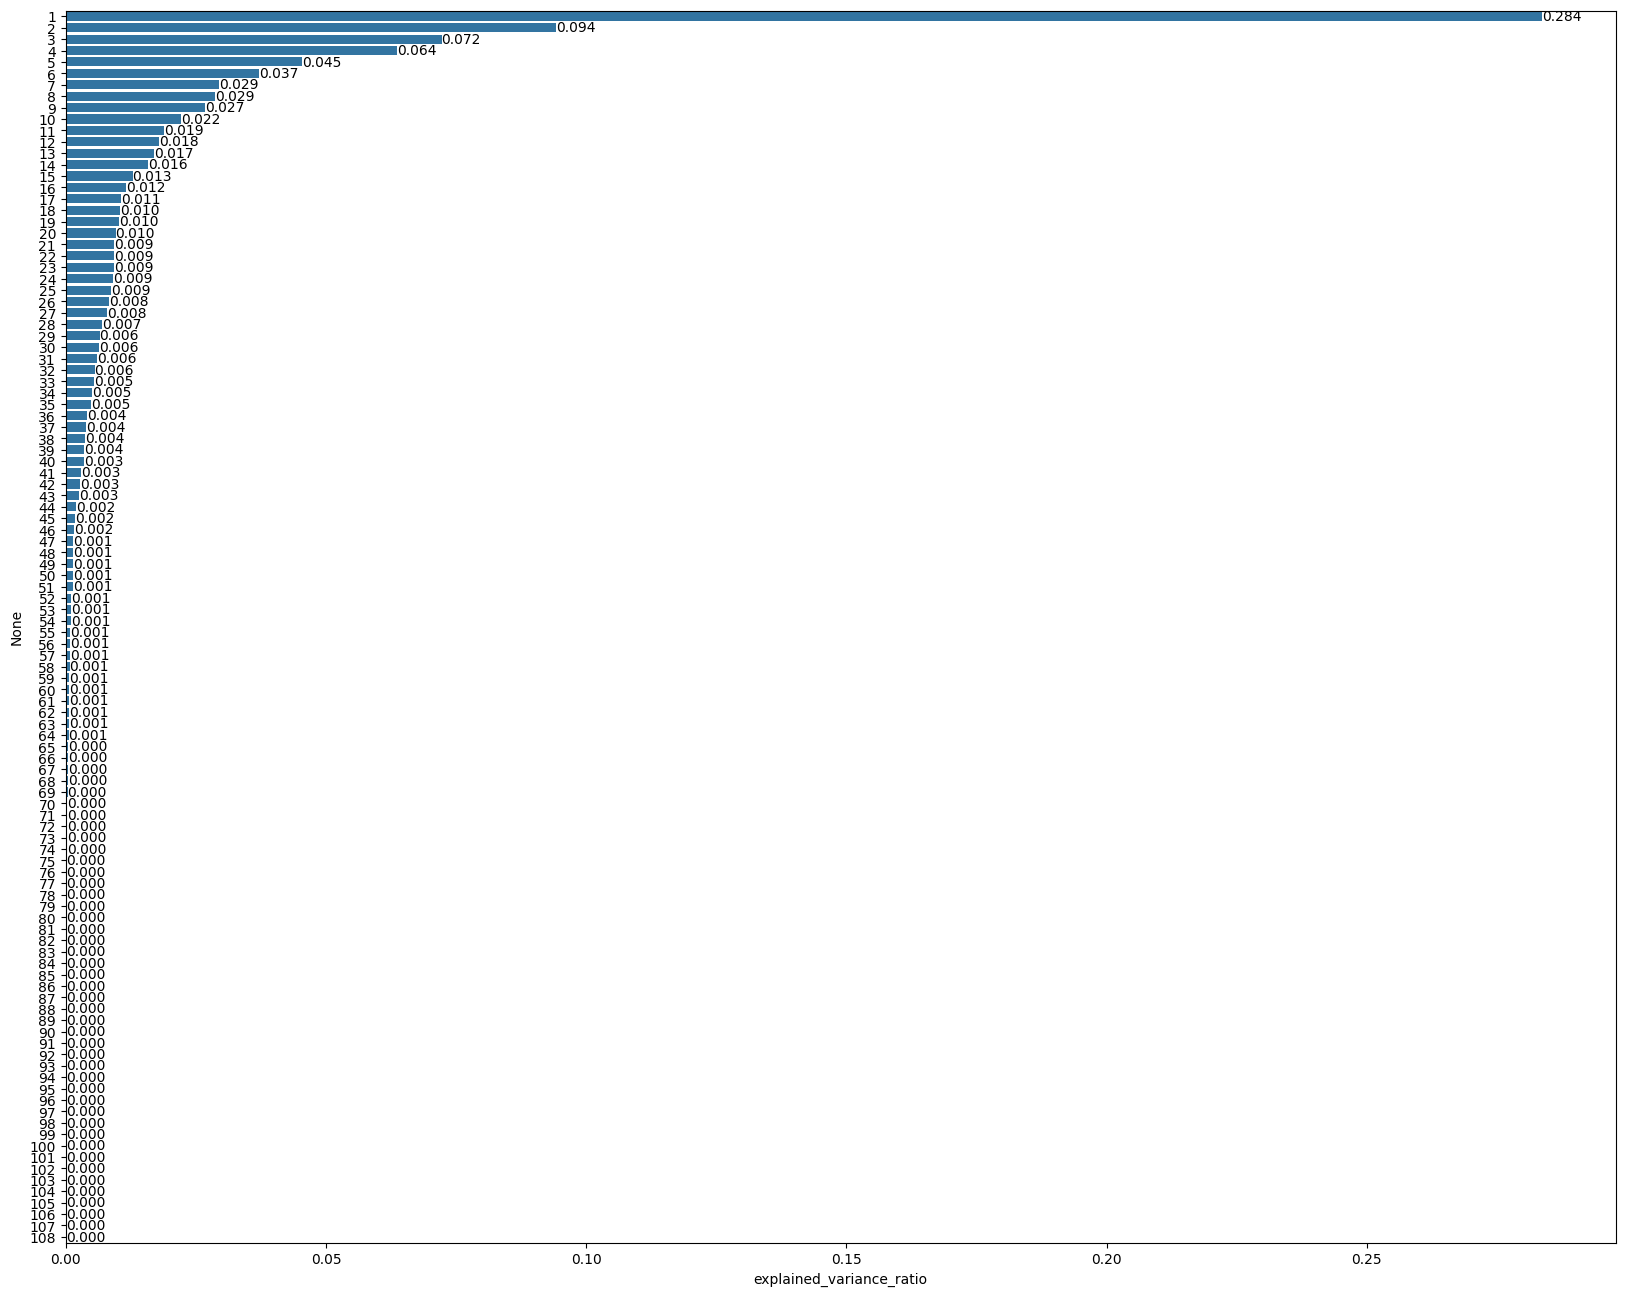

In [103]:
plt.figure(figsize=(20, 16))

ax = sns.barplot(y=df_ev.index,
                 x=df_ev.explained_variance_ratio,
                orient='horizontal')
ax.bar_label(ax.containers[0], fmt="%.3f");

## K-Means with PCA

In [104]:
pca = PCA(n_components=35).fit(X_pca)

In [105]:
principal_components = pca.fit_transform(X_pca)
principal_components

array([[-7.18837411e-01, -3.72913228e-01, -5.75578664e-01, ...,
         2.04203085e-01, -3.28639181e-02,  1.36629027e-03],
       [-7.40861432e-01, -3.80261922e-01, -5.87243506e-01, ...,
         1.36695513e-01, -1.87968174e-02, -4.43638379e-02],
       [ 2.52387271e+00, -3.18673478e-01,  2.71263491e-02, ...,
         3.47951372e-01,  3.60799442e-01, -3.28976965e-01],
       ...,
       [-7.02584750e-01, -4.44293457e-01, -5.65172539e-01, ...,
         1.56729779e-01,  4.04491307e-02, -7.94805315e-03],
       [ 8.68192483e-01, -4.16556678e-01,  1.12192571e+00, ...,
        -1.55125520e+00, -8.42473211e-01,  1.60419192e+00],
       [ 7.32550770e-01, -3.99253627e-01, -3.20864697e-01, ...,
         1.37078061e-01, -1.05828252e-01, -5.58420221e-02]])

In [106]:
# Create DataFrame with principal components
component_X = pd.DataFrame(data=principal_components,
                           columns=[f'component_{i+1}' for i in range(35)])
component_X

component_1  component_2  component_3  component_4  component_5  \
0            -0.719       -0.373       -0.576       -0.938        0.055   
1            -0.741       -0.380       -0.587       -0.915        0.135   
2             2.524       -0.319        0.027        1.874        3.268   
3            -0.458       -0.198       -0.519       -1.155       -1.320   
4            -0.764       -0.389       -0.599       -0.901        0.206   
...             ...          ...          ...          ...          ...   
578076       -0.478       -0.168       -0.448       -1.163       -1.426   
578077       -0.721       -0.455       -0.559       -0.846        0.382   
578078       -0.703       -0.444       -0.565       -0.858        0.307   
578079        0.868       -0.417        1.122        6.024       -1.316   
578080        0.733       -0.399       -0.321       -0.397       -1.932   

        component_6  component_7  component_8  component_9  component_10  \
0             0.036        0.066        0.646        0.087        -0.316   
1             0.070       -0.016        0.642        0.065        -0.286   
2            -0.864        0.389       -3.077       -1.137        -2.031   
3            -0.231        1.870        0.159       -0.102        -0.192   
4             0.085       -0.077        0.625        0.041        -0.282   
...             ...          ...          ...          ...           ...   
578076       -0.310        2.059       -0.051       -0.114        -0.081   
578077        0.092       -0.392        0.556        0.100        -0.198   
578078        0.098       -0.299        0.538        0.085        -0.182   
578079       -1.338       -2.762        1.104        0.382        -1.445   
578080        3.118       -0.849        0.342        0.050         0.185   

        component_11  component_12  component_13  component_14  component_15  \
0             -0.180         0.324         0.399         0.085         0.113   
1             -0.198         0.387         0.307         0.151         0.191   
2              0.041        -0.523        -0.658         0.924         1.208   
3              0.155        -1.333         0.485         0.118         0.601   
4             -0.214         0.459         0.232         0.210         0.274   
...              ...           ...           ...           ...           ...   
578076         0.498        -1.373         0.212        -0.012         0.517   
578077        -0.204         0.761         0.067        -0.053        -0.163   
578078        -0.225         0.643         0.065        -0.027        -0.119   
578079         0.138        -0.796         1.133         0.636        -0.088   
578080        -3.524         0.988        -1.202         1.083         0.126   

        component_16  component_17  component_18  component_19  component_20  \
0              0.460         0.102         0.544         0.118         0.051   
1              0.369        -0.420        -0.093         0.640        -0.012   
2              1.409         0.141         1.655        -0.693        -1.467   
3             -0.015        -0.324         0.275         0.168        -0.439   
4              0.295        -0.876        -0.677         1.203         0.007   
...              ...           ...           ...           ...           ...   
578076        -0.276         0.348        -0.278        -0.323         0.740   
578077         0.245         0.610         0.434         0.014         0.489   
578078         0.039         0.186         0.067         0.213        -0.141   
578079        -0.764        -0.205        -0.616        -0.357         0.269   
578080        -0.020         1.576         1.785        -2.149        -0.321   

        component_21  component_22  component_23  component_24  component_25  \
0              0.463         0.051        -0.266        -0.859         0.501   
1              0.772        -0.057        -0.291        -0.302         0.284   
2              1.984        -0.2

## K-Means Algorithm

In [107]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [108]:
hopkins(component_X)
# We can say that our data consisting of new components is
# randomly distributed and has a high tendency to cluster.

0.9989482445898111

In [109]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k,
                   random_state=42)
    model.fit(component_X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

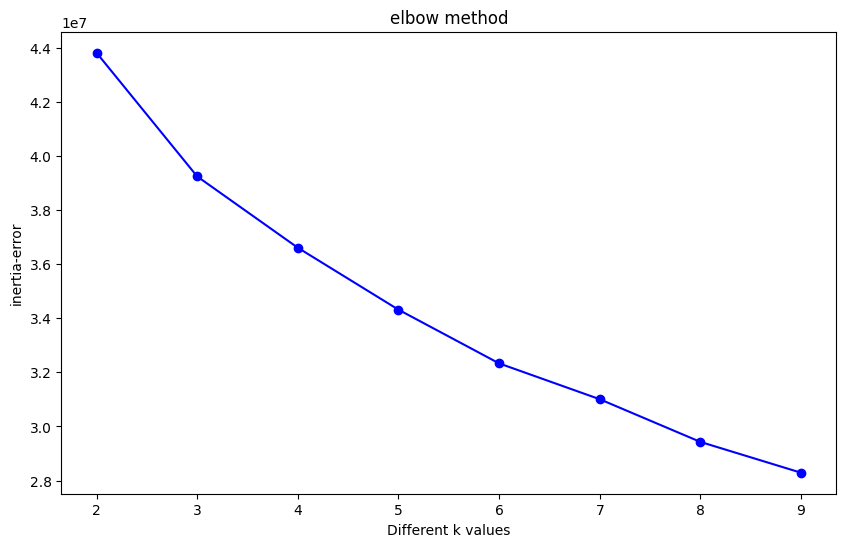

In [110]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [111]:
-pd.Series(ssd).diff()

# we see that the first point where the sharp decline stopped is 3.

0           NaN
1   4571195.668
2   2636019.276
3   2289598.818
4   1984861.896
5   1324893.909
6   1577725.066
7   1138291.420
dtype: float64

In [112]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(component_X)
    distances = kmeanModel.transform(component_X) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

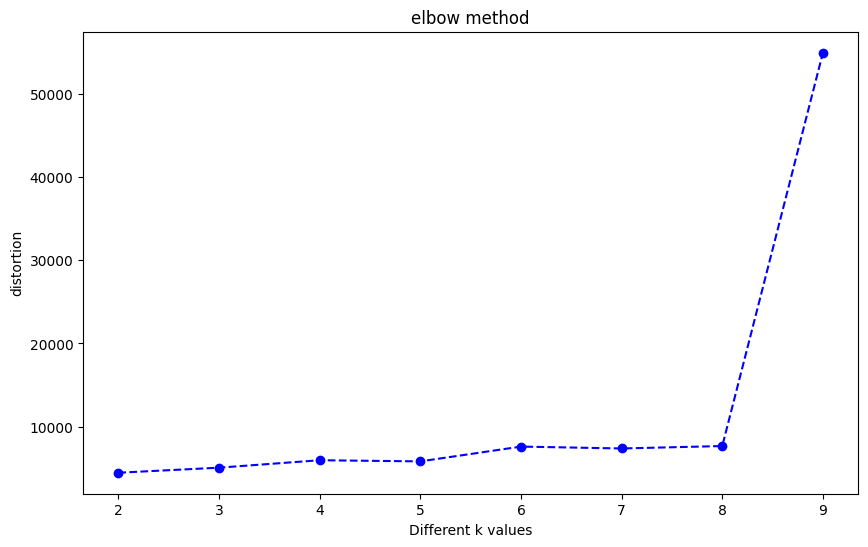

In [113]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

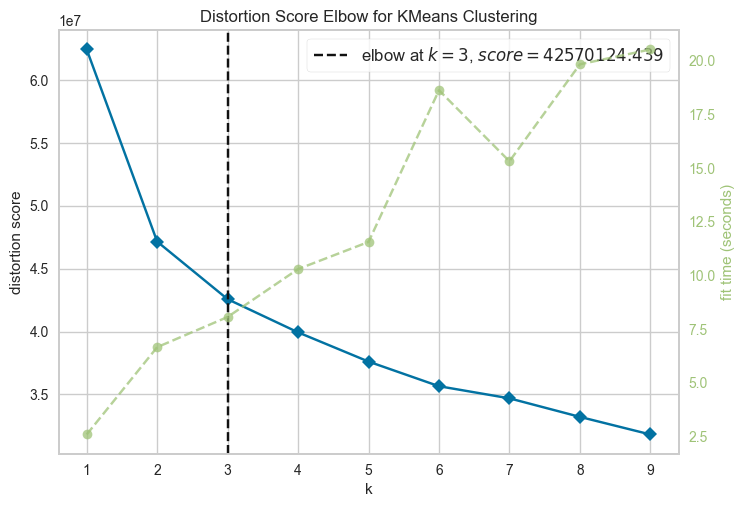

In [114]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(X_pca)
visu.show();

In [115]:
from sklearn.metrics import silhouette_score

# Örnekleme oranı (verinin ne kadarını kullanacağınızı belirler)
sample_fraction = 0.05  # %5 örnekleme

# Veri setinin örneklenmiş hali
sampled_component_X = component_X.sample(frac=sample_fraction, random_state=42)

# Kümeleri belirlemek için kullanılacak k değeri
range_n_clusters = range(2, 10)

for num_clusters in range_n_clusters:
    # KMeans ile kümeleme yap
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(sampled_component_X)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score hesapla
    silhouette_avg = silhouette_score(sampled_component_X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.929502940970241
For n_clusters=3, the silhouette score is 0.8922630322890521
For n_clusters=4, the silhouette score is 0.7782332246337347
For n_clusters=5, the silhouette score is 0.46111818700791113
For n_clusters=6, the silhouette score is 0.4815242081848014
For n_clusters=7, the silhouette score is 0.17898070758371917
For n_clusters=8, the silhouette score is 0.19838630982855276
For n_clusters=9, the silhouette score is 0.20246841322991785


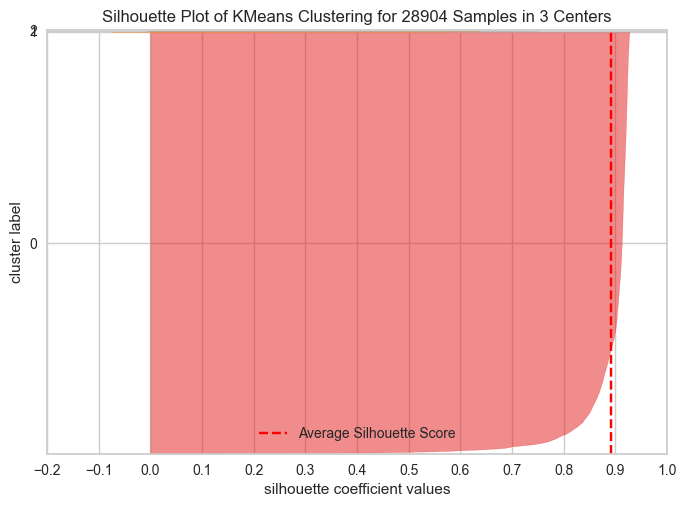

In [116]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model_1 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model_1)
visualizer.fit(sampled_component_X)    # Fit the data to the visualizer
visualizer.poof();

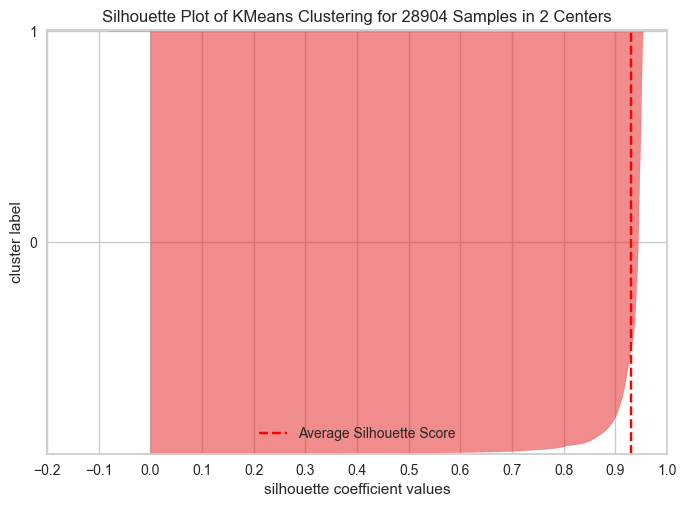

In [117]:
model_1 = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(model_1)
visualizer.fit(sampled_component_X)    # Fit the data to the visualizer
visualizer.poof();

## 3. Data Preprocessing

#### Train - Test Split

In [118]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [119]:
# Define features and target
X = df.drop('fraud', axis=1)
y = df['fraud']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [121]:
import deepchecks
from deepchecks.tabular import Dataset
from deepchecks.suites import train_test_validation

train_dataset = Dataset(X_train, label=y_train, cat_features=[])
test_dataset = Dataset(X_test, label=y_test, cat_features=[])

In [122]:
suite = train_test_validation()
suite_result = suite.run(train_dataset, test_dataset)

In [123]:
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_0E7RVB3SWUINELV4MOTEDF6R1">Train Test Validat…

#### Scaling

In [124]:
# Kategorik sütunlar
cat_onehot = ['product_cd', 'card_6', 'card_4']

# Binary sütunlar
cat_binary = ['v_107', 'v_305']  # Binary sütunlar

# Binary sütunlar için kategoriler (Ordinal encoding)
binary_categories = [[0, 1], [1, 2]]  # v_107 için 0,1 ve v_305 için 1,2

# Sayısal sütunlar (fraud ve binary sütunlar hariç)
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
numeric_features = [col for col in numeric_features if col not in ['v_107', 'v_305']]

# ColumnTransformer ile preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),  # Kategorik sütunlar için OneHotEncoder
        ('binary', OrdinalEncoder(categories=binary_categories), cat_binary),  # Binary sütunlar için OrdinalEncoder
        ('scaler', StandardScaler(), numeric_features)  # Sayısal sütunlar için StandardScaler
    ],
    remainder='passthrough',  # Diğer sütunlar olduğu gibi kalsın
    verbose_feature_names_out=False  # İsimleri sadeleştir
).set_output(transform="pandas")

---
---


## 4. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques.

### Logistic Regression

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [125]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

***ii. Model Training***

In [126]:
log_pipeline = Pipeline(steps=[
    ('preprocessor', column_trans),  # Preprocessing işlemi
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))  # Model (class_weight='balanced')
])

In [127]:
log_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['product_cd', 'card_6',
                                                   'card_4']),
                                                 ('binary',
                                                  OrdinalEncoder(categories=[[0,
                                                                              1],
                                                                             [1,
                                                                              2]]),
                                                  ['v_107', 'v_305']),
                                                 ('scaler', StandardScaler(),
                                                  ['transaction_amt', 'card_1',
                                                   'card_2', 'card_3', 'card_5',
                                                   'c_1', 'c_2', 'c_3', 'c_4',
                                                   'c_5', 'c_6', 'c_7', 'c_8',
                                                   'c_9', 'c_10', 'c_11',
                                                   'c_12', 'c_13', 'c_14',
                                                   'd_1', 'v_95', 'v_96',
                                                   'v_97', 'v_98', 'v_99',
                                                   'v_100', 'v_101', 'v_102',
                                                   'v_103', 'v_104', ...])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])

***iii. Prediction and Model Evaluating  and Tuning***

In [128]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [129]:
eval_metric(log_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[86228 25386]
 [ 1162  2841]]
              precision    recall  f1-score   support

           0       0.99      0.77      0.87    111614
           1       0.10      0.71      0.18      4003

    accuracy                           0.77    115617
   macro avg       0.54      0.74      0.52    115617
weighted avg       0.96      0.77      0.84    115617


Train_Set
[[344950 101501]
 [  4615  11398]]
              precision    recall  f1-score   support

           0       0.99      0.77      0.87    446451
           1       0.10      0.71      0.18     16013

    accuracy                           0.77    462464
   macro avg       0.54      0.74      0.52    462464
weighted avg       0.96      0.77      0.84    462464



In [130]:
from sklearn.metrics import f1_score, recall_score, average_precision_score, precision_score

In [131]:
# from sklearn.metrics import f1_score, recall_score, average_precision_score

# def evaluate_model_with_scores(model_name, model_pipeline, X_train, y_train, X_test, y_test, results_df):
#     # Fit the model
#     model_pipeline.fit(X_train, y_train)
    
#     # Predict on the test data
#     y_test_pred = model_pipeline.predict(X_test)
    
#     # Get the predicted probabilities for the positive class
#     y_test_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
    
#     # Calculate additional metrics for the test set
#     test_f1 = f1_score(y_test, y_test_pred)
#     test_recall = recall_score(y_test, y_test_pred)
#     test_AP = average_precision_score(y_test, y_test_pred_proba)
    
#     # Prepare the results
#     mean_metrics = {
#         'Model': model_name,
#         'F1 Test': test_f1,
#         'Recall Test': test_recall,
#         'AP Test': test_AP
#     }
    
#     # Create a DataFrame with the metrics
#     mean_metrics_df = pd.DataFrame(mean_metrics, index=[0])
    
#     # Append the metrics to the results DataFrame
#     results_df = pd.concat([results_df, mean_metrics_df], ignore_index=True)
    
#     # Print the metrics
#     print(f"Metrics for {model_name}:")
#     print(mean_metrics)
    
#     return results_df



In [132]:
# # Initialize the results_df if it doesn't exist yet
# results_df = pd.DataFrame(columns=['Model', 'F1 Test', 'Recall Test', 'AP Test'])

# # Example usage with a model pipeline
# results_df = evaluate_model_with_scores("Logistic Regression", log_pipeline, X_train, y_train, X_test, y_test, results_df)

# # Display the updated results DataFrame
# print(results_df)

In [133]:
y_pred = log_pipeline.predict(X_test)

In [134]:
y_pred_proba = log_pipeline.predict_proba(X_test)
y_pred_proba

array([[0.63996405, 0.36003595],
       [0.48783179, 0.51216821],
       [0.67425183, 0.32574817],
       ...,
       [0.69172814, 0.30827186],
       [0.85289372, 0.14710628],
       [0.59168758, 0.40831242]])

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87    111614
           1       0.10      0.71      0.18      4003

    accuracy                           0.77    115617
   macro avg       0.54      0.74      0.52    115617
weighted avg       0.96      0.77      0.84    115617



In [136]:
log_AP = average_precision_score(y_test, y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average='binary')
log_rec = recall_score(y_test, y_pred, average='binary')
log_pre = precision_score(y_test, y_pred, average='binary')

print(f"Average Precision Score (AP): {log_AP:.4f}")
print(f"F1 Score: {log_f1:.4f}")
print(f"Recall Score: {log_rec:.4f}")
print(f"Precision Score: {log_pre:.4f}")

Average Precision Score (AP): 0.2135
F1 Score: 0.1763
Recall Score: 0.7097
Precision Score: 0.1006



You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


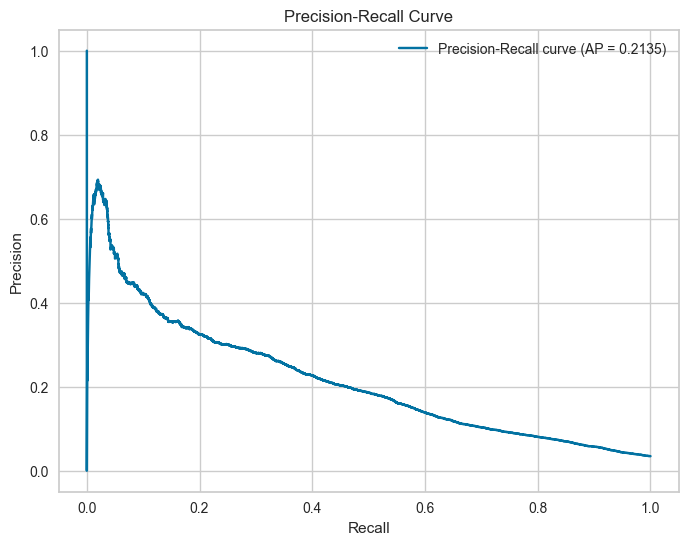

In [138]:
import matplotlib.pyplot as plt

# Calculate precision, recall, and thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {log_AP:.4f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [139]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [140]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, log_pipeline)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 192 seconds, but timeout was configured to 120 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_HN77PMYZHJWYMOTHWF0CJYCPQ">Model Evaluation S…

***vi. Calibrate your model predictions***

https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0

https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

In [170]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('fraud', axis=1)
y = df['fraud'].values

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

# Identify categorical columns
cat_col = X_train.select_dtypes(include=['object', 'bool']).columns

# Define the transformers
encoder = OneHotEncoder(categories="auto",
                        sparse=False,
                        handle_unknown="ignore")

# Define the ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[('cat', encoder, cat_col)],
    remainder='passthrough'
)

# Define the pipeline with preprocessing and model
log_pipeline = Pipeline(steps=[
    ('preprocessor', col_transformer),  # Apply ColumnTransformer
    ('scaler', StandardScaler()),       # Apply StandardScaler
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))  # Model
])

# Fit the pipeline
log_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['product_cd', 'card_4', 'card_6'], dtype='object'))])),
                ('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [171]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, log_loss


In [178]:
!pip install ml_insights

Defaulting to user installation because normal site-packages is not writeable


In [176]:
%%time


preds_uncalibrated_val = log_pipeline.predict_proba(X_val)[:,1]
print(f"Logistic logloss on the evaluation set: {log_loss(y_val, preds_uncalibrated_val):.5f}")
print(f"Logistic ROC-AUC on the evaluation set: {roc_auc_score(y_val, preds_uncalibrated_val):.5f}")
print(f"Logistic F1 on the evaluation set: {f1_score(y_val, log_pipeline.predict(X_val)):.5f}")
print(f"Logistic Average Precision Score (AP) on the evaluation set: {average_precision_score(y_val, log_pipeline.predict(X_val)):.5f}")
print(f"Logistic Recall Score on the evaluation set: {recall_score(y_val, log_pipeline.predict(X_val)):.5f}")
print(f"Logistic Precision Score on the evaluation set: {precision_score(y_val, log_pipeline.predict(X_val)):.5f}")





Logistic logloss on the evaluation set: 0.53064
Logistic ROC-AUC on the evaluation set: 0.81877
Logistic F1 on the evaluation set: 0.17829
Logistic Average Precision Score (AP) on the evaluation set: 0.08296
Logistic Recall Score on the evaluation set: 0.72017
Logistic Precision Score on the evaluation set: 0.10174
CPU times: total: 609 ms
Wall time: 855 ms


In [186]:
# Fit Platt scaling (logistic calibration)
lr = LogisticRegression(C=99999999999, solver='lbfgs')
lr.fit(preds_uncalibrated_val.reshape(-1,1), y_val)

LogisticRegression(C=99999999999)

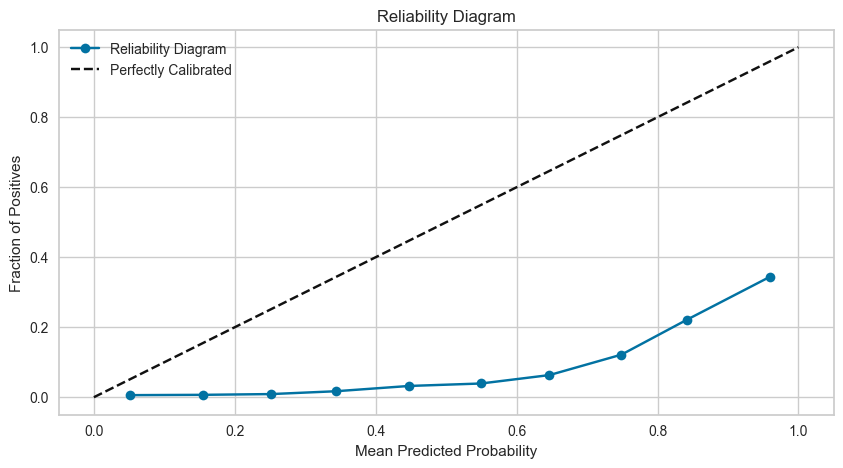

In [190]:
from sklearn.calibration import calibration_curve

# Get the predicted probabilities
prob_pos = log_pipeline.predict_proba(X_test)[:, 1]

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot reliability diagram
plt.figure(figsize=(10, 5))
plt.plot(prob_pred, prob_true, marker='o', label='Reliability Diagram')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.title('Reliability Diagram')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()



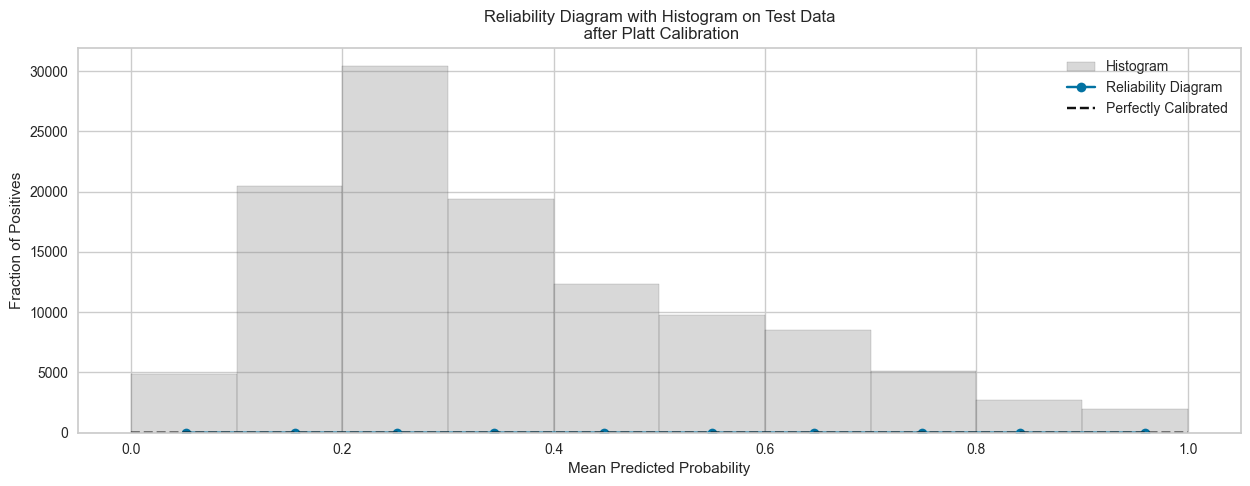

In [195]:
# Plot reliability diagram with histogram
plt.figure(figsize=(15, 5))
plt.hist(testset_platt_probs, bins=10, range=(0, 1), alpha=0.3, color='gray', edgecolor='black', label='Histogram')
plt.plot(prob_pred, prob_true, marker='o', label='Reliability Diagram')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.title('Reliability Diagram with Histogram on Test Data\n after Platt Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()


In [196]:
from sklearn.calibration import IsotonicRegression

# Fit Isotonic Regression on validation data
iso = IsotonicRegression(out_of_bounds='clip')
iso.fit(preds_uncalibrated_val, y_val)

# Predict calibrated probabilities on the test set
testset_iso_probs = iso.predict(preds_uncalibrated_test)


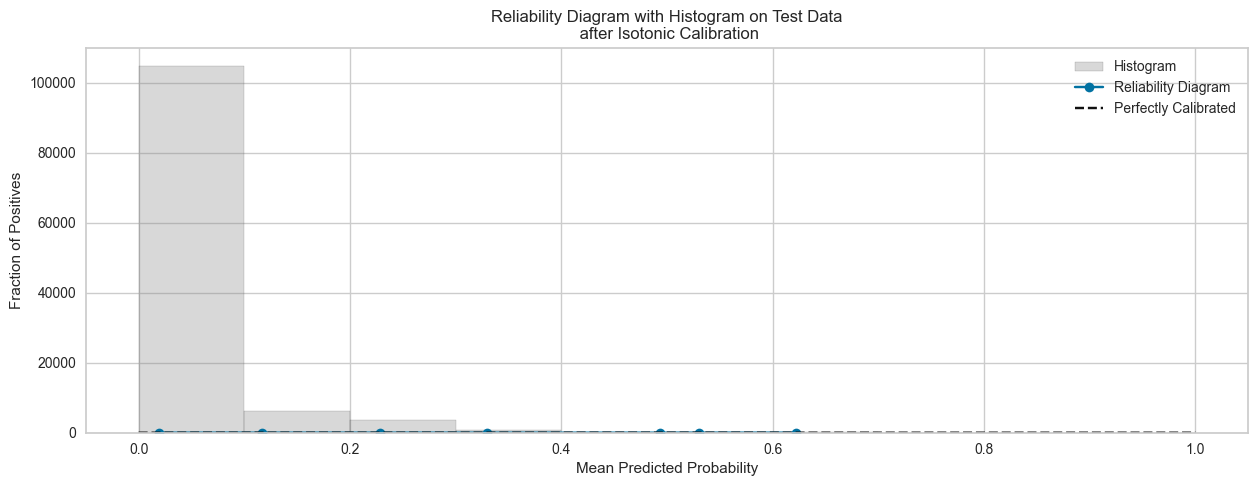

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Compute calibration curve for isotonic regression probabilities
prob_true, prob_pred = calibration_curve(y_test, testset_iso_probs, n_bins=10, strategy='uniform')

# Plot reliability diagram with histogram
plt.figure(figsize=(15, 5))

# Plot histogram of predicted probabilities
plt.hist(testset_iso_probs, bins=10, range=(0, 1), alpha=0.3, color='gray', edgecolor='black', label='Histogram')

# Plot reliability diagram
plt.plot(prob_pred, prob_true, marker='o', label='Reliability Diagram')

# Plot perfectly calibrated line
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')

# Add titles and labels
plt.title('Reliability Diagram with Histogram on Test Data\n after Isotonic Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()

# Show the plot
plt.show()


### Logistic Regression with Unbalanced Data Techniques

### with class_weight

In [198]:
total_samples = 558065 + 20016

# Calculate weight for each class
weight_class_0 = total_samples / (2 * 558065)  # Weight for majority class
weight_class_1 = total_samples / (2 * 20016)   # Weight for minority class

# Create weight dictionary
class_weights = {0: weight_class_0, 1: weight_class_1}

In [199]:
log_reg_cw = Pipeline(steps=[
    ('preprocessor', column_trans),  # Preprocessing işlemi
    ('classifier', LogisticRegression(class_weight=class_weights, random_state=42))
])

In [200]:
log_reg_cw.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['product_cd', 'card_6',
                                                   'card_4']),
                                                 ('binary',
                                                  OrdinalEncoder(categories=[[0,
                                                                              1],
                                                                             [1,
                                                                              2]]),
                                                  ['v_107', 'v_305']),
                                                 ('scaler', StandardScaler(),
                                                  ['transaction_amt', 'card_1',
                                                   'card_2', 'card_3', 'card_5',
                                                   'c_1', 'c_2', 'c_3', 'c_4',
                                                   'c_5', 'c_6', 'c_7', 'c_8',
                                                   'c_9', 'c_10', 'c_11',
                                                   'c_12', 'c_13', 'c_14',
                                                   'd_1', 'v_95', 'v_96',
                                                   'v_97', 'v_98', 'v_99',
                                                   'v_100', 'v_101', 'v_102',
                                                   'v_103', 'v_104', ...])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 LogisticRegression(class_weight={0: 0.517933394855438,
                                                  1: 14.440472621902478},
                                    random_state=42))])

In [201]:
eval_metric(log_reg_cw, X_train, y_train, X_test, y_test)

Test_Set
[[86155 25459]
 [ 1158  2845]]
              precision    recall  f1-score   support

           0       0.99      0.77      0.87    111614
           1       0.10      0.71      0.18      4003

    accuracy                           0.77    115617
   macro avg       0.54      0.74      0.52    115617
weighted avg       0.96      0.77      0.84    115617


Train_Set
[[310262  91543]
 [  4163  10249]]
              precision    recall  f1-score   support

           0       0.99      0.77      0.87    401805
           1       0.10      0.71      0.18     14412

    accuracy                           0.77    416217
   macro avg       0.54      0.74      0.52    416217
weighted avg       0.96      0.77      0.84    416217



In [202]:
y_pred = log_reg_cw.predict(X_test)

In [203]:
y_pred_proba = log_reg_cw.predict_proba(X_test)
y_pred_proba

array([[0.6370786 , 0.3629214 ],
       [0.47987089, 0.52012911],
       [0.67443469, 0.32556531],
       ...,
       [0.6862362 , 0.3137638 ],
       [0.85045632, 0.14954368],
       [0.58965583, 0.41034417]])

In [204]:
log_reg_cw_AP = average_precision_score(y_test, y_pred_proba[:,1])
log_reg_cw_f1 = f1_score(y_test, y_pred)
log_reg_cw_rec = recall_score(y_test, y_pred)
log_reg_cw_pre = precision_score(y_test, y_pred)

print(f"Average Precision Score (AP): {log_reg_cw_AP:.4f}")
print(f"F1 Score: {log_reg_cw_f1:.4f}")
print(f"Recall Score: {log_reg_cw_rec:.4f}")
print(f"Precision Score: {log_reg_cw_pre:.4f}")

Average Precision Score (AP): 0.2133
F1 Score: 0.1761
Recall Score: 0.7107
Precision Score: 0.1005


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [ ]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

### Random Forest Classifier with Unbalanced Data Techniques
   

### with class_weight

In [337]:
df.shape

(578081, 111)

In [338]:
# Define features and target
X = df.drop('fraud', axis=1)
y = df['fraud']

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [340]:
X_train.shape

(462464, 110)

In [341]:
X_test.shape

(115617, 110)

In [342]:
cat_onehot = ['product_cd', 'card_6', 'card_4']

# Binary sütunlar
cat_binary = ['v_107', 'v_305']  # Binary sütunlar

# Binary sütunlar için kategoriler (Ordinal encoding)
binary_categories = [[0, 1], [1, 2]]  # v_107 için 0,1 ve v_305 için 1,2

# Sayısal sütunlar (fraud ve binary sütunlar hariç)
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
numeric_features = [col for col in numeric_features if col not in ['v_107', 'v_305']]

# ColumnTransformer ile preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),  # Kategorik sütunlar için OneHotEncoder
        ('binary', OrdinalEncoder(categories=binary_categories), cat_binary),  # Binary sütunlar için OrdinalEncoder
        ('scaler', MinMaxScaler(), numeric_features)  # Sayısal sütunlar için StandardScaler
    ],
    remainder='passthrough',  # Diğer sütunlar olduğu gibi kalsın
    verbose_feature_names_out=False  # İsimleri sadeleştir
).set_output(transform="pandas")

In [343]:
df.fraud.value_counts()

fraud
0    558065
1     20016
Name: count, dtype: int64

In [344]:
total_samples = 558065 + 20016

# Calculate weight for each class
weight_class_0 = total_samples / (2 * 558065)  # Weight for majority class
weight_class_1 = total_samples / (2 * 20016)   # Weight for minority class

# Create weight dictionary
class_weights = {0: weight_class_0, 1: weight_class_1}

In [345]:
class_weights

{0: 0.517933394855438, 1: 14.440472621902478}

In [346]:
rf = RandomForestClassifier(random_state=42, class_weight=class_weights, n_jobs=-1)

# Create the pipeline
rf_with_cw = Pipeline(steps=[
    ('preprocessing', column_trans),  # Apply the preprocessing steps
    ('rf', rf)  # RandomForestClassifier as the estimator
])

In [347]:
rf_with_cw.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['product_cd', 'card_6',
                                                   'card_4']),
                                                 ('binary',
                                                  OrdinalEncoder(categories=[[0,
                                                                              1],
                                                                             [1,
                                                                              2]]),
                                                  ['v_107', 'v_305']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['transaction_amt', 'card_1',
                                                   'card_2', 'card_3', 'card_5',
                                                   'c_1', 'c_2', 'c_3', 'c_4',
                                                   'c_5', 'c_6', 'c_7', 'c_8',
                                                   'c_9', 'c_10', 'c_11',
                                                   'c_12', 'c_13', 'c_14',
                                                   'd_1', 'v_95', 'v_96',
                                                   'v_97', 'v_98', 'v_99',
                                                   'v_100', 'v_101', 'v_102',
                                                   'v_103', 'v_104', ...])],
                                   verbose_feature_names_out=False)),
                ('rf',
                 RandomForestClassifier(class_weight={0: 0.517933394855438,
                                                      1: 14.440472621902478},
                                        n_jobs=-1, random_state=42))])

In [348]:
y_pred = rf_with_cw.predict(X_test)
y_pred_proba = rf_with_cw.predict_proba(X_test)

In [349]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[111440    211]
 [  2358   1608]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111651
           1       0.88      0.41      0.56      3966

    accuracy                           0.98    115617
   macro avg       0.93      0.70      0.77    115617
weighted avg       0.98      0.98      0.97    115617



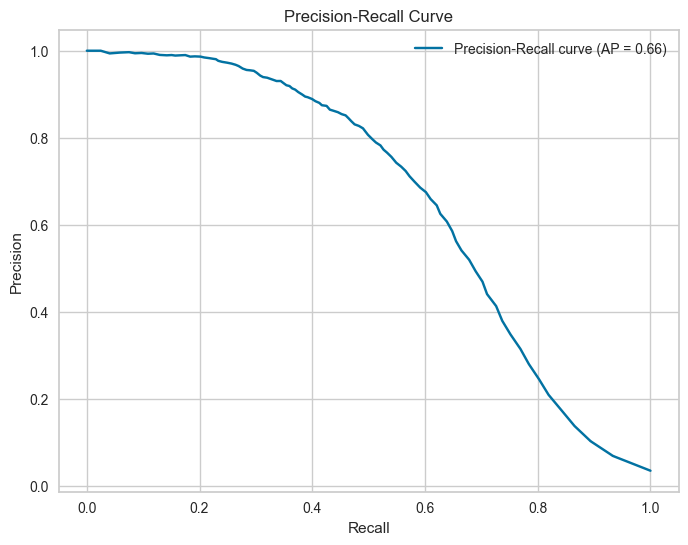

In [350]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
average_precision = average_precision_score(y_test, y_pred_proba[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [351]:
rf_cw_AP = average_precision_score(y_test, y_pred_proba[:,1])
rf_cw_f1 = f1_score(y_test, y_pred)
rf_cw_rec = recall_score(y_test, y_pred)
rf_cw_pre = precision_score(y_test, y_pred)


print(f"Average Precision Score (AP): {rf_cw_AP:.4f}")
print(f"F1 Score: {rf_cw_f1:.4f}")
print(f"Recall Score: {rf_cw_rec:.4f}")
print(f"Precision Score: {rf_cw_pre:.4f}")

Average Precision Score (AP): 0.6558
F1 Score: 0.5559
Recall Score: 0.4054
Precision Score: 0.8840


### with less threshold¶

In [352]:
y_pred_proba = rf_with_cw.predict_proba(X_test)[:, 1]

# Define the threshold
threshold = 0.3

# Apply threshold to get binary predictions
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

#Threshold Ayarlaması
#Modelin tahmin olasılıklarına göre karar eşiğini değiştirerek daha fazla pozitif sınıf tespit edebiliriz. 
#Varsayılan olarak, sınıflandırıcılar %50'yi eşik olarak kullanır, 
#fakat bunu %30 gibi daha düşük bir değere ayarlayarak pozitif sınıfı daha fazla yakalamayı deneyebiliriz.

In [353]:
accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
class_report = classification_report(y_test, y_pred_threshold)

# 4. Sonuçları yazdır
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
 [[110959    692]
 [  1823   2143]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    111651
           1       0.76      0.54      0.63      3966

    accuracy                           0.98    115617
   macro avg       0.87      0.77      0.81    115617
weighted avg       0.98      0.98      0.98    115617

Accuracy: 0.9782
Precision: 0.7559
Recall: 0.5403
F1 Score: 0.6302


In [354]:
from sklearn.metrics import f1_score

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1 score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# Apply the best threshold
y_pred_best_threshold = (y_pred_proba >= best_threshold).astype(int)

# Evaluate with the new threshold
print("Confusion Matrix with optimized F1 threshold:")
print(confusion_matrix(y_test, y_pred_best_threshold))
print("\nClassification Report with optimized F1 threshold:")
print(classification_report(y_test, y_pred_best_threshold))

Confusion Matrix with optimized F1 threshold:
[[110501   1150]
 [  1580   2386]]

Classification Report with optimized F1 threshold:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    111651
           1       0.67      0.60      0.64      3966

    accuracy                           0.98    115617
   macro avg       0.83      0.80      0.81    115617
weighted avg       0.98      0.98      0.98    115617



In [355]:
rf_th_AP = average_precision_score(y_test, y_pred_best_threshold)
rf_th_f1 = f1_score(y_test, y_pred_best_threshold)
rf_th_rec = recall_score(y_test, y_pred_best_threshold)
rf_th_pre = precision_score(y_test, y_pred_best_threshold)

print(f"Average Precision Score (AP): {rf_th_AP:.4f}")
print(f"F1 Score: {rf_th_f1:.4f}")
print(f"Recall Score: {rf_th_rec:.4f}")
print(f"Precision Score: {rf_th_pre:.4f}")

Average Precision Score (AP): 0.4196
F1 Score: 0.6361
Recall Score: 0.6016
Precision Score: 0.6748


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

In [356]:
# Define features and target
X = df.drop('fraud', axis=1)
y = df['fraud']

In [357]:

# Veri setini ayır
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=1234, stratify=y_train_val)

# Veri setlerinin boyutlarını kontrol et
print(f'Train set: {len(X_train)} samples')
print(f'Validation set: {len(X_val)} samples')
print(f'Test set: {len(X_test)} samples')

Train set: 283259 samples
Validation set: 121397 samples
Test set: 173425 samples


In [358]:
# Örnek preprocessing adımlarını tanımla
numeric_features = X.select_dtypes(include=['float64', 'float32', 'int32']).columns.tolist()
cat_onehot = ['product_cd', 'card_6', 'card_4']  # Kategorik sütunlar

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), cat_onehot)
    ],
    remainder='passthrough'
)

# Pipeline oluştur
pipeline_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1))
])

# Modeli eğitim verisiyle fit et
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['transaction_amt', 'card_1',
                                                   'card_2', 'card_3', 'card_5',
                                                   'c_1', 'c_2', 'c_3', 'c_4',
                                                   'c_5', 'c_6', 'c_7', 'c_8',
                                                   'c_9', 'c_10', 'c_11',
                                                   'c_12', 'c_13', 'c_14',
                                                   'd_1', 'v_95', 'v_96',
                                                   'v_97', 'v_98', 'v_99',
                                                   'v_100', 'v_101', 'v_102',
                                                   'v_103', 'v_104', ...]),
                                                 ('cat', OneHotEncoder(),
                                                  ['product_cd', 'card_6',
                                                   'card_4'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=42))])

In [359]:
from sklearn.linear_model import LogisticRegression

# Eğitim ve validation setlerinde tahmin olasılıklarını hesapla
preds_uncalibrated_val = pipeline_rf.predict_proba(X_val)[:, 1]

# Platt Scaling (logistic calibration) modelini fit et
calibration_model = LogisticRegression(C=99999999999, solver='lbfgs')
calibration_model.fit(preds_uncalibrated_val.reshape(-1, 1), y_val)

LogisticRegression(C=99999999999)

In [360]:
preds_uncalibrated_test = pipeline_rf.predict_proba(X_test)[:, 1]

# Kalibre model ile tahminleri düzelt
preds_calibrated_test = calibration_model.predict_proba(preds_uncalibrated_test.reshape(-1, 1))[:, 1]

# İkili tahmin yap
y_pred_calibrated = (preds_calibrated_test >= 0.5).astype(int)

# Performans metriklerini değerlendir
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_calibrated))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_calibrated))

Confusion Matrix:
[[166875    545]
 [  3366   2639]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    167420
           1       0.83      0.44      0.57      6005

    accuracy                           0.98    173425
   macro avg       0.90      0.72      0.78    173425
weighted avg       0.97      0.98      0.97    173425



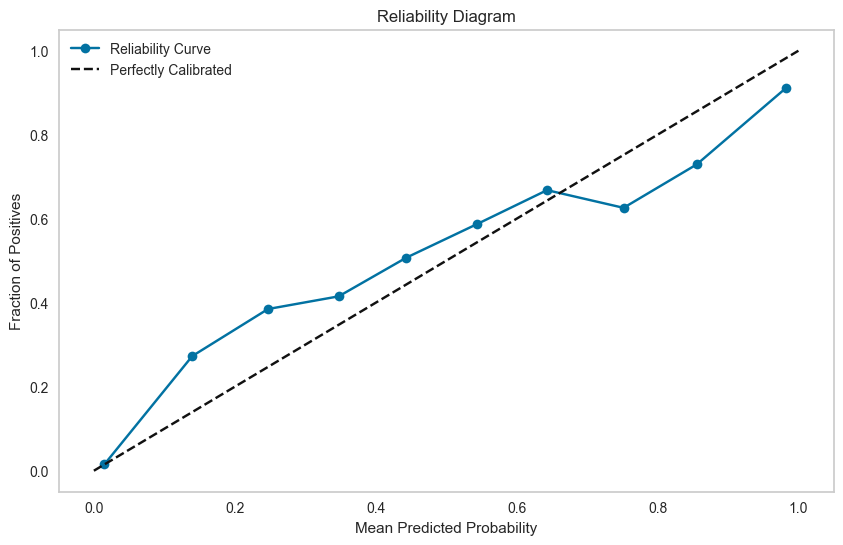

In [361]:
from sklearn.calibration import calibration_curve

# 1. Test seti üzerinde tahmin olasılıklarını hesapla
testset_platt_probs = calibration_model.predict_proba(preds_uncalibrated_test.reshape(-1, 1))[:, 1]

# 2. Reliability Curve'ü hesapla
prob_true, prob_pred = calibration_curve(y_test, testset_platt_probs, n_bins=10, strategy='uniform')

# Reliability Diagram'ı çiz
plt.figure(figsize=(10, 6))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Reliability Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Reliability Diagram')
plt.legend()
plt.grid()
plt.show()

In [362]:
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, classification_report

# 1. Precision-Recall eğrisini hesapla
precision, recall, thresholds = precision_recall_curve(y_test, preds_calibrated_test)

# 2. Her eşik için F1 skorlarını hesapla
f1_scores = 2 * (precision * recall) / (precision + recall)

# 3. En iyi eşiği bul
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f"Best threshold: {best_threshold}")

# 4. En iyi eşikle tahmin yap
y_pred_best_threshold = (preds_calibrated_test >= best_threshold).astype(int)

# 5. Performans metriklerini değerlendir
print("Confusion Matrix with optimized threshold:")
print(confusion_matrix(y_test, y_pred_best_threshold))
print("\nClassification Report with optimized threshold:")
print(classification_report(y_test, y_pred_best_threshold))

Best threshold: 0.14288835108410566
Confusion Matrix with optimized threshold:
[[165736   1684]
 [  2646   3359]]

Classification Report with optimized threshold:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    167420
           1       0.67      0.56      0.61      6005

    accuracy                           0.98    173425
   macro avg       0.83      0.77      0.80    173425
weighted avg       0.97      0.98      0.97    173425



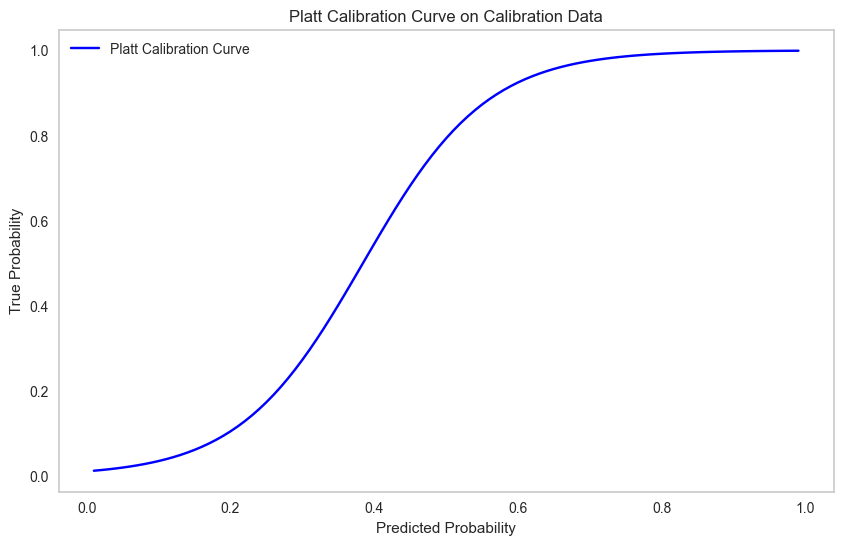

In [363]:
# Platt Calibration Curve'ü için veri hazırlama
tvec = np.linspace(0.01, 0.99, 99)
calibrated_probs = calibration_model.predict_proba(tvec.reshape(-1, 1))[:, 1]

# Platt Calibration Curve'ü çiz
plt.figure(figsize=(10, 6))
plt.plot(tvec, calibrated_probs, label='Platt Calibration Curve', color='blue')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Platt Calibration Curve on Calibration Data')
plt.legend()
plt.grid()
plt.show()

### XGBoost Classifier with Unbalanced Data Techniques

***i. Model Training***

### with class_weight

In [231]:
from xgboost import XGBClassifier

In [232]:
X = df.drop('fraud', axis=1)
y = df['fraud'].values

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.20,
                                                    random_state=42)

In [234]:
# Eğer y_train bir numpy array ise, pandas serisine çevirin
y_train_series = pd.Series(y_train)

# scale_pos_weight = (negatif_sınıf_sayısı / pozitif_sınıf_sayısı)
scale_pos_weight = y_train_series.value_counts()[0] / y_train_series.value_counts()[1]

# XGBoost modelini tanımlama
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

In [235]:
cat_col = X_train.select_dtypes(include=['object', 'bool']).columns

encoder = OneHotEncoder(categories="auto",
                        sparse=False,
                        #drop="first",
                        handle_unknown="ignore")

In [236]:
transformers = [('cat', encoder, cat_col)]

col_transformer = ColumnTransformer(transformers=transformers,
                                    remainder='passthrough')

In [237]:
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [238]:
scaler = MinMaxScaler()

In [239]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
xgb_model = XGBClassifier()


In [240]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [241]:
y_pred = xgb_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [242]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [243]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    # Train set tahminleri
    y_train_pred = xgb_model.predict(X_train)
    
    # Test set tahminleri
    y_pred = xgb_model.predict(X_test)

    # Test set sonuçları
    print("Test Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

    # Train set sonuçları
    print("Train Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [244]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test) 

Test Set
[[111403    211]
 [  2138   1865]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111614
           1       0.90      0.47      0.61      4003

    accuracy                           0.98    115617
   macro avg       0.94      0.73      0.80    115617
weighted avg       0.98      0.98      0.98    115617


Train Set
[[445809    642]
 [  7773   8240]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    446451
           1       0.93      0.51      0.66     16013

    accuracy                           0.98    462464
   macro avg       0.96      0.76      0.83    462464
weighted avg       0.98      0.98      0.98    462464



In [245]:
y_pred_proba = xgb_model.predict_proba(X_test)

In [246]:
xgb_cw_AP = average_precision_score(y_test, y_pred_proba[:, 1])
xgb_cw_f1 = f1_score(y_test, y_pred, average='binary')
xgb_cw_rec = recall_score(y_test, y_pred, average='binary')
xgb_cw_pre = precision_score(y_test, y_pred, average='binary')


print(f"Average Precision Score (AP): {xgb_cw_AP:.4f}")
print(f"F1 Score: {xgb_cw_f1:.4f}")
print(f"Recall Score: {xgb_cw_rec:.4f}")
print(f"Precision Score: {xgb_cw_pre:.4f}")

Average Precision Score (AP): 0.6862
F1 Score: 0.6136
Recall Score: 0.4659
Precision Score: 0.8984


### XGBoost with PCA

In [247]:
# Hedef ve özelliklerin ayrılması
X = df.drop('fraud', axis=1)
y = df['fraud'].values

In [248]:
# Eğitim ve test verisini hazırlama
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

# Kategorik ve sayısal sütunları ayırma
cat_col = X.select_dtypes(include=['object', 'bool']).columns
num_col = X.select_dtypes(include=[np.number]).columns

# OneHotEncoder ve MinMaxScaler tanımlamaları
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = MinMaxScaler()
pca = PCA(n_components=35)

# ColumnTransformer ile dönüşüm işlemlerini tanımlama
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, cat_col),        # Kategorik sütunlar için OneHotEncoder
        ('num', Pipeline(steps=[
            ('scaler', scaler),          # Sayısal sütunlar için MinMaxScaler
            ('pca', pca)                 # Sonrasında PCA uygulama
        ]), num_col)
    ]
)

# Preprocessing işlemi
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# XGBoost modelini tanımlama
xgb_model_pca = XGBClassifier(random_state=42)

# Modeli eğitme
xgb_model_pca.fit(X_train_processed, y_train)

# Test seti üzerinde tahmin yapma
y_pred = xgb_model_pca.predict(X_test_processed)

print("Test Predictions:")
print(y_pred)


Test Predictions:
[0 0 0 ... 0 0 0]


In [249]:
def eval_metric(model, X_train, y_train, X_test, y_test, preprocessor):
    # Eğitim ve test setlerini uygun şekilde dönüştür
    X_train_processed = preprocessor.transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    # Eğitim seti üzerinde tahmin yapma
    y_train_pred = xgb_model_pca.predict(X_train_processed)
    
    # Test seti üzerinde tahmin yapma
    y_pred = xgb_model_pca.predict(X_test_processed)
    
    # Performans metriklerini yazdırma
    print("Train Set Metrics:")
    print("Accuracy Score:", accuracy_score(y_train, y_train_pred))
    print("Classification Report:\n", classification_report(y_train, y_train_pred))
    
    print("Test Set Metrics:")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Fonksiyonu çağırma
eval_metric(xgb_model_pca, X_train, y_train, X_test, y_test, preprocessor)


Train Set Metrics:
Accuracy Score: 0.9764089745363963
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    446451
           1       0.91      0.36      0.51     16013

    accuracy                           0.98    462464
   macro avg       0.94      0.68      0.75    462464
weighted avg       0.97      0.98      0.97    462464

Test Set Metrics:
Accuracy Score: 0.9735938486554745
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    111614
           1       0.84      0.29      0.44      4003

    accuracy                           0.97    115617
   macro avg       0.91      0.65      0.71    115617
weighted avg       0.97      0.97      0.97    115617



In [251]:
y_pred_proba = xgb_model_pca.predict_proba(X_test_processed)

In [252]:
xgb_pca_AP = average_precision_score(y_test, y_pred_proba[:, 1])
xgb_pca_f1 = f1_score(y_test, y_pred, average='binary')
xgb_pca_rec = recall_score(y_test, y_pred, average='binary')
xgb_pca_pre = precision_score(y_test, y_pred, average='binary')


print(f"Average Precision Score (AP): {xgb_pca_AP:.4f}")
print(f"F1 Score: {xgb_pca_f1:.4f}")
print(f"Recall Score: {xgb_pca_rec:.4f}")
print(f"Precision Score: {xgb_pca_pre:.4f}")

Average Precision Score (AP): 0.5380
F1 Score: 0.4352
Recall Score: 0.2938
Precision Score: 0.8388


## XGBOOST with Gridsearch

In [253]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Tüm uyarıları kapatmak için:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

In [254]:
df_sample_0 = df[df['fraud'] == 0].sample(n=28000, random_state=101)
df_sample_1 = df[df['fraud'] == 1].sample(n=1000, random_state=101)

# Verileri birleştirme
df_sample = pd.concat([df_sample_0, df_sample_1])

In [255]:
# Özellikler ve etiketler
X_sample = df_sample.drop('fraud', axis=1)
y_sample = df_sample['fraud']

In [256]:
# Eğer y_sample bir numpy array ise, pandas serisine çevirin
y_sample_series = pd.Series(y_sample)

# Negatif ve pozitif sınıfların sayısını hesaplama
neg_class_count = y_sample_series.value_counts()[0]  # Negatif sınıf sayısı (0)
pos_class_count = y_sample_series.value_counts()[1]  # Pozitif sınıf sayısı (1)

# scale_pos_weight = (negatif_sınıf_sayısı / pozitif_sınıf_sayısı)
scale_pos_weight = neg_class_count / pos_class_count

print(f"scale_pos_weight: {scale_pos_weight}")

scale_pos_weight: 28.0


In [257]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

# Kategorik ve sayısal sütunları ayırma
cat_cols = X_sample.select_dtypes(include=['object']).columns
num_cols = X_sample.select_dtypes(include=['float64', 'int64']).columns

# Kategorik sütunlar için OneHotEncoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Veri dönüştürme işlemleri için Pipeline oluşturma
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),
        ('cat', encoder, cat_cols)
    ]
)

# Veriyi dönüştürme
X_sample_processed = preprocessor.fit_transform(X_sample)

In [258]:
# scale_pos_weight hesaplama
y_sample_series = pd.Series(y_sample)
neg_class_count = y_sample_series.value_counts()[0]
pos_class_count = y_sample_series.value_counts()[1]
scale_pos_weight = neg_class_count / pos_class_count

# XGBoost modelini tanımlama
xgb_gridsearch = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Hiperparametre aralığı
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}

# GridSearchCV ile modelin hiperparametrelerini optimize etme
grid_search = GridSearchCV(
    estimator=xgb_gridsearch,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# GridSearchCV'yi eğitme
grid_search.fit(X_sample_processed, y_sample)

# En iyi parametreler ve model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"En iyi parametreler: {best_params}")
print(f"En iyi model: {best_model}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
En iyi model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [259]:
def eval_metric(xgb_gridsearch, preprocessor, X_train, y_train, X_test, y_test):
    """
    Model performansını değerlendirmek için çeşitli metrikleri hesaplar.
    
    Args:
        model: Eğitimli model
        preprocessor: Eğitim ve test verilerini dönüştüren preprocessor
        X_train: Eğitim verileri
        y_train: Eğitim etiketleri
        X_test: Test verileri
        y_test: Test etiketleri
    """
    # Eğitim ve test veri setlerini dönüştürme
    X_train_processed = preprocessor.transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    # Eğitim ve test veri setleri üzerinde tahmin yapma
    y_train_pred = xgb_gridsearch.predict(X_train_processed)
    y_train_pred_proba = xgb_gridsearch.predict_proba(X_train_processed)[:, 1]
    y_test_pred = xgb_gridsearch.predict(X_test_processed)
    y_test_pred_proba = xgb_gridsearch.predict_proba(X_test_processed)[:, 1]
    
    # Performans metriklerini hesaplama
    train_f1 = f1_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred_proba)
    
    test_f1 = f1_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred_proba)
    
    print(f"Train F1 Score: {train_f1:.4f}")
    print(f"Train Recall Score: {train_recall:.4f}")
    print(f"Train Precision Score: {train_precision:.4f}")
    print(f"Train ROC AUC Score: {train_auc:.4f}")
    
    print(f"Test F1 Score: {test_f1:.4f}")
    print(f"Test Recall Score: {test_recall:.4f}")
    print(f"Test Precision Score: {test_precision:.4f}")
    print(f"Test ROC AUC Score: {test_auc:.4f}")

# Modelin değerlendirilmesi
eval_metric(best_model, preprocessor, X_sample, y_sample, X_test, y_test)

Train F1 Score: 0.1533
Train Recall Score: 0.6450
Train Precision Score: 0.0870
Train ROC AUC Score: 0.7564
Test F1 Score: 0.1545
Test Recall Score: 0.6328
Test Precision Score: 0.0880
Test ROC AUC Score: 0.7390


## Evaluating ROC Curves and AUC

In [260]:
from sklearn.metrics import RocCurveDisplay

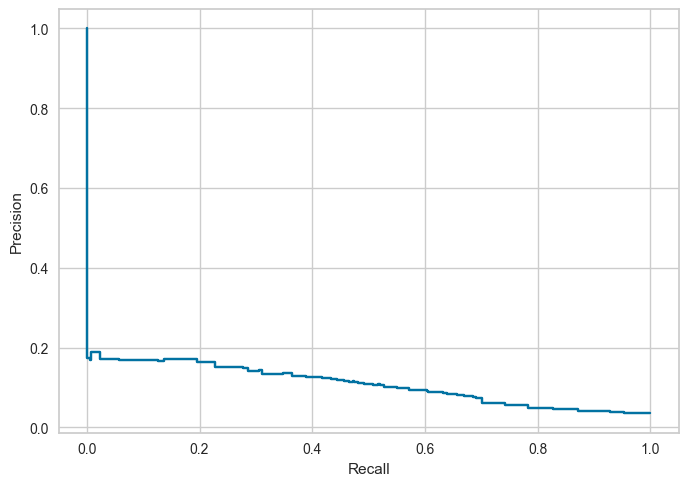

In [261]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Test veri setini dönüştürme
X_test_processed = preprocessor.transform(X_test)

# Tahmin olasılıklarını elde etme
y_test_proba = best_model.predict_proba(X_test_processed)[:, 1]

# Precision-Recall eğrisi için değerleri hesaplama
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)

# Precision-Recall eğrisini çizme
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot()

In [262]:
xgb_grid_AP = average_precision_score(y_test, y_pred_proba[:, 1])
xgb_grid_f1 = f1_score(y_test, y_pred, average='binary')
xgb_grid_rec = recall_score(y_test, y_pred, average='binary')
xgb_grid_pre = precision_score(y_test, y_pred, average='binary')


print(f"Average Precision Score (AP): {xgb_grid_AP:.4f}")
print(f"F1 Score: {xgb_grid_f1:.4f}")
print(f"Recall Score: {xgb_grid_rec:.4f}")
print(f"Precision Score: {xgb_grid_pre:.4f}")

Average Precision Score (AP): 0.5380
F1 Score: 0.4352
Recall Score: 0.2938
Precision Score: 0.8388


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

***vi. Calibrate your model predictions***
- https://webcache.googleusercontent.com/search?q=cache:https://ai.plainenglish.io/model-calibration-secret-sauce-of-super-accurate-models-b401d98d37e0&sca_esv=600219767&strip=1&vwsrc=0
- https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm.

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map.

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [263]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, recall_score
from tensorflow.keras.metrics import Recall
from keras.regularizers import l2

## DL 

#### Preprocessing of Data

In [264]:
X = df.drop('fraud', axis=1)
y = df['fraud'].values

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [266]:
cat_col = X_train.select_dtypes(include=['object', 'bool']).columns

encoder = OneHotEncoder(categories="auto",
                        sparse=False,
                        #drop="first",
                        handle_unknown="ignore")


In [267]:
transformers = [('cat', encoder, cat_col)]

col_transformer = ColumnTransformer(transformers=transformers,
                                    remainder='passthrough')

In [268]:
X_train = col_transformer.fit_transform(X_train)
X_val = col_transformer.transform(X_val)
X_test = col_transformer.transform(X_test)

In [269]:
scaler = MinMaxScaler()

In [270]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [271]:
from tensorflow.keras.regularizers import l2


In [272]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu',kernel_regularizer=l2(0.05)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(name='recall')])

In [273]:
from sklearn.utils import class_weight

#class_weights_ = class_weight.compute_class_weight('balanced',
#                                                  classes=np.unique(y_train),
#                                                  y=y_train)

In [274]:
# Convert array to dictionary
#class_weights = {i: weight for i, weight in enumerate(class_weights_)}

In [275]:
early_stop = EarlyStopping(monitor = "recall",
                           mode = "max", 
                           verbose = 1, 
                           patience = 5,
                           restore_best_weights=True)


In [276]:
!pip install livelossplot==0.1.2


Defaulting to user installation because normal site-packages is not writeable


In [277]:
from livelossplot import PlotLossesKerasTF


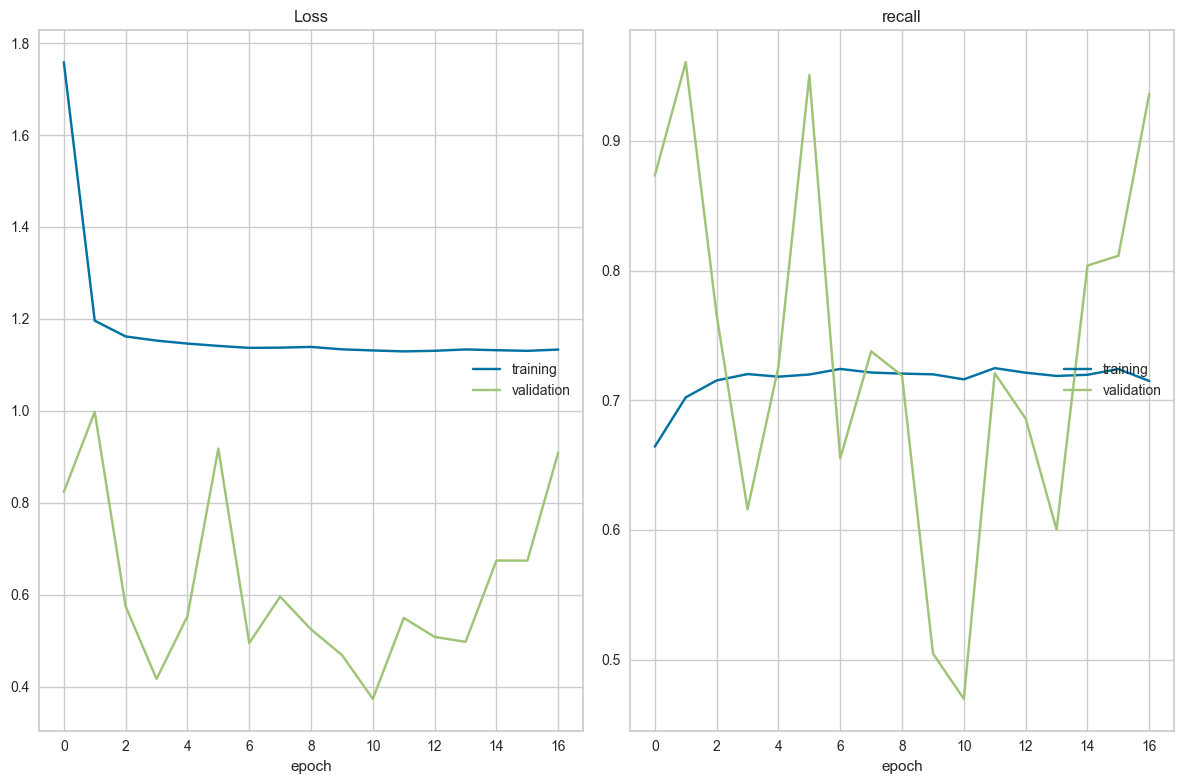

Loss
	training         	 (min:    1.129, max:    1.759, cur:    1.133)
	validation       	 (min:    0.373, max:    0.998, cur:    0.909)
recall
	training         	 (min:    0.664, max:    0.725, cur:    0.715)
	validation       	 (min:    0.470, max:    0.961, cur:    0.936)
813/813 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1264 - recall: 0.7130 - val_loss: 0.9093 - val_recall: 0.9363
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 12.


In [278]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=250, 
          batch_size=512, 
          validation_data=(X_val, y_val),
          callbacks=[early_stop, PlotLossesKerasTF()],
          class_weight={0 : 1, 1 : 29},
          verbose=1)

In [279]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba >= 0.5).astype(int)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

3614/3614 ━━━━━━━━━━━━━━━━━━━━ 3s 724us/step
[[85101 26513]
 [ 1127  2876]]
              precision    recall  f1-score   support

           0       0.99      0.76      0.86    111614
           1       0.10      0.72      0.17      4003

    accuracy                           0.76    115617
   macro avg       0.54      0.74      0.52    115617
weighted avg       0.96      0.76      0.84    115617



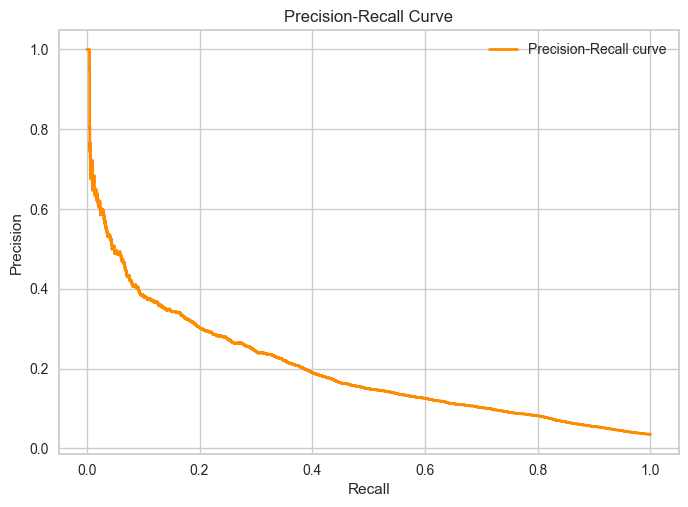

In [280]:
# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

### optuna

In [281]:
# Define the objective function for Optuna
def objective(trial):
    # Define the model
    model = Sequential()
    model.add(Dense(trial.suggest_int('units1', 32, 256), input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout1', 0.2, 0.5)))
    model.add(Dense(trial.suggest_int('units2', 16, 128), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout2', 0.2, 0.5)))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(name='recall')])

    # Early stopping callback
    early_stop = EarlyStopping(monitor='recall', mode='max', verbose=1, patience=5, restore_best_weights=True)

    # Train the model
    model.fit(x=X_train, y=y_train, epochs=100, batch_size=252, validation_data=(X_val, y_val),
              callbacks=[early_stop], verbose=1)

    # Evaluate the model on the validation set
    _, recall = model.evaluate(X_val, y_val)
    
    return recall

In [282]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2024-09-17 15:54:43,545] A new study created in memory with name: no-name-6bd22b88-cf51-4954-ac04-691105a25422


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3434 - recall: 0.1873 - val_loss: 0.1263 - val_recall: 0.0387
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1326 - recall: 0.0508 - val_loss: 0.1203 - val_recall: 0.0643
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1260 - recall: 0.0736 - val_loss: 0.1174 - val_recall: 0.0906
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1201 - recall: 0.1107 - val_loss: 0.1153 - val_recall: 0.1230
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1203 - recall: 0.1148 - val_loss: 0.1415 - val_recall: 0.2417
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1207 - recall: 0.1072 - val_loss: 0.1139 - val_recall: 0.1562
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1161 - recall: 0.1370 - val_loss: 0.1138 - val_recall: 0.1893
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1151 - recall: 0.1379 - val_loss: 0.1118 - val

[I 2024-09-17 15:58:01,889] Trial 0 finished with value: 0.38163647055625916 and parameters: {'units1': 229, 'dropout1': 0.30427999584330256, 'units2': 29, 'dropout2': 0.37739376265592994}. Best is trial 0 with value: 0.38163647055625916.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2925 - recall: 0.1357 - val_loss: 0.1245 - val_recall: 0.0456
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1290 - recall: 0.0561 - val_loss: 0.1203 - val_recall: 0.0675
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1252 - recall: 0.0781 - val_loss: 0.1176 - val_recall: 0.0943
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1199 - recall: 0.1032 - val_loss: 0.1154 - val_recall: 0.1099
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1211 - recall: 0.1194 - val_loss: 0.1161 - val_recall: 0.1143
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1172 - recall: 0.1312 - val_loss: 0.1134 - val_recall: 0.1774
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1141 - recall: 0.1453 - val_loss: 0.1102 - val_recall: 0.1568
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1149 - recall: 0.1495 - val_loss: 0.1091 - val

[I 2024-09-17 15:59:49,063] Trial 1 finished with value: 0.17738912999629974 and parameters: {'units1': 91, 'dropout1': 0.37870231219871636, 'units2': 61, 'dropout2': 0.25417533149422217}. Best is trial 0 with value: 0.38163647055625916.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2588 - recall: 0.1308 - val_loss: 0.1237 - val_recall: 0.0625
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1263 - recall: 0.0609 - val_loss: 0.1182 - val_recall: 0.0893
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1210 - recall: 0.0991 - val_loss: 0.1183 - val_recall: 0.1880
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1175 - recall: 0.1360 - val_loss: 0.1124 - val_recall: 0.1661
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1152 - recall: 0.1468 - val_loss: 0.1135 - val_recall: 0.1480
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1144 - recall: 0.1677 - val_loss: 0.1073 - val_recall: 0.1674
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1108 - recall: 0.1792 - val_loss: 0.1076 - val_recall: 0.1980
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1101 - recall: 0.1921 - val_loss: 0.1042 - val

[I 2024-09-17 16:01:49,036] Trial 2 finished with value: 0.33853840827941895 and parameters: {'units1': 212, 'dropout1': 0.28281951704910724, 'units2': 120, 'dropout2': 0.2176494564178366}. Best is trial 0 with value: 0.38163647055625916.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3485 - recall: 0.1620 - val_loss: 0.1288 - val_recall: 0.0150
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1386 - recall: 0.0285 - val_loss: 0.1253 - val_recall: 0.0262
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1310 - recall: 0.0403 - val_loss: 0.1243 - val_recall: 0.0344
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1287 - recall: 0.0465 - val_loss: 0.1214 - val_recall: 0.0412
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1254 - recall: 0.0522 - val_loss: 0.1192 - val_recall: 0.0831
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1227 - recall: 0.0879 - val_loss: 0.1174 - val_recall: 0.0937
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1196 - recall: 0.1100 - val_loss: 0.1156 - val_recall: 0.1287
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1205 - recall: 0.1192 - val_loss: 0.1550 - val

[I 2024-09-17 16:03:58,420] Trial 3 finished with value: 0.2517176866531372 and parameters: {'units1': 33, 'dropout1': 0.2675426102433317, 'units2': 43, 'dropout2': 0.46023669713124726}. Best is trial 0 with value: 0.38163647055625916.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2752 - recall: 0.1084 - val_loss: 0.1262 - val_recall: 0.0369
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1321 - recall: 0.0364 - val_loss: 0.1220 - val_recall: 0.0462
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1266 - recall: 0.0564 - val_loss: 0.1196 - val_recall: 0.0681
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1238 - recall: 0.0793 - val_loss: 0.1183 - val_recall: 0.0712
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1207 - recall: 0.1021 - val_loss: 0.1197 - val_recall: 0.1380
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1185 - recall: 0.1153 - val_loss: 0.1160 - val_recall: 0.1049
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1178 - recall: 0.1294 - val_loss: 0.1108 - val_recall: 0.1512
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1169 - recall: 0.1228 - val_loss: 0.1119 - val

[I 2024-09-17 16:06:49,180] Trial 4 finished with value: 0.2667083144187927 and parameters: {'units1': 105, 'dropout1': 0.47324280082243386, 'units2': 125, 'dropout2': 0.3002630627393827}. Best is trial 0 with value: 0.38163647055625916.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2775 - recall: 0.1442 - val_loss: 0.1229 - val_recall: 0.0412
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1318 - recall: 0.0500 - val_loss: 0.1209 - val_recall: 0.0775
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1249 - recall: 0.0723 - val_loss: 0.1172 - val_recall: 0.1287
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1210 - recall: 0.1059 - val_loss: 0.1161 - val_recall: 0.0987
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1188 - recall: 0.1259 - val_loss: 0.1148 - val_recall: 0.1137
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1201 - recall: 0.1253 - val_loss: 0.1124 - val_recall: 0.1761
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1172 - recall: 0.1357 - val_loss: 0.1233 - val_recall: 0.2823
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1126 - recall: 0.1529 - val_loss: 0.1108 - val

[I 2024-09-17 16:08:47,367] Trial 5 finished with value: 0.21486571431159973 and parameters: {'units1': 148, 'dropout1': 0.3601115823834188, 'units2': 125, 'dropout2': 0.3566550923510128}. Best is trial 0 with value: 0.38163647055625916.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3323 - recall: 0.1751 - val_loss: 0.1249 - val_recall: 0.0300
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1319 - recall: 0.0459 - val_loss: 0.1220 - val_recall: 0.0381
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1266 - recall: 0.0598 - val_loss: 0.1200 - val_recall: 0.0637
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1239 - recall: 0.0902 - val_loss: 0.1153 - val_recall: 0.0949
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1209 - recall: 0.1035 - val_loss: 0.1140 - val_recall: 0.1493
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1183 - recall: 0.1257 - val_loss: 0.1115 - val_recall: 0.1530
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1160 - recall: 0.1376 - val_loss: 0.1107 - val_recall: 0.1330
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1135 - recall: 0.1500 - val_loss: 0.1094 - val

[I 2024-09-17 16:11:24,232] Trial 6 finished with value: 0.21611492335796356 and parameters: {'units1': 206, 'dropout1': 0.42213916303726584, 'units2': 29, 'dropout2': 0.2866152979440681}. Best is trial 0 with value: 0.38163647055625916.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3392 - recall: 0.1773 - val_loss: 0.1273 - val_recall: 0.0344
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1355 - recall: 0.0507 - val_loss: 0.1232 - val_recall: 0.0344
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1268 - recall: 0.0584 - val_loss: 0.1199 - val_recall: 0.0493
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1258 - recall: 0.0587 - val_loss: 0.1184 - val_recall: 0.0562
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1229 - recall: 0.0784 - val_loss: 0.1169 - val_recall: 0.0643
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1216 - recall: 0.0879 - val_loss: 0.1138 - val_recall: 0.1024
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1193 - recall: 0.1152 - val_loss: 0.1124 - val_recall: 0.1230
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1176 - recall: 0.1279 - val_loss: 0.1115 - val

[I 2024-09-17 16:14:23,709] Trial 7 finished with value: 0.21111805737018585 and parameters: {'units1': 35, 'dropout1': 0.21942805625421435, 'units2': 21, 'dropout2': 0.27982892688035954}. Best is trial 0 with value: 0.38163647055625916.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3021 - recall: 0.1443 - val_loss: 0.1253 - val_recall: 0.0300
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1341 - recall: 0.0417 - val_loss: 0.1224 - val_recall: 0.0331
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1285 - recall: 0.0506 - val_loss: 0.1193 - val_recall: 0.0531
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1235 - recall: 0.0662 - val_loss: 0.1204 - val_recall: 0.0956
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1222 - recall: 0.0949 - val_loss: 0.1145 - val_recall: 0.0918
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1215 - recall: 0.1016 - val_loss: 0.1134 - val_recall: 0.1024
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1188 - recall: 0.1103 - val_loss: 0.1128 - val_recall: 0.1049
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1165 - recall: 0.1212 - val_loss: 0.1140 - val

[I 2024-09-17 16:16:28,212] Trial 8 finished with value: 0.22298564016819 and parameters: {'units1': 148, 'dropout1': 0.49614811857073504, 'units2': 115, 'dropout2': 0.4445984508720094}. Best is trial 0 with value: 0.38163647055625916.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3098 - recall: 0.1613 - val_loss: 0.1254 - val_recall: 0.0300
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1307 - recall: 0.0518 - val_loss: 0.1228 - val_recall: 0.0487
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1243 - recall: 0.0720 - val_loss: 0.1199 - val_recall: 0.0575
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1216 - recall: 0.1060 - val_loss: 0.1138 - val_recall: 0.1193
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1175 - recall: 0.1301 - val_loss: 0.1142 - val_recall: 0.1374
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1161 - recall: 0.1475 - val_loss: 0.1125 - val_recall: 0.1568
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1119 - recall: 0.1672 - val_loss: 0.1075 - val_recall: 0.2042
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1124 - recall: 0.1747 - val_loss: 0.1171 - val

[I 2024-09-17 16:21:57,194] Trial 9 finished with value: 0.33479076623916626 and parameters: {'units1': 131, 'dropout1': 0.20421301802541622, 'units2': 77, 'dropout2': 0.4202914929021784}. Best is trial 0 with value: 0.38163647055625916.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2929 - recall: 0.1510 - val_loss: 0.1235 - val_recall: 0.0462
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1283 - recall: 0.0625 - val_loss: 0.1196 - val_recall: 0.0768
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1208 - recall: 0.0882 - val_loss: 0.1154 - val_recall: 0.1074
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1184 - recall: 0.1202 - val_loss: 0.1149 - val_recall: 0.1430
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1167 - recall: 0.1364 - val_loss: 0.1145 - val_recall: 0.2074
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1150 - recall: 0.1549 - val_loss: 0.1087 - val_recall: 0.1605
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1142 - recall: 0.1585 - val_loss: 0.1086 - val_recall: 0.1499
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1120 - recall: 0.1685 - val_loss: 0.1153 - val

[I 2024-09-17 16:24:00,408] Trial 10 finished with value: 0.23860087990760803 and parameters: {'units1': 253, 'dropout1': 0.2915659324911563, 'units2': 88, 'dropout2': 0.36800042611099554}. Best is trial 0 with value: 0.38163647055625916.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2681 - recall: 0.1423 - val_loss: 0.1238 - val_recall: 0.0450
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1270 - recall: 0.0655 - val_loss: 0.1185 - val_recall: 0.0962
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1231 - recall: 0.0974 - val_loss: 0.1147 - val_recall: 0.1131
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1181 - recall: 0.1301 - val_loss: 0.1135 - val_recall: 0.1081
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1169 - recall: 0.1400 - val_loss: 0.1280 - val_recall: 0.2349
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1128 - recall: 0.1483 - val_loss: 0.1089 - val_recall: 0.1512
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1119 - recall: 0.1598 - val_loss: 0.1122 - val_recall: 0.1237
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1118 - recall: 0.1604 - val_loss: 0.1106 - val

[I 2024-09-17 16:27:17,217] Trial 11 finished with value: 0.5434103608131409 and parameters: {'units1': 216, 'dropout1': 0.3047823480342209, 'units2': 93, 'dropout2': 0.2134385499912869}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2960 - recall: 0.1568 - val_loss: 0.1233 - val_recall: 0.0350
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1296 - recall: 0.0549 - val_loss: 0.1184 - val_recall: 0.0781
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1244 - recall: 0.0870 - val_loss: 0.1185 - val_recall: 0.1424
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1199 - recall: 0.1151 - val_loss: 0.1140 - val_recall: 0.1162
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1163 - recall: 0.1340 - val_loss: 0.1145 - val_recall: 0.1193
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1149 - recall: 0.1522 - val_loss: 0.1102 - val_recall: 0.1493
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1145 - recall: 0.1616 - val_loss: 0.1120 - val_recall: 0.1212
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1140 - recall: 0.1654 - val_loss: 0.1089 - val

[I 2024-09-17 16:30:52,787] Trial 12 finished with value: 0.2367270439863205 and parameters: {'units1': 255, 'dropout1': 0.3251777326684104, 'units2': 97, 'dropout2': 0.39614577143174146}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3394 - recall: 0.1728 - val_loss: 0.1258 - val_recall: 0.0325
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1333 - recall: 0.0506 - val_loss: 0.1222 - val_recall: 0.0475
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1272 - recall: 0.0686 - val_loss: 0.1168 - val_recall: 0.1224
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1221 - recall: 0.0966 - val_loss: 0.1222 - val_recall: 0.0700
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1218 - recall: 0.1180 - val_loss: 0.1132 - val_recall: 0.1487
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1169 - recall: 0.1339 - val_loss: 0.1111 - val_recall: 0.1786
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1162 - recall: 0.1478 - val_loss: 0.1101 - val_recall: 0.1655
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1137 - recall: 0.1536 - val_loss: 0.1110 - val

[I 2024-09-17 16:33:47,240] Trial 13 finished with value: 0.19675202667713165 and parameters: {'units1': 199, 'dropout1': 0.31846818396983273, 'units2': 56, 'dropout2': 0.4936549633551024}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2623 - recall: 0.1434 - val_loss: 0.1227 - val_recall: 0.0481
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1272 - recall: 0.0669 - val_loss: 0.1212 - val_recall: 0.1162
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1201 - recall: 0.1089 - val_loss: 0.1169 - val_recall: 0.1074
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1162 - recall: 0.1334 - val_loss: 0.1107 - val_recall: 0.1499
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1167 - recall: 0.1447 - val_loss: 0.1119 - val_recall: 0.1393
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1129 - recall: 0.1591 - val_loss: 0.1147 - val_recall: 0.1499
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1143 - recall: 0.1550 - val_loss: 0.1058 - val_recall: 0.1811
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1107 - recall: 0.1806 - val_loss: 0.1150 - val

[I 2024-09-17 16:37:12,439] Trial 14 finished with value: 0.38163647055625916 and parameters: {'units1': 179, 'dropout1': 0.24751480869069253, 'units2': 93, 'dropout2': 0.2034632775865217}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2976 - recall: 0.1484 - val_loss: 0.1240 - val_recall: 0.0381
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1298 - recall: 0.0501 - val_loss: 0.1202 - val_recall: 0.0493
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1242 - recall: 0.0540 - val_loss: 0.1177 - val_recall: 0.0750
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1219 - recall: 0.0800 - val_loss: 0.1177 - val_recall: 0.0743
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1175 - recall: 0.1061 - val_loss: 0.1158 - val_recall: 0.1024
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1171 - recall: 0.1227 - val_loss: 0.1113 - val_recall: 0.1587
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1145 - recall: 0.1420 - val_loss: 0.1104 - val_recall: 0.1299
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1150 - recall: 0.1541 - val_loss: 0.1117 - val

[I 2024-09-17 16:40:46,189] Trial 15 finished with value: 0.22173641622066498 and parameters: {'units1': 226, 'dropout1': 0.4104126679702845, 'units2': 72, 'dropout2': 0.32905941542492656}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3221 - recall: 0.1606 - val_loss: 0.1241 - val_recall: 0.0337
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1302 - recall: 0.0509 - val_loss: 0.1203 - val_recall: 0.0700
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1244 - recall: 0.0747 - val_loss: 0.1221 - val_recall: 0.0568
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1225 - recall: 0.0905 - val_loss: 0.1136 - val_recall: 0.1006
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1195 - recall: 0.1129 - val_loss: 0.1131 - val_recall: 0.1087
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1168 - recall: 0.1342 - val_loss: 0.1267 - val_recall: 0.1118
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1150 - recall: 0.1455 - val_loss: 0.1090 - val_recall: 0.1405
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1147 - recall: 0.1524 - val_loss: 0.1107 - val

[I 2024-09-17 16:42:32,553] Trial 16 finished with value: 0.18613366782665253 and parameters: {'units1': 180, 'dropout1': 0.32069683601987864, 'units2': 39, 'dropout2': 0.325804167576832}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2905 - recall: 0.1546 - val_loss: 0.1231 - val_recall: 0.0350
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1286 - recall: 0.0660 - val_loss: 0.1178 - val_recall: 0.0824
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1231 - recall: 0.0984 - val_loss: 0.1140 - val_recall: 0.1368
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1187 - recall: 0.1254 - val_loss: 0.1127 - val_recall: 0.1218
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1153 - recall: 0.1453 - val_loss: 0.1330 - val_recall: 0.2405
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1152 - recall: 0.1547 - val_loss: 0.1185 - val_recall: 0.0956
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1140 - recall: 0.1547 - val_loss: 0.1078 - val_recall: 0.1874
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1109 - recall: 0.1781 - val_loss: 0.1332 - val

[I 2024-09-17 16:45:13,178] Trial 17 finished with value: 0.3379138112068176 and parameters: {'units1': 232, 'dropout1': 0.24750757193052567, 'units2': 107, 'dropout2': 0.3958226974769326}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3399 - recall: 0.1957 - val_loss: 0.1238 - val_recall: 0.0431
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1289 - recall: 0.0531 - val_loss: 0.1203 - val_recall: 0.0412
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1247 - recall: 0.0714 - val_loss: 0.1181 - val_recall: 0.1224
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1233 - recall: 0.0948 - val_loss: 0.1331 - val_recall: 0.1811
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1194 - recall: 0.1153 - val_loss: 0.1145 - val_recall: 0.1062
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1201 - recall: 0.1250 - val_loss: 0.1113 - val_recall: 0.1349
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1179 - recall: 0.1280 - val_loss: 0.1116 - val_recall: 0.1255
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1161 - recall: 0.1375 - val_loss: 0.1110 - val

[I 2024-09-17 16:47:05,814] Trial 18 finished with value: 0.28107431530952454 and parameters: {'units1': 177, 'dropout1': 0.39175479694138754, 'units2': 17, 'dropout2': 0.24132155972594999}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3049 - recall: 0.1559 - val_loss: 0.1235 - val_recall: 0.0369
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1286 - recall: 0.0599 - val_loss: 0.1187 - val_recall: 0.0712
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1231 - recall: 0.0889 - val_loss: 0.1167 - val_recall: 0.0781
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1193 - recall: 0.1126 - val_loss: 0.1128 - val_recall: 0.1312
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1174 - recall: 0.1256 - val_loss: 0.1117 - val_recall: 0.1337
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1173 - recall: 0.1445 - val_loss: 0.1102 - val_recall: 0.1793
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1146 - recall: 0.1464 - val_loss: 0.1087 - val_recall: 0.1543
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1141 - recall: 0.1594 - val_loss: 0.1078 - val

[I 2024-09-17 16:50:10,277] Trial 19 finished with value: 0.18176139891147614 and parameters: {'units1': 231, 'dropout1': 0.3310899329760232, 'units2': 78, 'dropout2': 0.3811771943237702}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3059 - recall: 0.1560 - val_loss: 0.1239 - val_recall: 0.0350
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1319 - recall: 0.0528 - val_loss: 0.1197 - val_recall: 0.0587
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1235 - recall: 0.0793 - val_loss: 0.1154 - val_recall: 0.1043
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1210 - recall: 0.1097 - val_loss: 0.1279 - val_recall: 0.1880
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1187 - recall: 0.1191 - val_loss: 0.1338 - val_recall: 0.1793
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1171 - recall: 0.1425 - val_loss: 0.1157 - val_recall: 0.2317
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1140 - recall: 0.1594 - val_loss: 0.1130 - val_recall: 0.1549
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1132 - recall: 0.1658 - val_loss: 0.1116 - val

[I 2024-09-17 16:52:48,577] Trial 20 finished with value: 0.23422861099243164 and parameters: {'units1': 192, 'dropout1': 0.29636785588366543, 'units2': 58, 'dropout2': 0.3307371473350137}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2653 - recall: 0.1398 - val_loss: 0.1210 - val_recall: 0.0575
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1264 - recall: 0.0749 - val_loss: 0.1162 - val_recall: 0.1024
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1214 - recall: 0.1101 - val_loss: 0.1147 - val_recall: 0.1049
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1165 - recall: 0.1365 - val_loss: 0.1106 - val_recall: 0.1418
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1125 - recall: 0.1509 - val_loss: 0.1109 - val_recall: 0.1893
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1128 - recall: 0.1630 - val_loss: 0.1077 - val_recall: 0.1811
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1102 - recall: 0.1877 - val_loss: 0.1105 - val_recall: 0.1686
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1092 - recall: 0.1973 - val_loss: 0.1063 - val

[I 2024-09-17 16:56:23,107] Trial 21 finished with value: 0.24297314882278442 and parameters: {'units1': 166, 'dropout1': 0.23546518362017788, 'units2': 97, 'dropout2': 0.206757050988298}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2691 - recall: 0.1386 - val_loss: 0.1243 - val_recall: 0.0500
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1263 - recall: 0.0831 - val_loss: 0.1239 - val_recall: 0.1199
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1190 - recall: 0.1158 - val_loss: 0.1164 - val_recall: 0.1499
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1166 - recall: 0.1344 - val_loss: 0.1124 - val_recall: 0.1499
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1148 - recall: 0.1535 - val_loss: 0.1091 - val_recall: 0.1368
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1111 - recall: 0.1746 - val_loss: 0.1186 - val_recall: 0.1543
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1109 - recall: 0.1803 - val_loss: 0.1050 - val_recall: 0.1880
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1108 - recall: 0.1879 - val_loss: 0.1318 - val

[I 2024-09-17 16:58:41,673] Trial 22 finished with value: 0.4740787148475647 and parameters: {'units1': 223, 'dropout1': 0.2530685627889147, 'units2': 91, 'dropout2': 0.240425331070392}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2619 - recall: 0.1470 - val_loss: 0.1217 - val_recall: 0.0493
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1264 - recall: 0.0675 - val_loss: 0.1171 - val_recall: 0.1224
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1204 - recall: 0.1089 - val_loss: 0.1134 - val_recall: 0.1605
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1155 - recall: 0.1365 - val_loss: 0.1182 - val_recall: 0.1249
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1140 - recall: 0.1468 - val_loss: 0.1112 - val_recall: 0.2055
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1117 - recall: 0.1682 - val_loss: 0.1088 - val_recall: 0.1743
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1112 - recall: 0.1841 - val_loss: 0.1059 - val_recall: 0.2011
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1105 - recall: 0.1866 - val_loss: 0.1192 - val

[I 2024-09-17 17:02:54,399] Trial 23 finished with value: 0.23610243201255798 and parameters: {'units1': 239, 'dropout1': 0.2666832043326495, 'units2': 108, 'dropout2': 0.24867779815356483}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2755 - recall: 0.1474 - val_loss: 0.1223 - val_recall: 0.0493
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1290 - recall: 0.0591 - val_loss: 0.1184 - val_recall: 0.0893
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1223 - recall: 0.0897 - val_loss: 0.1167 - val_recall: 0.0812
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1201 - recall: 0.1131 - val_loss: 0.1184 - val_recall: 0.0931
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1180 - recall: 0.1269 - val_loss: 0.1136 - val_recall: 0.1768
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1143 - recall: 0.1431 - val_loss: 0.1112 - val_recall: 0.1774
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1131 - recall: 0.1570 - val_loss: 0.1073 - val_recall: 0.1661
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1136 - recall: 0.1597 - val_loss: 0.1095 - val

[I 2024-09-17 17:07:59,279] Trial 24 finished with value: 0.341036856174469 and parameters: {'units1': 218, 'dropout1': 0.3496761928258327, 'units2': 83, 'dropout2': 0.2348298818938196}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2883 - recall: 0.1491 - val_loss: 0.1231 - val_recall: 0.0412
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1277 - recall: 0.0596 - val_loss: 0.1190 - val_recall: 0.0700
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1225 - recall: 0.0928 - val_loss: 0.1162 - val_recall: 0.0912
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1195 - recall: 0.1194 - val_loss: 0.1148 - val_recall: 0.0931
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1157 - recall: 0.1428 - val_loss: 0.1137 - val_recall: 0.0874
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1172 - recall: 0.1329 - val_loss: 0.1122 - val_recall: 0.1736
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1127 - recall: 0.1592 - val_loss: 0.1126 - val_recall: 0.1243
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1118 - recall: 0.1676 - val_loss: 0.1074 - val

[I 2024-09-17 17:10:27,272] Trial 25 finished with value: 0.4028732180595398 and parameters: {'units1': 203, 'dropout1': 0.30162446047048497, 'units2': 65, 'dropout2': 0.2704865689533269}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2859 - recall: 0.1494 - val_loss: 0.1231 - val_recall: 0.0425
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1274 - recall: 0.0685 - val_loss: 0.1253 - val_recall: 0.0681
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1203 - recall: 0.1049 - val_loss: 0.1138 - val_recall: 0.1312
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1163 - recall: 0.1355 - val_loss: 0.1249 - val_recall: 0.1068
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1157 - recall: 0.1570 - val_loss: 0.1118 - val_recall: 0.1330
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1146 - recall: 0.1599 - val_loss: 0.1110 - val_recall: 0.2086
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1124 - recall: 0.1623 - val_loss: 0.1134 - val_recall: 0.1505
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1113 - recall: 0.1828 - val_loss: 0.1059 - val

[I 2024-09-17 17:16:30,320] Trial 26 finished with value: 0.2785758972167969 and parameters: {'units1': 195, 'dropout1': 0.27419565798135026, 'units2': 67, 'dropout2': 0.271750195730601}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2640 - recall: 0.1399 - val_loss: 0.1226 - val_recall: 0.0518
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1277 - recall: 0.0689 - val_loss: 0.1194 - val_recall: 0.0924
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1238 - recall: 0.0962 - val_loss: 0.1159 - val_recall: 0.1330
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1192 - recall: 0.1120 - val_loss: 0.1130 - val_recall: 0.1337
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1182 - recall: 0.1253 - val_loss: 0.1133 - val_recall: 0.1262
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1147 - recall: 0.1440 - val_loss: 0.1383 - val_recall: 0.2911
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1146 - recall: 0.1562 - val_loss: 0.1082 - val_recall: 0.1655
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1108 - recall: 0.1710 - val_loss: 0.1072 - val

[I 2024-09-17 17:18:57,420] Trial 27 finished with value: 0.3597751259803772 and parameters: {'units1': 162, 'dropout1': 0.34835067467873126, 'units2': 104, 'dropout2': 0.2223044921076576}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2822 - recall: 0.1550 - val_loss: 0.1285 - val_recall: 0.0475
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1275 - recall: 0.0664 - val_loss: 0.1198 - val_recall: 0.0731
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1215 - recall: 0.0931 - val_loss: 0.1167 - val_recall: 0.0899
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1184 - recall: 0.1226 - val_loss: 0.1253 - val_recall: 0.0806
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1145 - recall: 0.1397 - val_loss: 0.1108 - val_recall: 0.1811
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1133 - recall: 0.1530 - val_loss: 0.1117 - val_recall: 0.2105
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1123 - recall: 0.1649 - val_loss: 0.1125 - val_recall: 0.1368
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1101 - recall: 0.1694 - val_loss: 0.1145 - val

[I 2024-09-17 17:22:10,511] Trial 28 finished with value: 0.31480324268341064 and parameters: {'units1': 246, 'dropout1': 0.2427084341928594, 'units2': 86, 'dropout2': 0.3064936739906917}. Best is trial 11 with value: 0.5434103608131409.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2950 - recall: 0.1523 - val_loss: 0.1236 - val_recall: 0.0512
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1280 - recall: 0.0636 - val_loss: 0.1221 - val_recall: 0.1274
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1227 - recall: 0.0941 - val_loss: 0.1199 - val_recall: 0.1368
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1198 - recall: 0.1143 - val_loss: 0.1131 - val_recall: 0.1480
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1163 - recall: 0.1275 - val_loss: 0.1150 - val_recall: 0.1037
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1150 - recall: 0.1369 - val_loss: 0.1111 - val_recall: 0.1205
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1135 - recall: 0.1551 - val_loss: 0.1111 - val_recall: 0.1112
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1111 - recall: 0.1650 - val_loss: 0.1067 - val

[I 2024-09-17 17:24:47,393] Trial 29 finished with value: 0.31980013847351074 and parameters: {'units1': 215, 'dropout1': 0.31032048568982185, 'units2': 52, 'dropout2': 0.2636763662404691}. Best is trial 11 with value: 0.5434103608131409.


In [289]:
# Get the best hyperparameters
best_params = study.best_params
best_units1 = best_params['units1']
best_dropout1 = best_params['dropout1']
best_units2 = best_params['units2']
best_dropout2 = best_params['dropout2']
print(best_params)

{'units1': 216, 'dropout1': 0.3047823480342209, 'units2': 93, 'dropout2': 0.2134385499912869}


In [290]:
model2 = Sequential()

model2.add(Dense(best_units1, input_dim=X_train.shape[1], activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(best_dropout1))

model2.add(Dense(best_units2, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(best_dropout2))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(name='recall')])

In [291]:
early_stop = EarlyStopping(monitor = "recall",
                           mode = "max", 
                           verbose = 1, 
                           patience = 10,
                           restore_best_weights=True)

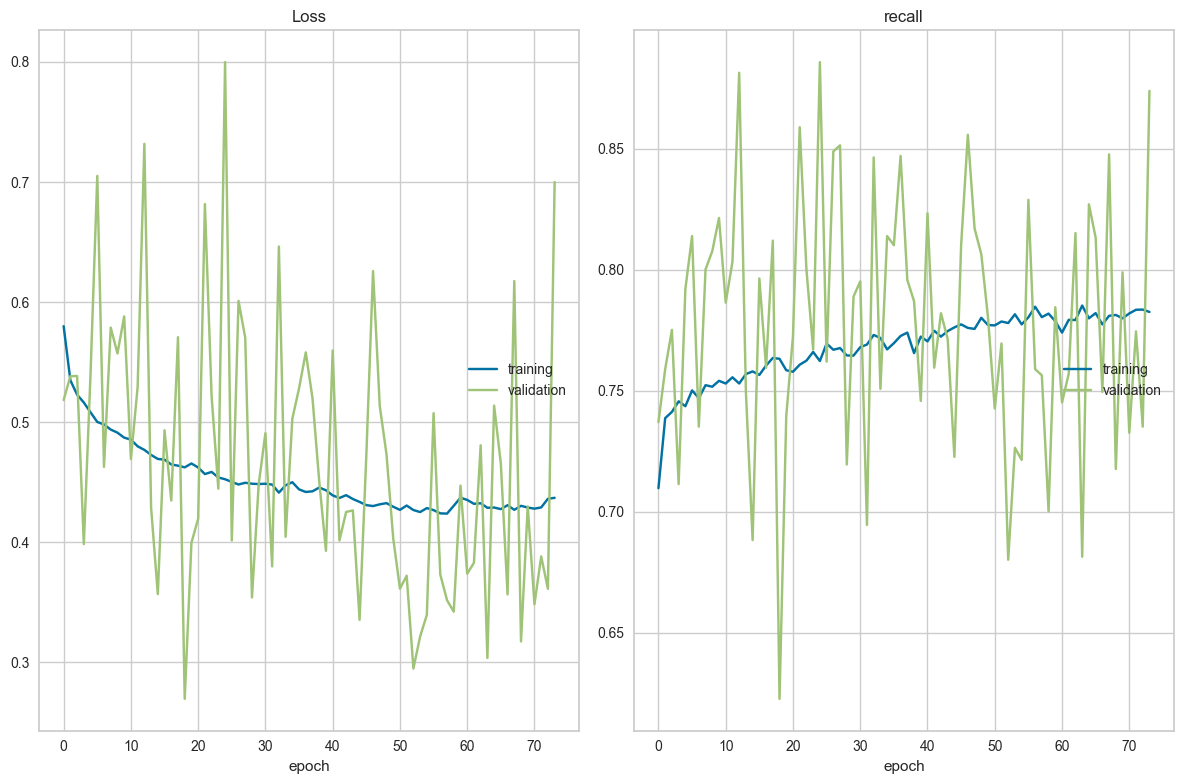

Loss
	training         	 (min:    0.424, max:    0.580, cur:    0.437)
	validation       	 (min:    0.270, max:    0.800, cur:    0.700)
recall
	training         	 (min:    0.710, max:    0.785, cur:    0.783)
	validation       	 (min:    0.623, max:    0.886, cur:    0.874)
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4309 - recall: 0.7797 - val_loss: 0.7000 - val_recall: 0.8738
Epoch 74: early stopping
Restoring model weights from the end of the best epoch: 64.


In [292]:
model2.fit(x=X_train, 
           y=y_train, 
           epochs=100, 
           batch_size=252, 
           validation_data=(X_val, y_val),
           callbacks=[early_stop, PlotLossesKerasTF()],
           class_weight = {0 : 0.5, 1 : 15},
           verbose=1)

In [293]:
# Evaluate the model on the test set
y_pred_proba = model2.predict(X_test)
y_pred = (y_pred_proba >= 0.5).astype(int)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

3614/3614 ━━━━━━━━━━━━━━━━━━━━ 3s 692us/step
[[101114  10500]
 [  1269   2734]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    111614
           1       0.21      0.68      0.32      4003

    accuracy                           0.90    115617
   macro avg       0.60      0.79      0.63    115617
weighted avg       0.96      0.90      0.92    115617



In [294]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)
DL_pre = precision_score(y_test, y_pred)

print(f"Average Precision Score (AP): {DL_AP:.4f}")
print(f"F1 Score: {DL_f1:.4f}")
print(f"Recall Score: {DL_rec:.4f}")
print(f"Precision Score: {DL_pre:.4f}")

Average Precision Score (AP): 0.4600
F1 Score: 0.3172
Recall Score: 0.6830
Precision Score: 0.2066


### Apply Model Evaluation Checks

In [295]:
from deepchecks.tabular import Dataset

train_ds = Dataset(X_train, label=y_train, cat_features=[])
test_ds = Dataset(X_test, label=y_test, cat_features=[])

In [296]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, model2)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

13007/13007 ━━━━━━━━━━━━━━━━━━━━ 9s 697us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 3s 716us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13007/13007 ━━━━━━━━━━━━━━━━━━━━ 9s 706us/step
13007/13007 ━━━━━━━━━━━━━━━━━━━━ 9s 689us/step
13007/13007 ━━━━━━━━━━━━━━━━━━━━ 9s 679us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 3s 687us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 2s 673us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 2s 679us/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 733us/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 699us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 3s 740us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step


deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 1304 seconds, but timeout was configured to 120 seconds


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13007/13007 ━━━━━━━━━━━━━━━━━━━━ 10s 769us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 3s 697us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_8I73KK888QIK2K2NV7I5D224J">Model Evaluation S…

In [297]:
evaluation_suite

Model Evaluation Suite: [
	0: TrainTestPerformance
		Conditions:
			0: Train-Test scores relative degradation is less than 0.1
	1: RocReport
		Conditions:
			0: AUC score for all the classes is greater than 0.7
	2: ConfusionMatrixReport
	3: PredictionDrift
		Conditions:
			0: Prediction drift score < 0.15
	4: SimpleModelComparison
		Conditions:
			0: Model performance gain over simple model is greater than 10%
	5: WeakSegmentsPerformance(n_to_show=5)
		Conditions:
			0: The relative performance of weakest segment is greater than 80% of average model performance.
	6: CalibrationScore
	7: RegressionErrorDistribution
		Conditions:
			0: Kurtosis value higher than -0.1
			1: Systematic error ratio lower than 0.01
	8: UnusedFeatures
		Conditions:
			0: Number of high variance unused features is less or equal to 5
	9: BoostingOverfit
		Conditions:
			0: Test score over iterations is less than 5% from the best score
	10: ModelInferenceTime
		Conditions:
			0: Average model inference time for 

In [298]:
evaluation_suite[0].clean_conditions()
evaluation_suite[0].add_condition_train_test_relative_degradation_less_than(0.3)
evaluation_suite = evaluation_suite.remove(7)

In [299]:
result = evaluation_suite.run(train_ds, test_ds, model2)
result.passed(fail_if_warning=False)

13007/13007 ━━━━━━━━━━━━━━━━━━━━ 9s 712us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 3s 734us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13007/13007 ━━━━━━━━━━━━━━━━━━━━ 10s 739us/step
13007/13007 ━━━━━━━━━━━━━━━━━━━━ 9s 715us/step
13007/13007 ━━━━━━━━━━━━━━━━━━━━ 9s 719us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 3s 729us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 3s 707us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 3s 702us/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 751us/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 725us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 3s 800us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step


deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 1408 seconds, but timeout was configured to 120 seconds


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


False

## DL with PCA

#### Preprocessing of Data

In [300]:
X = df.drop('fraud', axis=1)
y = df['fraud'].values

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.20,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [302]:
cat_col = X_train.select_dtypes(include=['object', 'bool']).columns

encoder = OneHotEncoder(categories="auto",
                        sparse=False,
                        #drop="first",
                        handle_unknown="ignore")

In [303]:
transformers = [('cat', encoder, cat_col)]

col_transformer = ColumnTransformer(transformers=transformers,
                                    remainder='passthrough')

In [304]:
X_train = col_transformer.fit_transform(X_train)
X_val = col_transformer.transform(X_val)
X_test = col_transformer.transform(X_test)

In [305]:
scaler = MinMaxScaler()

In [306]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [307]:
# Define PCA with n_components=35
pca = PCA(n_components=35)

# Fit PCA on the training data and transform it
X_train_pca = pca.fit_transform(X_train)

# Transform the validation and test data using the same PCA
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

***ii. Define Model***

In [308]:
# Initialize the neural network
model = Sequential()

# Add input layer and the first hidden layer (with 64 neurons and ReLU activation)
model.add(Dense(64, input_dim=X_train_pca.shape[1], activation='relu'))

# Add more hidden layers if necessary
model.add(Dense(32, activation='relu'))


# Add more hidden layers if necessary
model.add(Dense(16, activation='relu'))

# Add output layer (since it's binary classification, we use 1 output neuron with sigmoid activation)
model.add(Dense(1, activation='sigmoid'))


***iii. Compile Model***

In [309]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall'])


### early stopping


In [310]:
from tensorflow.keras.callbacks import EarlyStopping


In [311]:
early_stop = EarlyStopping(monitor="recall",
                           mode="max",
                           verbose=1,
                           patience=5,
                           restore_best_weights = True)

***iv. Fit Model***

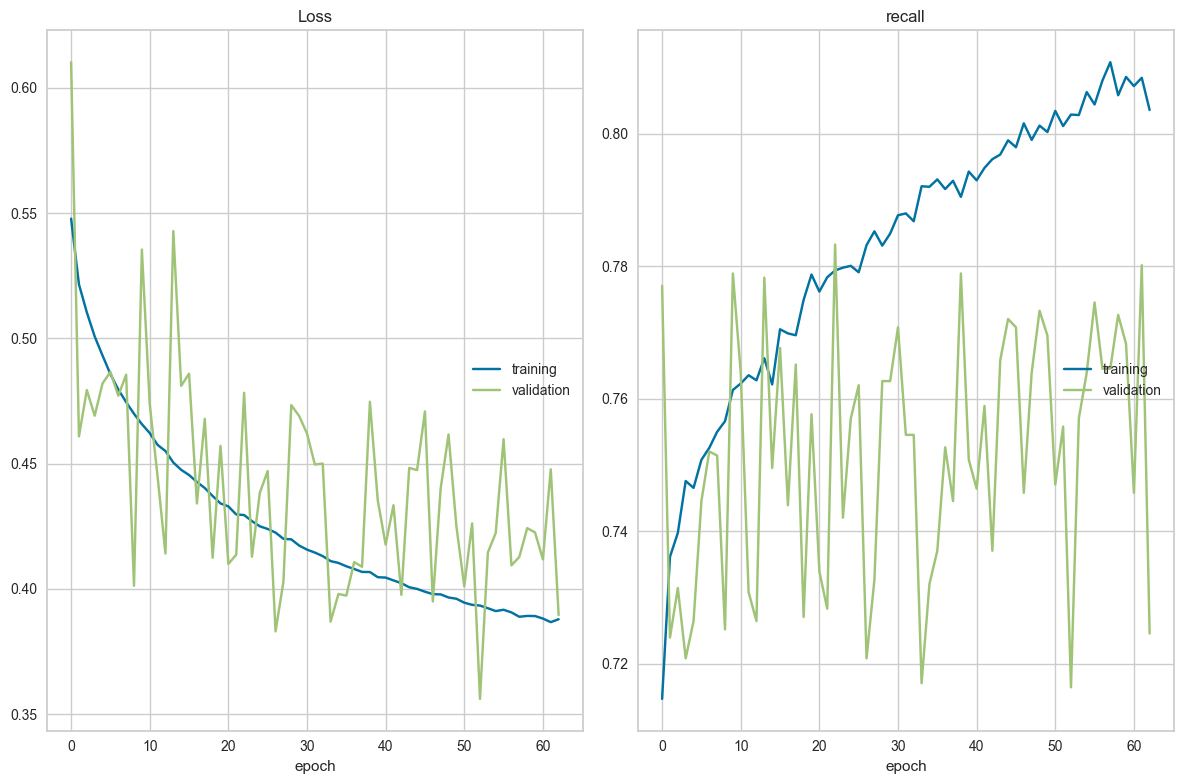

Loss
	training         	 (min:    0.387, max:    0.548, cur:    0.388)
	validation       	 (min:    0.356, max:    0.610, cur:    0.389)
recall
	training         	 (min:    0.715, max:    0.811, cur:    0.804)
	validation       	 (min:    0.716, max:    0.783, cur:    0.725)
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 4s 938us/step - loss: 0.3842 - recall: 0.8073 - val_loss: 0.3895 - val_recall: 0.7245
Epoch 63: early stopping
Restoring model weights from the end of the best epoch: 58.


In [312]:
model.fit(x=X_train_pca,
          y=y_train,
          validation_data=(X_val_pca, y_val),
          batch_size=100,
          epochs=100,
          verbose=1,
          callbacks=[early_stop, PlotLossesKerasTF()],
          class_weight={0 : 0.5, 1 : 15})

***v. Prediction and Model Evaluating***

In [313]:
# Predict on PCA-transformed test data
y_pred_prob = model.predict(X_test_pca)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


3614/3614 ━━━━━━━━━━━━━━━━━━━━ 2s 637us/step
[[92375 19239]
 [  937  3066]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90    111614
           1       0.14      0.77      0.23      4003

    accuracy                           0.83    115617
   macro avg       0.56      0.80      0.57    115617
weighted avg       0.96      0.83      0.88    115617



***vi. Plot Precision and Recall Curve***

3614/3614 ━━━━━━━━━━━━━━━━━━━━ 2s 608us/step


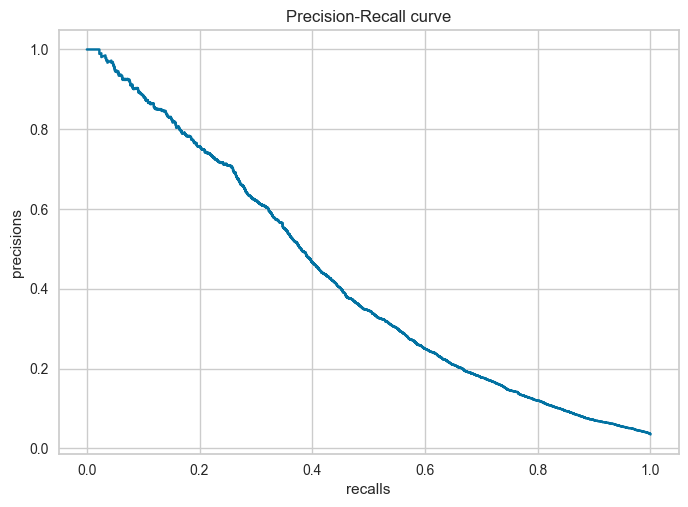

In [314]:
y_pred_proba = model.predict(X_test_pca)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [315]:
weighted_pre_score = average_precision_score(y_test, y_pred_proba)
weighted_pre_score

0.422719374635095

In [316]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.422719374635095

## optuna 

In [317]:
# Define the objective function for Optuna
def objective(trial):
    # Define the model
    model = Sequential()
    model.add(Dense(trial.suggest_int('units1', 32, 256), input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout1', 0.2, 0.5)))
    model.add(Dense(trial.suggest_int('units2', 16, 128), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout2', 0.2, 0.5)))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(name='recall')])

    # Early stopping callback
    early_stop = EarlyStopping(monitor='recall', mode='max', verbose=1, patience=5, restore_best_weights=True)

    # Train the model
    model.fit(x=X_train, y=y_train, epochs=100, batch_size=252, validation_data=(X_val, y_val),
              callbacks=[early_stop], verbose=1)

    # Evaluate the model on the validation set
    _, recall = model.evaluate(X_val, y_val)
    
    return recall

In [318]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2024-09-17 17:50:04,122] A new study created in memory with name: no-name-abcafd18-28d0-4261-80ca-e228761bdfd5


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3049 - recall: 0.1460 - val_loss: 0.1260 - val_recall: 0.0425
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1322 - recall: 0.0436 - val_loss: 0.1224 - val_recall: 0.0406
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1269 - recall: 0.0525 - val_loss: 0.1198 - val_recall: 0.0462
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1256 - recall: 0.0682 - val_loss: 0.1173 - val_recall: 0.0899
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1215 - recall: 0.0885 - val_loss: 0.1187 - val_recall: 0.0787
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1193 - recall: 0.1104 - val_loss: 0.1119 - val_recall: 0.1430
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1169 - recall: 0.1266 - val_loss: 0.1133 - val_recall: 0.1043
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1180 - recall: 0.1294 - val_loss: 0.1109 - val

[I 2024-09-17 17:54:40,762] Trial 0 finished with value: 0.2467208057641983 and parameters: {'units1': 145, 'dropout1': 0.4283048872012869, 'units2': 50, 'dropout2': 0.2772182362875887}. Best is trial 0 with value: 0.2467208057641983.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2877 - recall: 0.1598 - val_loss: 0.1244 - val_recall: 0.0381
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1294 - recall: 0.0530 - val_loss: 0.1197 - val_recall: 0.0593
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1237 - recall: 0.0843 - val_loss: 0.1202 - val_recall: 0.1455
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1194 - recall: 0.1222 - val_loss: 0.1139 - val_recall: 0.1174
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1157 - recall: 0.1465 - val_loss: 0.1115 - val_recall: 0.1193
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1143 - recall: 0.1586 - val_loss: 0.1076 - val_recall: 0.2036
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1121 - recall: 0.1812 - val_loss: 0.1292 - val_recall: 0.1999
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1108 - recall: 0.1779 - val_loss: 0.1325 - val

[I 2024-09-17 17:56:06,102] Trial 1 finished with value: 0.3885071873664856 and parameters: {'units1': 153, 'dropout1': 0.21658848685984763, 'units2': 91, 'dropout2': 0.3606557192895108}. Best is trial 1 with value: 0.3885071873664856.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3274 - recall: 0.1442 - val_loss: 0.1288 - val_recall: 0.0231
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1328 - recall: 0.0372 - val_loss: 0.1251 - val_recall: 0.0256
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1294 - recall: 0.0405 - val_loss: 0.1219 - val_recall: 0.0387
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1269 - recall: 0.0512 - val_loss: 0.1208 - val_recall: 0.0681
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1240 - recall: 0.0764 - val_loss: 0.1166 - val_recall: 0.0906
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1215 - recall: 0.0953 - val_loss: 0.1155 - val_recall: 0.1212
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1200 - recall: 0.1133 - val_loss: 0.1158 - val_recall: 0.1337
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1190 - recall: 0.1181 - val_loss: 0.1102 - val

[I 2024-09-17 17:57:28,312] Trial 2 finished with value: 0.2510930597782135 and parameters: {'units1': 42, 'dropout1': 0.3132257869364541, 'units2': 67, 'dropout2': 0.4466478981834807}. Best is trial 1 with value: 0.3885071873664856.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2864 - recall: 0.1586 - val_loss: 0.1226 - val_recall: 0.0418
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1287 - recall: 0.0658 - val_loss: 0.1184 - val_recall: 0.0587
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1228 - recall: 0.0896 - val_loss: 0.1212 - val_recall: 0.0800
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1206 - recall: 0.1044 - val_loss: 0.1171 - val_recall: 0.1355
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1191 - recall: 0.1156 - val_loss: 0.1140 - val_recall: 0.1693
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1166 - recall: 0.1382 - val_loss: 0.1131 - val_recall: 0.1786
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1163 - recall: 0.1486 - val_loss: 0.1100 - val_recall: 0.2092
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1163 - recall: 0.1301 - val_loss: 0.1163 - val

[I 2024-09-17 18:04:23,518] Trial 3 finished with value: 0.24422235786914825 and parameters: {'units1': 245, 'dropout1': 0.31552815409805446, 'units2': 123, 'dropout2': 0.3869477174174525}. Best is trial 1 with value: 0.3885071873664856.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3360 - recall: 0.1793 - val_loss: 0.1246 - val_recall: 0.0337
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1317 - recall: 0.0471 - val_loss: 0.1218 - val_recall: 0.1068
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1236 - recall: 0.0870 - val_loss: 0.1257 - val_recall: 0.1224
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1213 - recall: 0.1138 - val_loss: 0.1132 - val_recall: 0.1205
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1182 - recall: 0.1301 - val_loss: 0.1133 - val_recall: 0.1024
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1147 - recall: 0.1376 - val_loss: 0.1217 - val_recall: 0.2473
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1152 - recall: 0.1511 - val_loss: 0.1129 - val_recall: 0.1012
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1142 - recall: 0.1592 - val_loss: 0.1121 - val

[I 2024-09-17 18:06:37,929] Trial 4 finished with value: 0.4797001779079437 and parameters: {'units1': 232, 'dropout1': 0.21502684061844834, 'units2': 57, 'dropout2': 0.4914237070560151}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2680 - recall: 0.1465 - val_loss: 0.1225 - val_recall: 0.0431
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1279 - recall: 0.0648 - val_loss: 0.1185 - val_recall: 0.1112
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1202 - recall: 0.1093 - val_loss: 0.1144 - val_recall: 0.1249
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1169 - recall: 0.1327 - val_loss: 0.1113 - val_recall: 0.1274
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1142 - recall: 0.1537 - val_loss: 0.1111 - val_recall: 0.1980
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1119 - recall: 0.1596 - val_loss: 0.1230 - val_recall: 0.1305
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1125 - recall: 0.1710 - val_loss: 0.1086 - val_recall: 0.1493
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1092 - recall: 0.1828 - val_loss: 0.1118 - val

[I 2024-09-17 18:08:14,398] Trial 5 finished with value: 0.32479700446128845 and parameters: {'units1': 149, 'dropout1': 0.2931064398644915, 'units2': 94, 'dropout2': 0.20988767935760966}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2946 - recall: 0.1322 - val_loss: 0.1272 - val_recall: 0.0300
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1334 - recall: 0.0397 - val_loss: 0.1237 - val_recall: 0.0356
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1299 - recall: 0.0477 - val_loss: 0.1208 - val_recall: 0.0425
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1253 - recall: 0.0661 - val_loss: 0.1205 - val_recall: 0.1230
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1221 - recall: 0.0938 - val_loss: 0.1178 - val_recall: 0.0862
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1210 - recall: 0.1041 - val_loss: 0.1172 - val_recall: 0.1636
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1198 - recall: 0.1122 - val_loss: 0.1121 - val_recall: 0.1249
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1172 - recall: 0.1241 - val_loss: 0.1125 - val

[I 2024-09-17 18:09:39,999] Trial 6 finished with value: 0.1567770093679428 and parameters: {'units1': 73, 'dropout1': 0.46291510713517686, 'units2': 106, 'dropout2': 0.3901467543194954}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2873 - recall: 0.1480 - val_loss: 0.1235 - val_recall: 0.0462
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1285 - recall: 0.0583 - val_loss: 0.1202 - val_recall: 0.0512
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1230 - recall: 0.0758 - val_loss: 0.1172 - val_recall: 0.0874
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1205 - recall: 0.1128 - val_loss: 0.1143 - val_recall: 0.1212
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1188 - recall: 0.1288 - val_loss: 0.1160 - val_recall: 0.1074
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1160 - recall: 0.1451 - val_loss: 0.1128 - val_recall: 0.1262
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1156 - recall: 0.1394 - val_loss: 0.1124 - val_recall: 0.1374
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1111 - recall: 0.1735 - val_loss: 0.1145 - val

[I 2024-09-17 18:12:03,929] Trial 7 finished with value: 0.3360399603843689 and parameters: {'units1': 199, 'dropout1': 0.2876404722919959, 'units2': 92, 'dropout2': 0.35510008926417785}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3348 - recall: 0.1615 - val_loss: 0.1258 - val_recall: 0.0350
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1339 - recall: 0.0432 - val_loss: 0.1230 - val_recall: 0.0443
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1296 - recall: 0.0512 - val_loss: 0.1204 - val_recall: 0.0687
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1259 - recall: 0.0729 - val_loss: 0.1172 - val_recall: 0.0762
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1228 - recall: 0.0855 - val_loss: 0.1150 - val_recall: 0.0924
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1211 - recall: 0.1073 - val_loss: 0.1243 - val_recall: 0.0918
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1206 - recall: 0.1097 - val_loss: 0.1138 - val_recall: 0.0856
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1192 - recall: 0.1132 - val_loss: 0.1231 - val

[I 2024-09-17 18:14:38,984] Trial 8 finished with value: 0.20237351953983307 and parameters: {'units1': 180, 'dropout1': 0.47537066014504176, 'units2': 25, 'dropout2': 0.28871873328501807}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2995 - recall: 0.1400 - val_loss: 0.1248 - val_recall: 0.0337
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1310 - recall: 0.0415 - val_loss: 0.1223 - val_recall: 0.0450
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1258 - recall: 0.0714 - val_loss: 0.1183 - val_recall: 0.0781
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1215 - recall: 0.0882 - val_loss: 0.1147 - val_recall: 0.1118
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1195 - recall: 0.1139 - val_loss: 0.1167 - val_recall: 0.1362
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1188 - recall: 0.1285 - val_loss: 0.1126 - val_recall: 0.1224
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1159 - recall: 0.1362 - val_loss: 0.1110 - val_recall: 0.1193
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1151 - recall: 0.1430 - val_loss: 0.1190 - val

[I 2024-09-17 18:18:14,223] Trial 9 finished with value: 0.21424110233783722 and parameters: {'units1': 253, 'dropout1': 0.481789746129643, 'units2': 121, 'dropout2': 0.46217086416597164}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3714 - recall: 0.1872 - val_loss: 0.1269 - val_recall: 0.0319
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1355 - recall: 0.0403 - val_loss: 0.1226 - val_recall: 0.0468
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1280 - recall: 0.0617 - val_loss: 0.1224 - val_recall: 0.0344
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1238 - recall: 0.0790 - val_loss: 0.1222 - val_recall: 0.0662
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1208 - recall: 0.1080 - val_loss: 0.1139 - val_recall: 0.1193
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1199 - recall: 0.1119 - val_loss: 0.1170 - val_recall: 0.1162
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1165 - recall: 0.1303 - val_loss: 0.1163 - val_recall: 0.1562
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1163 - recall: 0.1449 - val_loss: 0.1124 - val

[I 2024-09-17 18:20:43,681] Trial 10 finished with value: 0.2885696291923523 and parameters: {'units1': 99, 'dropout1': 0.21705572471944226, 'units2': 36, 'dropout2': 0.49907661367913153}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2840 - recall: 0.1495 - val_loss: 0.1232 - val_recall: 0.0456
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1285 - recall: 0.0725 - val_loss: 0.1204 - val_recall: 0.0556
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1214 - recall: 0.1015 - val_loss: 0.1168 - val_recall: 0.0931
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1174 - recall: 0.1316 - val_loss: 0.1120 - val_recall: 0.1181
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1152 - recall: 0.1502 - val_loss: 0.1184 - val_recall: 0.2136
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1126 - recall: 0.1654 - val_loss: 0.1159 - val_recall: 0.1961
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1105 - recall: 0.1698 - val_loss: 0.1612 - val_recall: 0.3448
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1122 - recall: 0.1742 - val_loss: 0.1078 - val

[I 2024-09-17 18:25:06,892] Trial 11 finished with value: 0.2567145526409149 and parameters: {'units1': 192, 'dropout1': 0.20278257921002976, 'units2': 73, 'dropout2': 0.29499376387407644}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.3112 - recall: 0.1761 - val_loss: 0.1230 - val_recall: 0.0394
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1290 - recall: 0.0562 - val_loss: 0.1207 - val_recall: 0.0525
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1235 - recall: 0.0809 - val_loss: 0.1149 - val_recall: 0.0874
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1196 - recall: 0.1131 - val_loss: 0.1172 - val_recall: 0.1880
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1167 - recall: 0.1432 - val_loss: 0.1161 - val_recall: 0.0981
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1169 - recall: 0.1553 - val_loss: 0.1198 - val_recall: 0.1861
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1145 - recall: 0.1642 - val_loss: 0.1183 - val_recall: 0.1405
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1114 - recall: 0.1778 - val_loss: 0.1185 - val

[I 2024-09-17 18:29:38,450] Trial 12 finished with value: 0.28669580817222595 and parameters: {'units1': 221, 'dropout1': 0.2407565785278029, 'units2': 70, 'dropout2': 0.4365268329107406}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2933 - recall: 0.1268 - val_loss: 0.1249 - val_recall: 0.0319
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1331 - recall: 0.0404 - val_loss: 0.1215 - val_recall: 0.0394
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1253 - recall: 0.0534 - val_loss: 0.1194 - val_recall: 0.0606
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1231 - recall: 0.0793 - val_loss: 0.1166 - val_recall: 0.0899
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1203 - recall: 0.1021 - val_loss: 0.1134 - val_recall: 0.1249
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1171 - recall: 0.1184 - val_loss: 0.1192 - val_recall: 0.1049
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1163 - recall: 0.1291 - val_loss: 0.1118 - val_recall: 0.1312
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1155 - recall: 0.1399 - val_loss: 0.1097 - val

[I 2024-09-17 18:31:44,870] Trial 13 finished with value: 0.1805121749639511 and parameters: {'units1': 111, 'dropout1': 0.3904052112510041, 'units2': 51, 'dropout2': 0.21091825003650033}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2923 - recall: 0.1436 - val_loss: 0.1230 - val_recall: 0.0400
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1299 - recall: 0.0491 - val_loss: 0.1194 - val_recall: 0.0631
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1222 - recall: 0.0854 - val_loss: 0.1168 - val_recall: 0.0818
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1189 - recall: 0.1212 - val_loss: 0.1166 - val_recall: 0.0993
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1178 - recall: 0.1373 - val_loss: 0.1152 - val_recall: 0.1618
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1154 - recall: 0.1479 - val_loss: 0.1111 - val_recall: 0.1899
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1128 - recall: 0.1690 - val_loss: 0.1112 - val_recall: 0.2049
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1120 - recall: 0.1714 - val_loss: 0.1184 - val

[I 2024-09-17 18:34:44,073] Trial 14 finished with value: 0.32417237758636475 and parameters: {'units1': 164, 'dropout1': 0.2547784388465164, 'units2': 84, 'dropout2': 0.3418970328290295}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3589 - recall: 0.1752 - val_loss: 0.1270 - val_recall: 0.0206
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1356 - recall: 0.0395 - val_loss: 0.1231 - val_recall: 0.0337
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1291 - recall: 0.0531 - val_loss: 0.1198 - val_recall: 0.0824
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1245 - recall: 0.0804 - val_loss: 0.1174 - val_recall: 0.0906
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1213 - recall: 0.0951 - val_loss: 0.1148 - val_recall: 0.1187
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1196 - recall: 0.1196 - val_loss: 0.1189 - val_recall: 0.0862
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1174 - recall: 0.1282 - val_loss: 0.1116 - val_recall: 0.1512
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1173 - recall: 0.1418 - val_loss: 0.1104 - val

[I 2024-09-17 18:36:14,620] Trial 15 finished with value: 0.20612117648124695 and parameters: {'units1': 110, 'dropout1': 0.36308751337792483, 'units2': 49, 'dropout2': 0.49025963459304367}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2908 - recall: 0.1503 - val_loss: 0.1230 - val_recall: 0.0525
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1284 - recall: 0.0702 - val_loss: 0.1224 - val_recall: 0.0575
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1221 - recall: 0.0940 - val_loss: 0.1188 - val_recall: 0.0924
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1176 - recall: 0.1275 - val_loss: 0.1216 - val_recall: 0.0912
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1154 - recall: 0.1416 - val_loss: 0.1108 - val_recall: 0.1674
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1145 - recall: 0.1440 - val_loss: 0.1102 - val_recall: 0.1674
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1124 - recall: 0.1664 - val_loss: 0.1075 - val_recall: 0.2124
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1132 - recall: 0.1699 - val_loss: 0.1129 - val

[I 2024-09-17 18:37:57,097] Trial 16 finished with value: 0.2798251211643219 and parameters: {'units1': 214, 'dropout1': 0.25339739701425273, 'units2': 104, 'dropout2': 0.3970464926106895}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2976 - recall: 0.1680 - val_loss: 0.1238 - val_recall: 0.0331
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1299 - recall: 0.0622 - val_loss: 0.1186 - val_recall: 0.0718
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1207 - recall: 0.0928 - val_loss: 0.1151 - val_recall: 0.0956
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1179 - recall: 0.1236 - val_loss: 0.1159 - val_recall: 0.1668
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1175 - recall: 0.1345 - val_loss: 0.1105 - val_recall: 0.1393
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1133 - recall: 0.1547 - val_loss: 0.1216 - val_recall: 0.1768
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1134 - recall: 0.1646 - val_loss: 0.1079 - val_recall: 0.1818
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1138 - recall: 0.1708 - val_loss: 0.1142 - val

[I 2024-09-17 18:39:31,745] Trial 17 finished with value: 0.3129294216632843 and parameters: {'units1': 231, 'dropout1': 0.228918419786698, 'units2': 61, 'dropout2': 0.325126967791458}. Best is trial 4 with value: 0.4797001779079437.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2755 - recall: 0.1475 - val_loss: 0.1229 - val_recall: 0.0562
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1281 - recall: 0.0638 - val_loss: 0.1206 - val_recall: 0.0631
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1213 - recall: 0.1045 - val_loss: 0.1178 - val_recall: 0.0818
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1185 - recall: 0.1163 - val_loss: 0.1160 - val_recall: 0.0937
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1159 - recall: 0.1287 - val_loss: 0.1117 - val_recall: 0.1799
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1135 - recall: 0.1476 - val_loss: 0.1266 - val_recall: 0.2867
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1125 - recall: 0.1651 - val_loss: 0.1245 - val_recall: 0.1199
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1114 - recall: 0.1795 - val_loss: 0.1144 - val

[I 2024-09-17 19:42:33,789] Trial 18 finished with value: 0.4821986258029938 and parameters: {'units1': 174, 'dropout1': 0.26863407359169755, 'units2': 82, 'dropout2': 0.25503339418713405}. Best is trial 18 with value: 0.4821986258029938.


Epoch 1/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3074 - recall: 0.1658 - val_loss: 0.1264 - val_recall: 0.0362
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1273 - recall: 0.0657 - val_loss: 0.1202 - val_recall: 0.0650
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1223 - recall: 0.0948 - val_loss: 0.1139 - val_recall: 0.1187
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1186 - recall: 0.1195 - val_loss: 0.1145 - val_recall: 0.1524
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1164 - recall: 0.1343 - val_loss: 0.1093 - val_recall: 0.1368
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1148 - recall: 0.1500 - val_loss: 0.1114 - val_recall: 0.1430
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1125 - recall: 0.1638 - val_loss: 0.1066 - val_recall: 0.1861
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1113 - recall: 0.1725 - val_loss: 0.1081 - val

[I 2024-09-17 19:44:09,765] Trial 19 finished with value: 0.1805121749639511 and parameters: {'units1': 184, 'dropout1': 0.2790885107985143, 'units2': 35, 'dropout2': 0.250764674980387}. Best is trial 18 with value: 0.4821986258029938.


In [319]:
# Get the best hyperparameters
best_params = study.best_params
best_units1 = best_params['units1']
best_dropout1 = best_params['dropout1']
best_units2 = best_params['units2']
best_dropout2 = best_params['dropout2']
print(best_params)

{'units1': 174, 'dropout1': 0.26863407359169755, 'units2': 82, 'dropout2': 0.25503339418713405}


In [321]:
model3 = Sequential()

model3.add(Dense(best_units1, input_dim=X_train_pca.shape[1], activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(best_dropout1))

model3.add(Dense(best_units2, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(best_dropout2))

model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(name='recall')])

In [322]:
early_stop = EarlyStopping(monitor = "recall",
                           mode = "max", 
                           verbose = 1, 
                           patience = 5,
                           restore_best_weights=True)

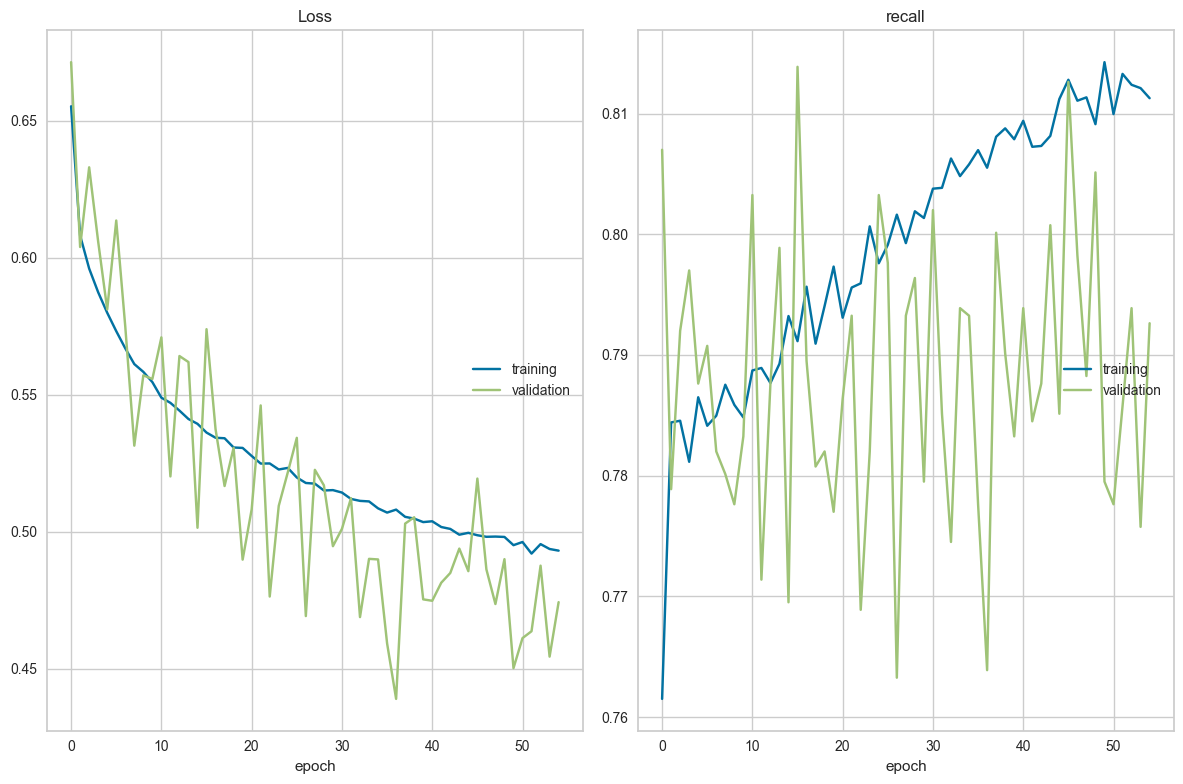

Loss
	training         	 (min:    0.492, max:    0.655, cur:    0.493)
	validation       	 (min:    0.439, max:    0.671, cur:    0.474)
recall
	training         	 (min:    0.762, max:    0.814, cur:    0.811)
	validation       	 (min:    0.763, max:    0.814, cur:    0.793)
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4895 - recall: 0.8176 - val_loss: 0.4743 - val_recall: 0.7926
Epoch 55: early stopping
Restoring model weights from the end of the best epoch: 50.


In [323]:
model3.fit(x=X_train_pca, 
           y=y_train, 
           epochs=100, 
           batch_size=252, 
           validation_data=(X_val_pca, y_val),
           callbacks=[early_stop, PlotLossesKerasTF()],
           class_weight = {0 : 0.5, 1 : 19},
           verbose=1)

In [324]:
# Predict on PCA-transformed test data
y_pred_prob = model3.predict(X_test_pca)
y_pred = (y_pred_prob >= 0.5).astype("int32")

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

3614/3614 ━━━━━━━━━━━━━━━━━━━━ 2s 665us/step
[[91079 20535]
 [  873  3130]]
              precision    recall  f1-score   support

           0       0.99      0.82      0.89    111614
           1       0.13      0.78      0.23      4003

    accuracy                           0.81    115617
   macro avg       0.56      0.80      0.56    115617
weighted avg       0.96      0.81      0.87    115617



3614/3614 ━━━━━━━━━━━━━━━━━━━━ 2s 651us/step


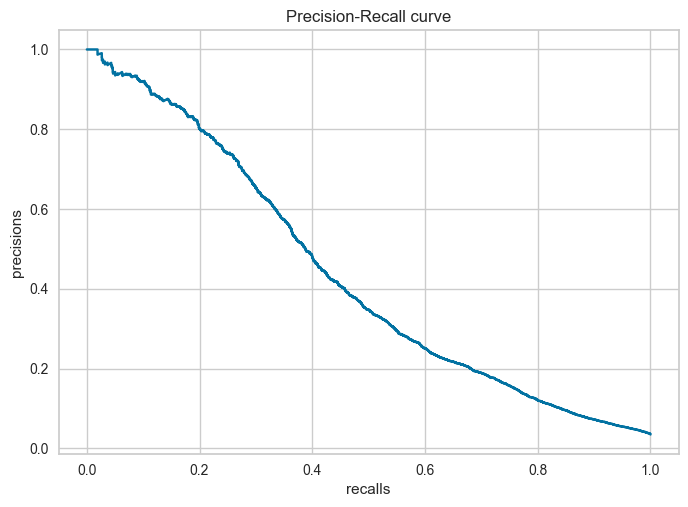

In [325]:
y_pred_proba = model3.predict(X_test_pca)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [326]:
DL_pca_AP = average_precision_score(y_test, y_pred_proba)
DL_pca_f1 = f1_score(y_test, y_pred)
DL_pca_rec = recall_score(y_test, y_pred)
DL_pca_pre = precision_score(y_test, y_pred)

print(f"Average Precision Score (AP): {DL_pca_AP:.4f}")
print(f"F1 Score: {DL_pca_f1:.4f}")
print(f"Recall Score: {DL_pca_rec:.4f}")
print(f"Precision Score: {DL_pca_pre:.4f}")

Average Precision Score (AP): 0.4355
F1 Score: 0.2263
Recall Score: 0.7819
Precision Score: 0.1323


***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [327]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X_train_pca, label=y_train, cat_features=[])
test_ds = Dataset(X_test_pca, label=y_test, cat_features=[])

In [328]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, model3)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

13007/13007 ━━━━━━━━━━━━━━━━━━━━ 9s 657us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 2s 674us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13007/13007 ━━━━━━━━━━━━━━━━━━━━ 9s 660us/step
13007/13007 ━━━━━━━━━━━━━━━━━━━━ 9s 671us/step
13007/13007 ━━━━━━━━━━━━━━━━━━━━ 9s 685us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 2s 679us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 2s 682us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 2s 664us/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 672us/step
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 673us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 2s 670us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step


deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 367 seconds, but timeout was configured to 120 seconds


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13007/13007 ━━━━━━━━━━━━━━━━━━━━ 8s 651us/step
3614/3614 ━━━━━━━━━━━━━━━━━━━━ 2s 646us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_RGFX8RYBCNHBB5RN1VRI2NC6X">Model Evaluation S…

## Model Comparison

In [365]:
compare = pd.DataFrame({
    "Model": ["LG", "LG_CW", "RF_CW", "RF_Threshold", "XGB_CW", "XGB_PCA", "XGB_Grid", "DL", "DL_PCA"],
    "f1_score": [log_f1, log_reg_cw_f1, rf_cw_f1, rf_th_f1, xgb_cw_f1, xgb_pca_f1, xgb_grid_f1, DL_f1, DL_pca_f1],
    "precision": [log_pre, log_reg_cw_pre, rf_cw_pre, rf_th_pre, xgb_cw_pre, xgb_pca_pre, xgb_grid_pre, DL_pre, DL_pca_pre],
    "recall": [log_rec, log_reg_cw_rec, rf_cw_rec, rf_th_rec, xgb_cw_rec, xgb_pca_rec, xgb_grid_rec, DL_rec, DL_pca_rec],
    "average_precision_score": [log_AP, log_reg_cw_AP, rf_cw_AP, rf_th_AP, xgb_cw_AP, xgb_pca_AP, xgb_grid_AP, DL_AP, DL_pca_AP]
})

compare

Model  f1_score  precision  recall  average_precision_score
0            LG     0.176      0.101   0.710                    0.213
1         LG_CW     0.176      0.101   0.711                    0.213
2         RF_CW     0.556      0.884   0.405                    0.656
3  RF_Threshold     0.636      0.675   0.602                    0.420
4        XGB_CW     0.614      0.898   0.466                    0.686
5       XGB_PCA     0.435      0.839   0.294                    0.538
6      XGB_Grid     0.435      0.839   0.294                    0.538
7            DL     0.317      0.207   0.683                    0.460
8        DL_PCA     0.226      0.132   0.782                    0.435

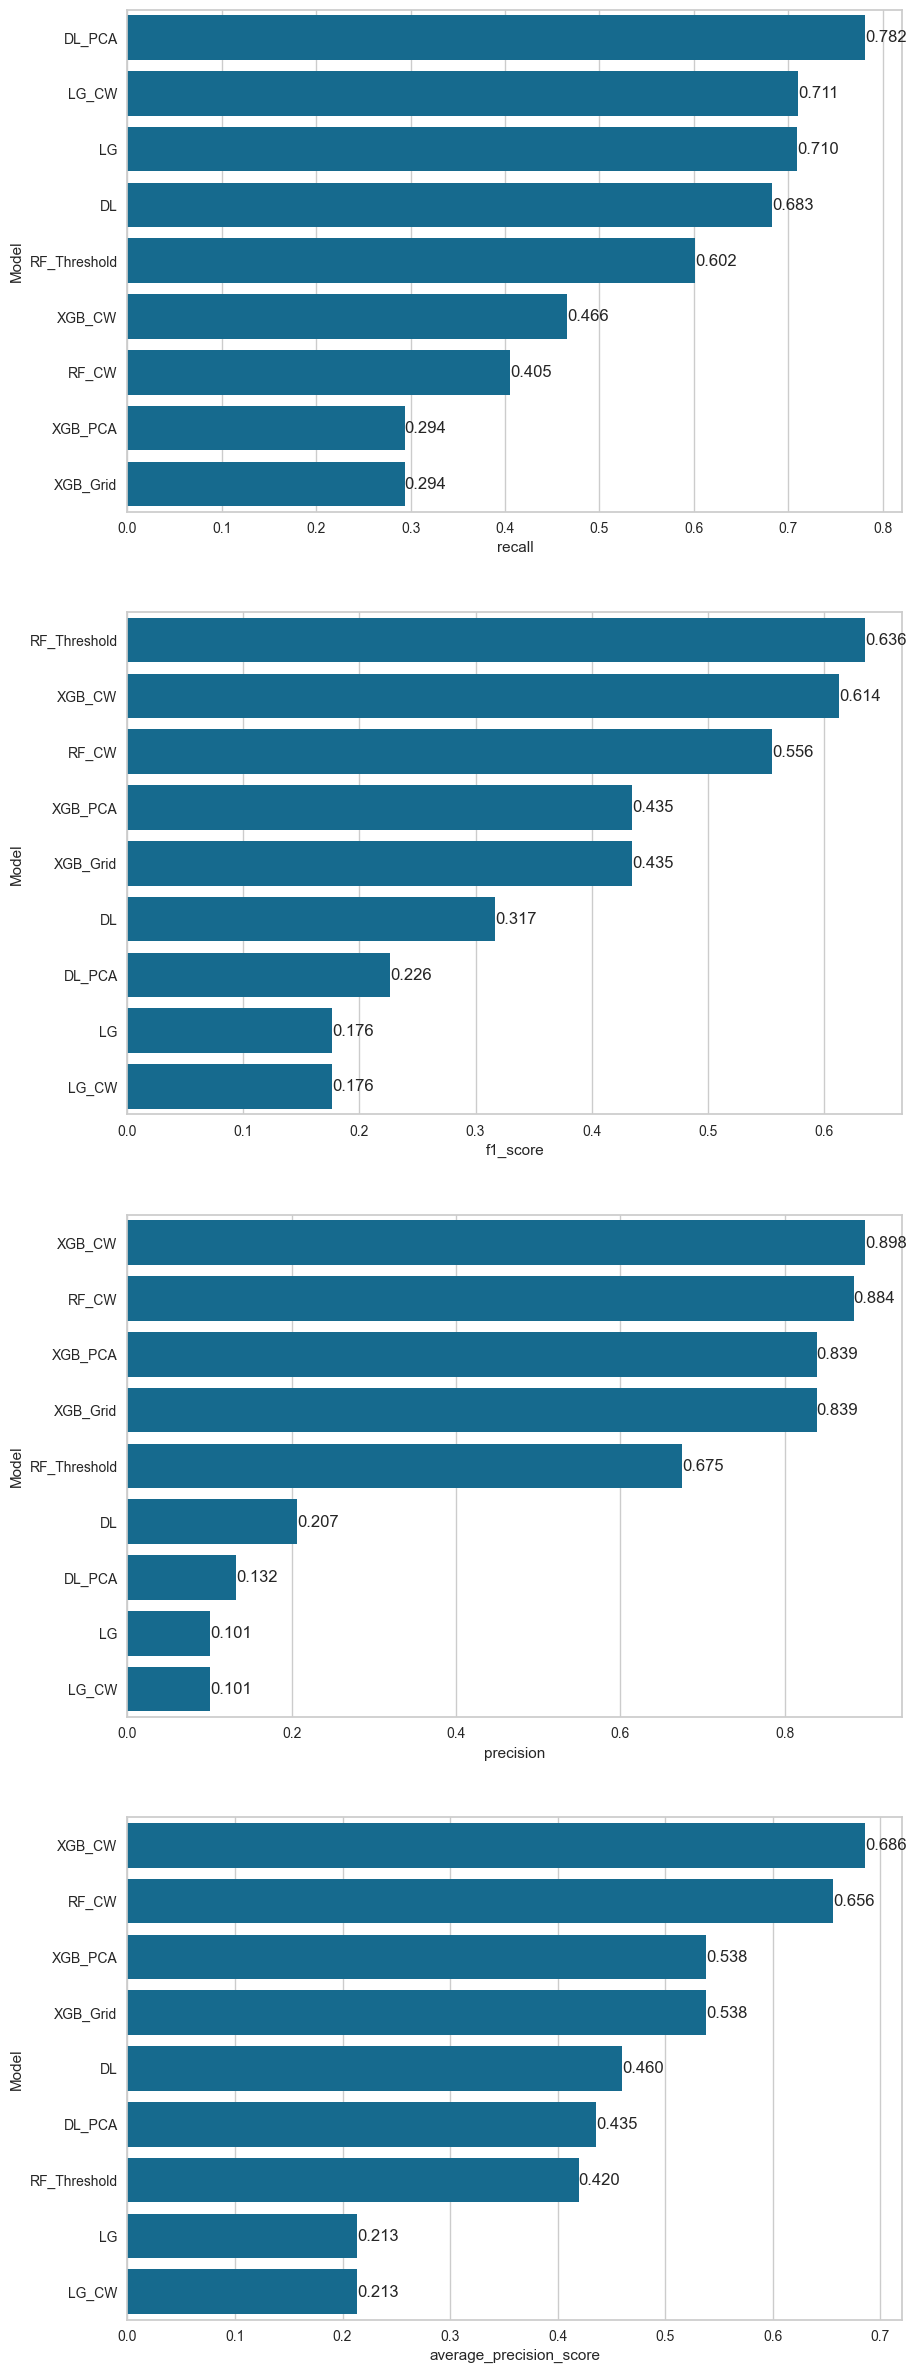

In [366]:
plt.figure(figsize=(10,30))
plt.subplot(411)
compare = compare.sort_values(by="recall",
                              ascending=False)
ax=sns.barplot(x="recall",
               y="Model",
               data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(412)
compare = compare.sort_values(by="f1_score",
                              ascending=False)
ax=sns.barplot(x="f1_score",
               y="Model",
               data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(413)
compare = compare.sort_values(by="precision",
                              ascending=False)
ax=sns.barplot(x="precision",
               y="Model",
               data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(414)
compare = compare.sort_values(by="average_precision_score",
                              ascending=False)
ax=sns.barplot(x="average_precision_score",
               y="Model",
               data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

***RF_Threshold (Random Forest with a custom threshold) strikes a balance between precision and recall. It has a relatively high f1-score (0.636), precision (0.675), and recall (0.602), indicating a good balance of detecting fraud while minimizing false positives.***

## 5. Model Deployement
- Finalize your model with whole dataset and prepare for the deployment.

### Save and Export the Best Model


In [364]:
from sklearn.feature_selection import SelectFromModel

column_trans = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
        ('scaler', MinMaxScaler(), numeric_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Feature selection için RandomForest'ı kullanarak SelectFromModel ekleyelim
rf_final_fs = Pipeline(steps=[
    ('preprocessor', column_trans),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100), threshold="mean")),  # Ortalama önemlilikten düşük özellikleri çıkar
    ('classifier', RandomForestClassifier())
])

# Modeli eğit
rf_final_fs.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['product_cd', 'card_6',
                                                   'card_4']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['transaction_amt', 'card_1',
                                                   'card_2', 'card_3', 'card_5',
                                                   'c_1', 'c_2', 'c_3', 'c_4',
                                                   'c_5', 'c_6', 'c_7', 'c_8',
                                                   'c_9', 'c_10', 'c_11',
                                                   'c_12', 'c_13', 'c_14',
                                                   'd_1', 'v_95', 'v_96',
                                                   'v_97', 'v_98', 'v_99',
                                                   'v_100', 'v_101', 'v_102',
                                                   'v_103', 'v_104', ...])],
                                   verbose_feature_names_out=False)),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 threshold='mean')),
                ('classifier', RandomForestClassifier())])

In [367]:
import joblib

# Modeli kaydet
joblib.dump(rf_final_fs, 'rf_final_model2.pkl')

['rf_final_model2.pkl']

In [368]:
rf_final_loaded = joblib.load('rf_final_model2.pkl')

# X veri setinden 10 satırlık bir örnek al
X_sample = X.sample(10, random_state=42)

# Bu satırlara ait gerçek etiketleri al
y_actual_sample = y.loc[X_sample.index]

# Yüklenen model ile tahmin yap
y_pred_sample = rf_final_loaded.predict(X_sample)

# Tahmin edilen sonuçları ve gerçek sonuçları karşılaştırmak için bir DataFrame oluştur
comparison_df = pd.DataFrame({
    'Actual': y_actual_sample,
    'Predicted': y_pred_sample
})

# Sonuçları ekrana yazdır
print(comparison_df)

        Actual  Predicted
53439        0          0
441399       0          0
361091       0          0
437574       0          0
279887       0          0
392847       0          0
84093        0          0
242342       0          0
462610       0          0
219209       0          0


### selected_five_features

In [369]:
df_new = df[['product_cd', 'card_4', 'card_6', 'transaction_amt', 'time', 'fraud']]

In [370]:
df_new

product_cd      card_4  card_6  transaction_amt    time  fraud
1               W  mastercard  credit           29.000   1.000      0
2               W        visa   debit           59.000   1.000      0
3               W  mastercard   debit           50.000   1.000      0
4               H  mastercard  credit           50.000   1.000      0
5               W        visa   debit           49.000   1.000      0
...           ...         ...     ...              ...     ...    ...
590534          C  mastercard   debit           67.505 183.000      0
590536          W  mastercard   debit           39.500 183.000      0
590537          W  mastercard   debit           30.950 183.000      0
590538          W  mastercard   debit          117.000 183.000      0
590539          W  mastercard  credit          279.950 183.000      0

[578081 rows x 6 columns]

In [371]:
X = df_new.drop(columns='fraud')
y = df_new['fraud']

In [372]:
numeric_features = X.select_dtypes(include=['float64', 'float32', 'int32']).columns.tolist()
cat_onehot = ['product_cd', 'card_6', 'card_4']

# Define your preprocessing steps
numeric_transformer = MinMaxScaler()  # for numeric columns
onehot_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # for categorical columns

# ColumnTransformer with preprocessing
column_trans = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, cat_onehot),  # Categorical columns
        ('num', numeric_transformer, numeric_features)  # Numeric columns
    ],
    remainder='passthrough',  # Keep other columns as they are
    verbose_feature_names_out=False  # Simplify feature names
).set_output(transform="pandas")

total_samples = 558065 + 20016

# Calculate weight for each class
weight_class_0 = total_samples / (2 * 558065)  # Weight for majority class
weight_class_1 = total_samples / (2 * 20016)   # Weight for minority class

# Create weight dictionary
class_weights = {0: weight_class_0, 1: weight_class_1}

# Create the pipeline with class_weight
rf_final = Pipeline(steps=[
    ('preprocessor', column_trans),
    ('classifier', RandomForestClassifier(random_state=42, class_weight=class_weights, n_jobs=-1))
])

rf_final.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['product_cd', 'card_6',
                                                   'card_4']),
                                                 ('num', MinMaxScaler(),
                                                  ['transaction_amt', 'time'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 0.517933394855438,
                                                      1: 14.440472621902478},
                                        n_jobs=-1, random_state=42))])

In [374]:
# Tahmin edilen sınıflar (y_pred)
y_pred = rf_final.predict(X)

In [375]:
# Sınıf olasılıkları (y_pred_proba)
y_pred_proba = rf_final.predict_proba(X)

# Sonuçları görmek için
print("Tahminler (y_pred):", y_pred)
print("Sınıf Olasılıkları (y_pred_proba):", y_pred_proba)

Tahminler (y_pred): [0 0 0 ... 0 0 0]
Sınıf Olasılıkları (y_pred_proba): [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [377]:
import joblib

# Eğitilen modeli kaydedin
joblib.dump(rf_final, 'rf_final_model_selected.pkl')

['rf_final_model_selected.pkl']

In [378]:
rf_final_loaded = joblib.load('rf_final_model_selected.pkl')

# Calculate probabilities for the whole dataset
y_pred_proba = rf_final_loaded.predict_proba(X)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, y_pred_proba)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1 score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f"Best threshold: {best_threshold}")

# Make predictions with the best threshold
y_pred_best_threshold = (y_pred_proba >= best_threshold).astype(int)

# Create a DataFrame with predictions and the best threshold
results_df = pd.DataFrame({
    'y_pred_proba': y_pred_proba,
    'y_pred_best_threshold': y_pred_best_threshold
})

# Save the results to a CSV file
results_df.to_csv('model_predictions.csv', index=False)

Best threshold: 0.47


In [379]:
# Yeni veri kümesinde tahmin yapma
input_data = pd.DataFrame({
    'product_cd': ['W'],
    'card_4': ['visa'],
    'card_6': ['debit'],
    'transaction_amt': [500.0],
    'time': [100]
})

# Yüklenen model ile tahmin yapın
rf_final_loaded = joblib.load('rf_final_model_selected.pkl')
y_pred_best_threshold = rf_final_loaded.predict(input_data)

print(f"Tahmin edilen sınıf: {y_pred_best_threshold}")

Tahmin edilen sınıf: [0]


### Save and Export Variables

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___